## Hotel Reservations Analysis

#### Table of Contents

1. [Introduction](#1.-Introduction)
    - Background

    - Problem Statement

    - Objectives

    - Research Questions

    - Hypothesis

2. [Datasets](#2.-Datasets)
    
3. [Methodology](#3.-Methodology)

    - Data Collection

    - Data Preprocessing

    - Exploratory Data Analysis (EDA)

    - Feature Engineering

    - Model Selection

    - Model Evaluation

    - Hyperparameter Tuning

4. [Implementation](#4.-Implementation)

    a. [Import Necessary Libraries](#a.-Import-Necessary-Libraries)

    b. [Load the Datasets](#b.-Load-the-Datasets)
    
    c. [Inspect the Data](#c.-Inspect-the-Data)

   - [Key Findings from Data Inspection](#Key-Findings-from-Data-Inspection)

    d. [Data Preprocessing](#d.-Data-Pre-processing)

    e. [Exploratory Data Analysis (EDA)](#e.-Exploratory-Data-Analysis-(EDA))

    - [Frequency Distribution of Relevant Features](#Frequency-Distribution-of-Relevant-Features)

    - [Feature Correlation](#Feature-Correlation)

    - [Repeat Guests Behavior](#Repeat-Guests-Behavior)

    - [Cancellation Behavior](#Cancellation-Behavior)

    - [Customer Segments](#Customer-Segments)
    
    - [Reserved Room Types](#Reserved-Room-Types)

    - [Country of Origin Influence](#Country-of-Origin-Influence)

    - [Group or Family Demographics and Behavior](#Group-or-Family-Demographics-and-Behavior)

    - [Seasonal Trends](#Seasonal-Trends)

    - [Pricing Patterns](#Pricing-Patterns)

    - [Misc. Trends for Slide Deck](#Misc.-Trends-for-Slide-Deck)

    f. [Feature Engineering](#f.-Feature-Engineering)

    - [Total Stay Duration](#Total-Stay-Duration)

    - [Total Guests](#Total-Guests)

    - [Guest Type](#Guest-Type)

    - [Lead Time](#Lead-Time)

    - [Temporal Features](#Temporal-Features)

    - [Domestic/International Booking (Country of Origin Effect)](#Domestic/International-Booking-(Country-of-Origin-Effect))

    - [Room Type Mismatch](#Room-Type-Mismatch)

    - [Cancellation History Ratio](#Cancellation-History-Ratio)

    - [Total Revenue](#Total-Revenue)

    - [ADR per Guest](#ADR-per-Guest)

    - [Stay Type](#Stay-Type)

    - [Company Booking Indicator](#Company-Booking-Indicator)

    - [Agent Booking Indicator](#Agent-Booking-Indicator)

    - [Stats for Executive Summary](#Stats-for-Executive-Summary)

    - [Feature Encoding](#Feature-Encoding)

    - [Train-Test Split](#Train-Test-Split)

    - [Feature Scaling](#Feature-Scaling)

    g. [Model Selection](#g.-Model-Selection)

    - [Logistic Regression](#Logistic-Regression)

    - [Random Forest Classifier](#Random-Forest-Classifier)

    - [LightGBM Classifier](#LightGBM-Classifier)

    - [XGBoost Classifier](#XGBoost-Classifier)

    - [Hyperparameter Tuning (Base Random Forest Model with All Features)](#Hyperparameter-Tuning-(Base-Random-Forest-Model-with-All-Features))

    - [Feature Importance Analysis (Base Random Forest Model with All Features)](#Feature-Importance-Analysis-(Base-Random-Forest-Model-with-All-Features))

    - [Feature Selection](#Feature-Selection)

    - [Hyperparameter Tuning (Random Forest Classifer with Selected Features)](#Hyperparameter-Tuning-(Random-Forest-Classifer-with-Selected-Features))

    - [Model Finalization](#Model-Finalization)

    h. [Model Evaluation](#h.-Model-Evaluation)

    i. [Model Interpretation](#i.-Model-Interpretation)

    - [Feature Importance Analysis of the Final Model](#Feature-Importance-Analysis-of-the-Final-Model)

    - [Key Numerical Feature Analysis (Directionality & Impact)](#Key-Numerical-Feature-Analysis-(Directionality-&-Impact))

    - [Key Categorical Feature Analysis (Directionality & Impact)](#Key-Categorical-Feature-Analysis-(Directionality-&-Impact))


### 1. Introduction

- **Background**
    - Hotel booking cancellations impact revenue management and operational efficiency in the hospitality industry. Understanding the drivers behind cancellations can help hotels optimize their strategies.

- **Problem Statement**
    - High cancellation rates create uncertainty in forecasting occupancy and revenue, making it challenging for hotels to plan resources and maximize profitability. Also, every cancellation is revenue out the door, and hotels need to understand why cancellations happen to mitigate their impact.

- **Objectives**
    - Identify key factors influencing hotel booking cancellations.

    - Analyze the differences in cancellation patterns between resort and city hotels.

    - Build predictive models to estimate cancellation likelihood.

    - Provide actionable insights to reduce cancellations and improve hotel performance.

    - Develop a comprehensive plan to prevent cancellations and mitigate their impact on hotel operations.

- **Research Questions**
    - What are the main predictors of hotel booking cancellations?

    - Can we accurately predict cancellations using customer and booking data?

    - How do cancellation patterns differ between resort and city hotels?

    - What insights can we draw to make better pricing and promotion decisions?

- **Hypothesis**: The following factors are likely to influence the chance of cancellation:
    - Booking Timing & Stay Details

    - Guest Details

    - Booking Source and Channel

    - Room Type and Services

    - Customer Profile

    - Booking Behavior

    - Pricing and Deposits

    

### 2. Datasets


- Data Source: The dataset is sourced from the [ScienceDirect](https://www.sciencedirect.com/science/article/pii/S2352340918315191) dataset.

- Data Description: The dataset includes information about hotel bookings, including customer details, booking dates, cancellation status, and other relevant features.

- Data period: July 2015 - August 2017

### 3. Methodology

- Data Collection: Explore hotel reservation data sourced from the [ScienceDirect](https://www.sciencedirect.com/science/article/pii/S2352340918315191) dataset.

- Data Preprocessing: Clean and preprocess the data to handle missing values, outliers, and categorical variables.

- Exploratory Data Analysis (EDA): Perform EDA to understand the distribution of features, identify patterns, and visualize relationships between variables.

- Feature Engineering: Create new features based on existing data to enhance the predictive power of the model.

- Model Selection: Choose appropriate machine learning algorithms for classification tasks, such as logistic regression, decision trees, random forests, and gradient boosting.

- Model Evaluation: Evaluate model performance using metrics like accuracy, precision, recall, and F1-score.

- Hyperparameter Tuning: Optimize model parameters using techniques like grid search or random search to improve performance.

### 4. Implementation

#### a. Import Necessary Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import importlib
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import randint
from sklearn.inspection import PartialDependenceDisplay
import warnings

# Import the custom module
import helper as hlp
importlib.reload(hlp)

<module 'helper' from '/Users/priyadarshanparida/JSOM /S25/MKT 6337.003 - Predictive Analytics for Data Science - S25/term-project/code/helper.py'>

#### b. Load the Datasets

In [2]:
# Load individual datasets for resort and city hotels
resort_hotel_data = pd.read_csv('../data-set/H1.csv', na_values = ['NULL'], skipinitialspace = True)
city_hotel_data = pd.read_csv('../data-set/H2.csv', na_values = ['NULL'], skipinitialspace = True)

# Add 'hotel_type' column at the first position
resort_hotel_data.insert(0, 'HotelType', 'Resort')
city_hotel_data.insert(0, 'HotelType', 'City')

# Combine the datasets into one DataFrame
hotel_reservations_data = pd.concat([resort_hotel_data, city_hotel_data], axis=0)

# Delete reosrt hotel data and city hotel data to free up memory
del resort_hotel_data, city_hotel_data

# Reset the index of the combined DataFrame
hotel_reservations_data.reset_index(drop=True, inplace=True)

# Change Pascal case column names to snake case
hotel_reservations_data.columns = hotel_reservations_data.columns.str.replace('([a-z])([A-Z])', r'\1_\2', regex=True).str.lower()

# View the first few rows of the combined dataset
hotel_reservations_data.head()

hotel_type  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0     Resort            0        342               2015               July   
1     Resort            0        737               2015               July   
2     Resort            0          7               2015               July   
3     Resort            0         13               2015               July   
4     Resort            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

      deposit_type  agent company days_in_waiting_list customer_type   adr  \
0  No Deposit         NaN     NaN                    0     Transient   0.0   
1  No Deposit         NaN     NaN                    0     Transient   0.0   
2  No Deposit         NaN     NaN                    0     Transient  75.0   
3  No Deposit       304.0     NaN                    0     Transient  75.0   
4  No Deposit       240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

#### c. Inspect the Data

In [3]:
# Check the shape and structure of the dataset
print(f"Shape of the data: {hotel_reservations_data.shape}")

Shape of the data: (119390, 32)


In [4]:
# Display the dataset info after reordering
hotel_reservations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel_type                      119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Check for missing values
missing_values = hotel_reservations_data.isnull().sum()
print(f"Missing values in the dataset: \n{missing_values[missing_values > 0]}")

Missing values in the dataset: 
children         4
country        488
agent        16340
company     112593
dtype: int64


In [6]:
# Inspect categorical features
columns_to_analyze = [
    'meal', 'country', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type', 'deposit_type',
    'customer_type', 'reservation_status'
]
categorical_features = hlp.analyze_categorical_features(hotel_reservations_data, columns_to_analyze)
print("Categorical features that are of object type:")
categorical_features

Categorical features that are of object type:


Categorical Feature                                      Unique Values  \
0                  meal  [BB       , FB       , HB       , SC       , U...   
1               country  [PRT, GBR, USA, ESP, IRL, FRA, nan, ROU, NOR, ...   
2        market_segment  [Direct, Corporate, Online TA, Offline TA/TO, ...   
3  distribution_channel         [Direct, Corporate, TA/TO, Undefined, GDS]   
4    reserved_room_type  [C               , A               , D        ...   
5    assigned_room_type  [C               , A               , D        ...   
6          deposit_type  [No Deposit     , Refundable     , Non Refund ...   
7         customer_type      [Transient, Contract, Transient-Party, Group]   
8    reservation_status                     [Check-Out, Canceled, No-Show]   

   Unique Value Count  
0                   5  
1                 177  
2                   8  
3                   5  
4                  10  
5                  12  
6                   3  
7                   4  
8                   3

In [7]:
# Basic statistics for numerical columns
print(f"Basic statistics for numerical columns:\n{hotel_reservations_data.describe().transpose()}")

Basic statistics for numerical columns:
                                   count         mean         std      min  \
is_canceled                     119390.0     0.370416    0.482918     0.00   
lead_time                       119390.0   104.011416  106.863097     0.00   
arrival_date_year               119390.0  2016.156554    0.707476  2015.00   
arrival_date_week_number        119390.0    27.165173   13.605138     1.00   
arrival_date_day_of_month       119390.0    15.798241    8.780829     1.00   
stays_in_weekend_nights         119390.0     0.927599    0.998613     0.00   
stays_in_week_nights            119390.0     2.500302    1.908286     0.00   
adults                          119390.0     1.856403    0.579261     0.00   
children                        119386.0     0.103890    0.398561     0.00   
babies                          119390.0     0.007949    0.097436     0.00   
is_repeated_guest               119390.0     0.031912    0.175767     0.00   
previous_cancellations  

##### Key Findings from Data Inspection


| Feature         | Feature Type | Unique Values (sample)                   | Unique Value Count | Data Cleaning                                      |
|-----------------|--------------|------------------------------------------|--------------------|----------------------------------------------------------|
| meal            | categorical  | BB, FB, HB, SC, Undefined                | 5                  | Strip spaces, group 'Undefined' with SC      |
| country         | categorical  | PRT, GBR, USA, ...                       | 177                | Impute or flag missing values (488 missing)              |
| reserved_room_type | categorical | A, B, C, D, E, F, G, H, L, P           | 10                 | Strip spaces                                             |
| assigned_room_type | categorical | A, B, C, D, E, F, G, H, I, K, L, P     | 12                 | Strip spaces                                             |
| deposit_type    | categorical  | No Deposit, Refundable, Non Refund       | 3                  | Strip spaces                                             |
| reservation_status_date | date | e.g., 2015-07-01                         | many               | Convert to datetime                                      |
| adults          | numeric      | 0-55                                     | 55                 | Check for zeros (possible data issue)                    |
| children        | numeric      | 0-10                                     | 11                 | Impute or flag missing values (4 missing)                |
| agent           | numeric      | float (agent IDs)                        | many               | Impute or flag missing values (16340 missing)            |
| company         | numeric      | float (company IDs)                      | many               | Impute or flag missing values (112593 missing)           |
| adr             | numeric      | -6.38 to 5400                            | many               | Check for outliers/negatives                             


#### d. Data Pre-processing

In [8]:
count_before_data_preprocessing = hotel_reservations_data.shape[0]
# Data cleaning for 'meal' column

# Strip spaces from all values in 'meal'
hotel_reservations_data['meal'] = hotel_reservations_data['meal'].str.strip()

# Group 'Undefined' with 'SC' (assuming 'SC' means no meal)
hotel_reservations_data['meal'] = hotel_reservations_data['meal'].replace('Undefined', 'SC')

# Check the unique values after cleaning
print("Unique values in 'meal' after cleaning:", hotel_reservations_data['meal'].unique())

Unique values in 'meal' after cleaning: ['BB' 'FB' 'HB' 'SC']


In [9]:
# Data cleaning for 'country' column

# Impute missing values in 'country' with 'Unknown'
hotel_reservations_data['country'] = hotel_reservations_data['country'].fillna('Unknown')

# Check the unique values after imputation
print("Number of unique values in 'country' after imputation:", hotel_reservations_data['country'].nunique())
print("Does 'Unknown' exist in 'country'?", 'Unknown' in hotel_reservations_data['country'].unique())

Number of unique values in 'country' after imputation: 178
Does 'Unknown' exist in 'country'? True


In [10]:
# Data cleaning for 'reserved_room_type', 'assigned_room_type' and 'deposit_type' columns

# Strip spaces from all values in both columns
hotel_reservations_data['reserved_room_type'] = hotel_reservations_data['reserved_room_type'].str.strip()
hotel_reservations_data['assigned_room_type'] = hotel_reservations_data['assigned_room_type'].str.strip()
hotel_reservations_data['deposit_type'] = hotel_reservations_data['deposit_type'].str.strip()

# Check the unique values after cleaning
print("Unique values in 'reserved_room_type':", hotel_reservations_data['reserved_room_type'].unique())
print("Unique values in 'assigned_room_type':", hotel_reservations_data['assigned_room_type'].unique())
print("Unique values in 'deposit_type':", hotel_reservations_data['deposit_type'].unique())

Unique values in 'reserved_room_type': ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
Unique values in 'assigned_room_type': ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
Unique values in 'deposit_type': ['No Deposit' 'Refundable' 'Non Refund']


In [11]:
# Data cleaning for 'reservation_status_date' column

# Convert 'reservation_status_date' to datetime format
hotel_reservations_data['reservation_status_date'] = pd.to_datetime(hotel_reservations_data['reservation_status_date'])

# Check the data type after conversion
print("Data type of 'reservation_status_date':", hotel_reservations_data['reservation_status_date'].dtype)

Data type of 'reservation_status_date': datetime64[ns]


In [12]:
# Check for rows where 'adults' is zero

zero_adults_count = (hotel_reservations_data['adults'] == 0).sum()
print(f"Number of rows with adults = 0 before removal: {zero_adults_count}")

# Remove rows where both 'adults' and 'children' are zero
rows_before = hotel_reservations_data.shape[0]
hotel_reservations_data = hotel_reservations_data[~((hotel_reservations_data['adults'] == 0) & (hotel_reservations_data['children'] == 0))]
rows_after = hotel_reservations_data.shape[0]
print(f"Rows removed where both adults and children are zero: {rows_before - rows_after}")

# TODO: What should we do with the rows where adults = 0? Do we need to remove them 
# or keep them and feature engineer later by introducing a new feature is_zero_adults?
# The explanation for zero adults is that these could be corporate bookings,
# group bookings, or other special cases where the number of adults is not relevant.
# But the real question is whether these rows will affect our analysis or not.

# Rows where both adults and children are zero represent bookings with no guests, 
# which is unusual for hotel reservations. These could be:
# - Data entry errors or placeholder/test records.
# - Special cases (e.g., group/corporate bookings where guest counts are not tracked in these fields).
# - Multiple bookings for family's stay where adults are counted under a separate booking (non-zero children).
# Including these rows may introduce noise, as they do not represent real stays. This can negatively 
# affect model accuracy, especially if predicting cancellations or guest behavior.


Number of rows with adults = 0 before removal: 403
Rows removed where both adults and children are zero: 180


In [13]:
# Impute missing values in 'children' with 0

hotel_reservations_data['children'] = hotel_reservations_data['children'].fillna(0)

# Confirm imputation
print(f"Missing values in 'children' after imputation: {hotel_reservations_data['children'].isnull().sum()}")

Missing values in 'children' after imputation: 0


In [14]:
# Impute missing values in 'agent' with 0 (assume 0 means direct booking/no agent)

hotel_reservations_data['agent'] = hotel_reservations_data['agent'].fillna(0)

# Confirm imputation
print(f"Missing values in 'agent' after imputation: {hotel_reservations_data['agent'].isnull().sum()}")

Missing values in 'agent' after imputation: 0


In [15]:
# Impute missing values in 'company' with 0 (assume 0 means no company/individual booking)

hotel_reservations_data['company'] = hotel_reservations_data['company'].fillna(0)

# Confirm imputation
print(f"Missing values in 'company' after imputation: {hotel_reservations_data['company'].isnull().sum()}")

Missing values in 'company' after imputation: 0


In [16]:
# Given missing values in 'children', 'agent', and 'company' are imputed with 0,
# we can convert these columns to integer type.
hotel_reservations_data['children'] = hotel_reservations_data['children'].astype(int)
hotel_reservations_data['agent'] = hotel_reservations_data['agent'].astype(int)
hotel_reservations_data['company'] = hotel_reservations_data['company'].astype(int)
# Check the data types after conversion
print("Data types after conversion:")
print(hotel_reservations_data.dtypes[['children', 'agent', 'company']])

Data types after conversion:
children    int64
agent       int64
company     int64
dtype: object


In [17]:
# Data cleaning for 'adr' (Average Daily Rate) column

# Check for negative and extremely high values in 'adr'
num_negative_adr = (hotel_reservations_data['adr'] < 0).sum()
num_zero_adr = (hotel_reservations_data['adr'] == 0).sum()
num_high_adr = (hotel_reservations_data['adr'] > 5000).sum()

print(f"Number of rows with negative adr: {num_negative_adr}")
print(f"Number of rows with zero adr: {num_zero_adr}")
print(f"Number of rows with adr > 5000: {num_high_adr}")

# 1810 rows with adr equal to zero likely valid for 
# complimentary stays, no-shows, or cancellations.

rows_before = hotel_reservations_data.shape[0]
# Remove rows with negative adr and those with > 5000
hotel_reservations_data = hotel_reservations_data[~(hotel_reservations_data['adr'] < 0)]
hotel_reservations_data = hotel_reservations_data[~(hotel_reservations_data['adr'] > 5000)]
rows_after_adr_removal = hotel_reservations_data.shape[0]
print(f"Rows removed with negative or high adr (>5000): {rows_before - rows_after_adr_removal}")

Number of rows with negative adr: 1
Number of rows with zero adr: 1810
Number of rows with adr > 5000: 1
Rows removed with negative or high adr (>5000): 2


In [18]:
count_after_data_preprocessing = hotel_reservations_data.shape[0]

# Check the number of rows removed
print(f"Number of rows removed during data preprocessing: {count_before_data_preprocessing - count_after_data_preprocessing}")

Number of rows removed during data preprocessing: 182


#### e. Exploratory Data Analysis (EDA)

##### Frequency Distribution of Relevant Features

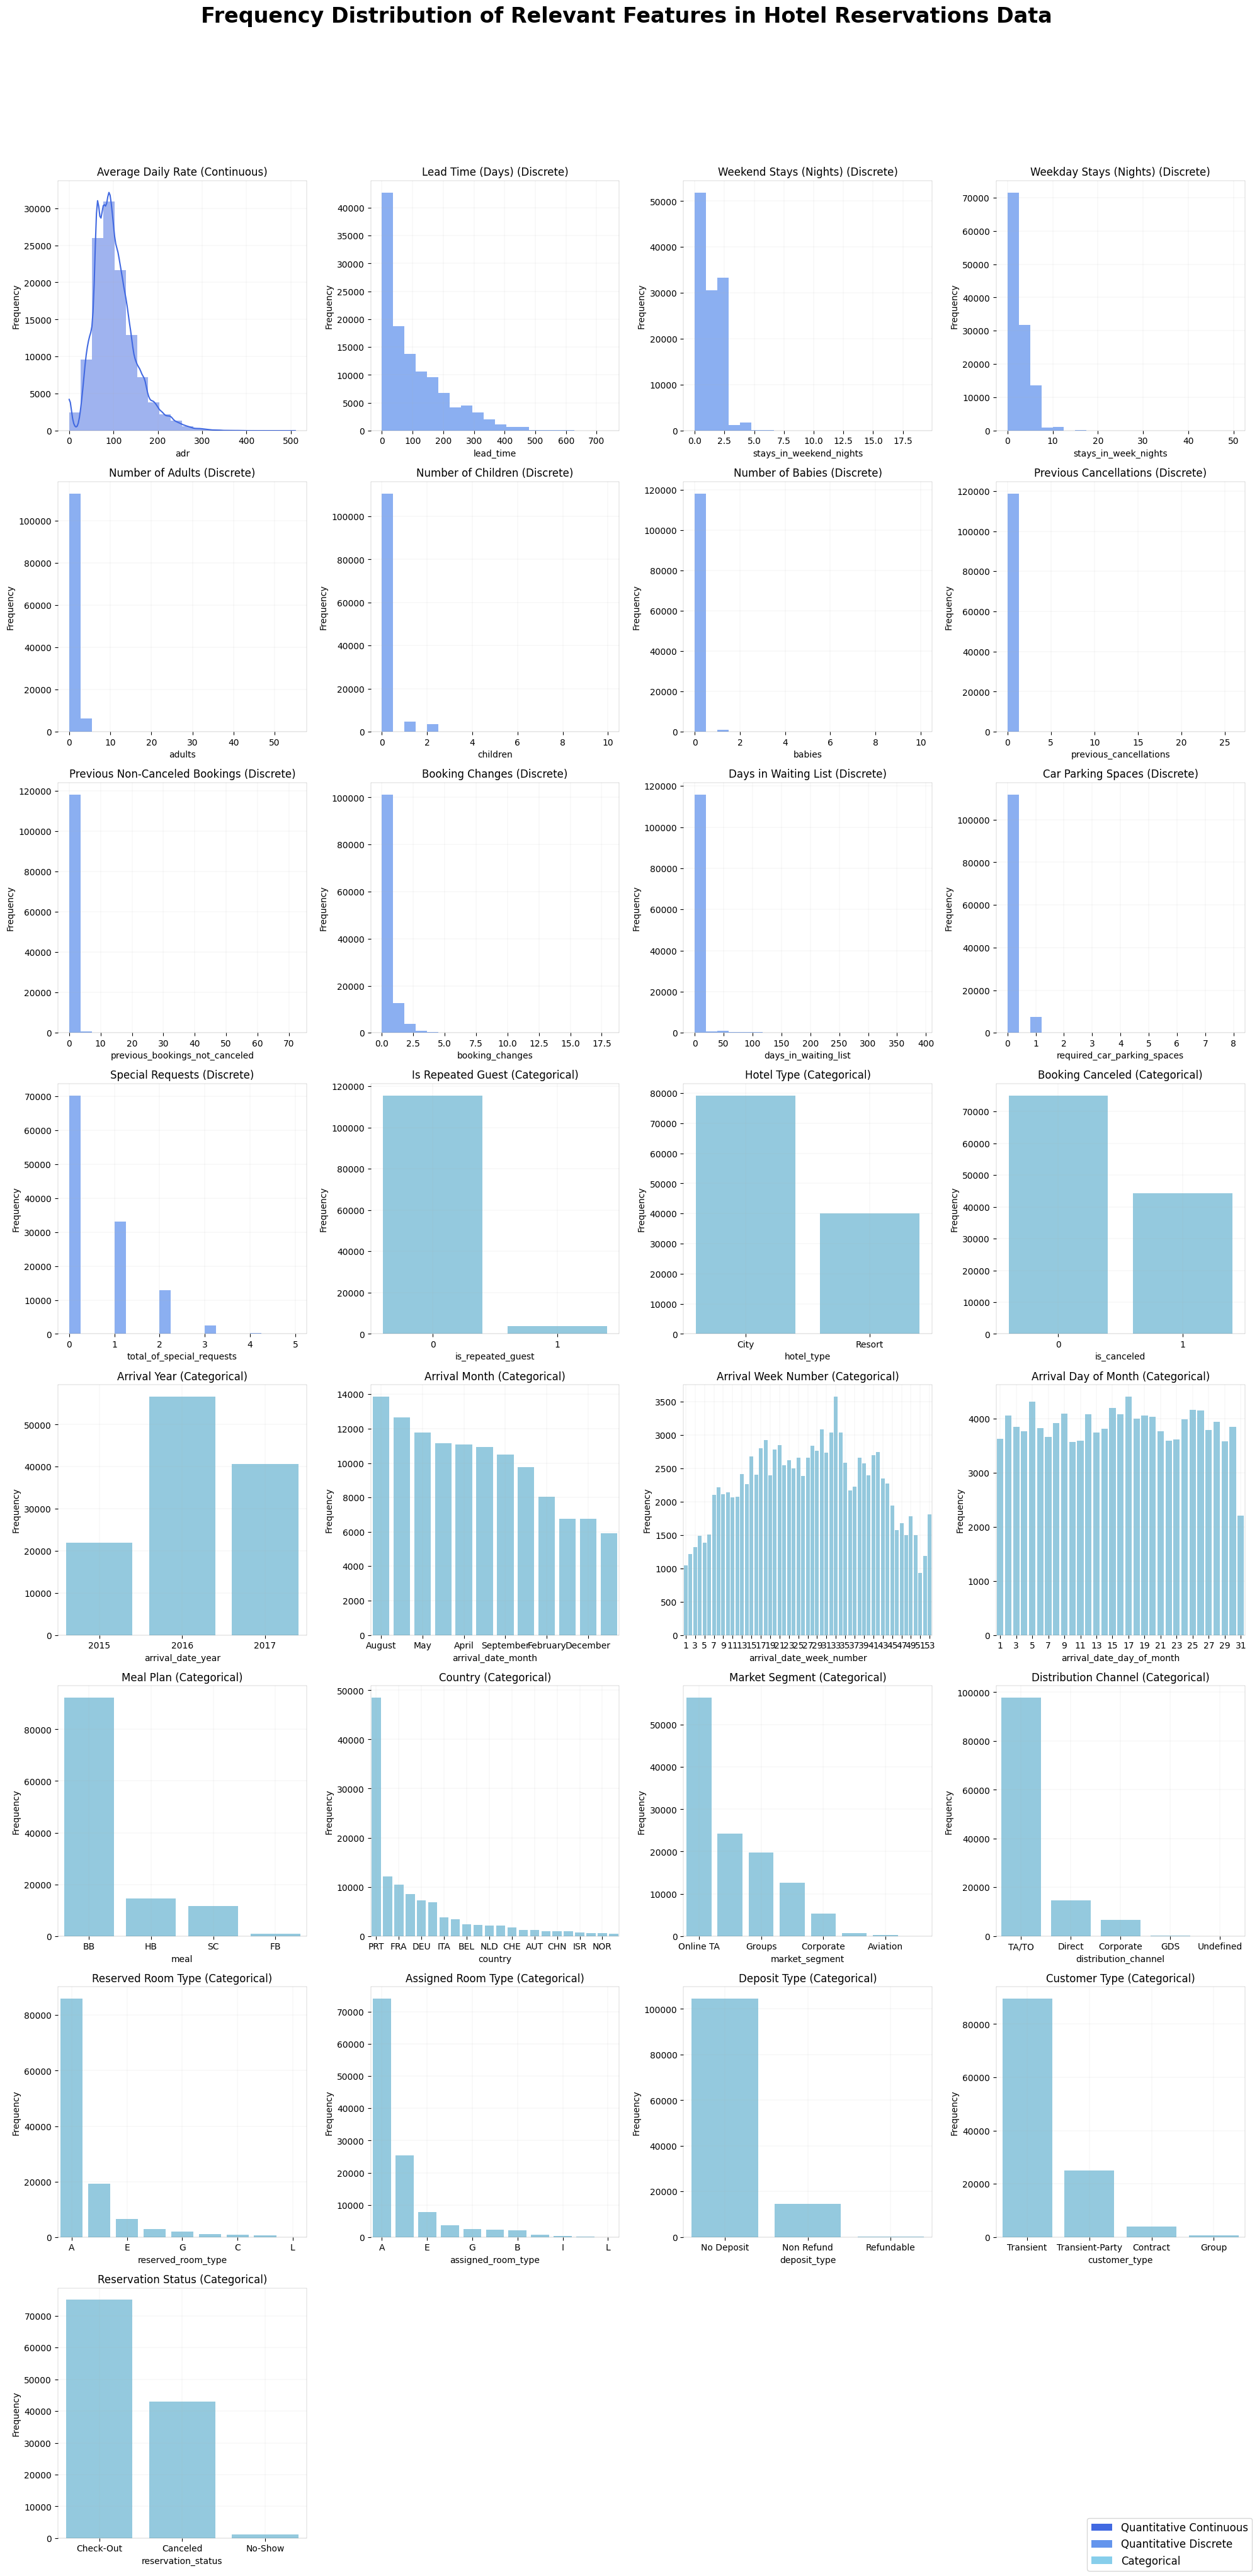

In [19]:
# Define the dataset
data = hotel_reservations_data.copy()

# Group low-frequency countries into "Other"
country_threshold = 500  # Minimum frequency to keep a country as-is
if 'country' in data.columns:
    country_counts = data['country'].value_counts()
    data['country'] = data['country'].apply(lambda x: x if country_counts[x] >= country_threshold else 'Other')

# Categorize features
quantitative_continuous = ['adr']  # Continuous numerical features
quantitative_discrete = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
    'required_car_parking_spaces', 'total_of_special_requests'
]  # Discrete numerical features
categorical = [
    'is_repeated_guest', 'hotel_type', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 
    'arrival_date_week_number', 'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
    'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type',
    'customer_type', 'reservation_status'
]  # Categorical features

# Combine all features
all_features = quantitative_continuous + quantitative_discrete + categorical

# Human-readable names for features
feature_names = hlp.get_human_readable_names()

# Set up the grid for subplots
num_features = len(all_features)
cols = 4
rows = (num_features // cols) + (num_features % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
axes = axes.flatten()

# Plot each feature
# Modify the plotting code to remove borders from bars
for i, feature in enumerate(all_features):
    ax = axes[i]
    readable_name = feature_names.get(feature, feature)
    if feature in quantitative_continuous:
        # Filter out ADR outlier
        sns.histplot(data[feature], bins=20, kde=True, ax=ax, color='royalblue', edgecolor=None)  # Remove borders
        ax.set_title(f'{readable_name} (Continuous)', fontsize=12)
    elif feature in quantitative_discrete:
        sns.histplot(data[feature], bins=20, kde=False, ax=ax, color='cornflowerblue', edgecolor=None)  # Remove borders
        ax.set_title(f'{readable_name} (Discrete)', fontsize=12)
    elif feature in categorical:
        # Sort x-axis in ascending order for numeric-like categorical variables
        if data[feature].dtype in ['int64', 'float64']:
            order = sorted(data[feature].dropna().unique())
        else:
            order = data[feature].value_counts().index
        sns.countplot(data=data, x=feature, ax=ax, order=order, color='skyblue', edgecolor=None)  # Remove borders
        ax.set_title(f'{readable_name} (Categorical)', fontsize=12)
        # Skip some x-axis labels if there are too many
        if len(order) > 7:  # Adjust the threshold as needed
            ax.set_xticks(range(0, len(order), 2))  # Show every 2nd label

    ax.set_ylabel('Frequency')
    
    ax.grid(linewidth=0.1)
    for spine in ax.spines.values():
        spine.set_linewidth(0.1)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# # Add a legend for feature types
# handles = [
#     plt.Line2D([0], [0], lw=4, color= 'royalblue', label='Quantitative Continuous'),
#     plt.Line2D([0], [0], lw=4, color= 'cornflowerblue', label='Quantitative Discrete'),
#     plt.Line2D([0], [0], lw=4, color= 'skyblue', label='Categorical')
# ]

handles = [
    Patch(facecolor='royalblue', label='Quantitative Continuous'),
    Patch(facecolor='cornflowerblue', label='Quantitative Discrete'),
    Patch(facecolor='skyblue', label='Categorical')
]

fig.legend(handles=handles, loc='lower right', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Frequency Distribution of Relevant Features in Hotel Reservations Data', fontsize=24, y=1.02, fontweight='bold')
plt.show()

del data

**Key Observations**

- **Booking Behavior**: Most bookings are short notice (right-skewed lead time) and are non-repeated guests with no prior cancellations or changes.

- **Stay Characteristics**: Majority of stays are short: 1–3 nights on weekdays, 0 or 2 nights on weekends; long stays are rare.

- **Guest Demographics**: Most bookings are for 2 adults, with no children or babies.

- **Reservation Trends**: ~63% not canceled, ~37% canceled, peaking in August and mostly in 2016.

- **Booking Sources & Preferences**: Dominant booking through Online Travel Agencies (OTA); most guests choose BB (bed & breakfast) meal plans and no deposit reservations.

- **Hotel Type Preference**: City Hotels dominate over Resort Hotels — important for understanding guest intent (business vs. leisure), seasonality, or pricing strategies.

- **Special Requests & Parking**: Most guests make no special requests, and very few request parking — relevant for operational planning and upsell opportunities.

- **Room Type Consistency**: Reserved and assigned room types closely align, mainly types A, D, E, F, G — useful for capacity planning and understanding guest expectations.

- **Country of Origin**: Portugal (PRT) is the top source market, followed by GBR, FRA, ESP, DEU — helpful for targeting promotions or understanding cultural preferences.

- **Customer Type**: Dominated by Transient and Transient-Party guests — further confirming short-stay, individual traveler patterns (vs. groups or corporate).


| Feature                          | Key Insight / Distribution                                   |
| :------------------------------- | :----------------------------------------------------------- |
| Average Daily Rate (ADR)         | Right-skewed; Peak ~100; Most < 200                          |
| Lead Time (Days)                 | Heavily Right-skewed; Most bookings short notice             |
| Weekend Nights Stayed            | Peaks: 0, 2 nights; 1 common; >2 rare                      |
| Weekday Nights Stayed           | Right-skewed; Peak: 1-3 nights; Longer stays rare             |
| Number of Adults                 | Peak: 2; 1 & follow; >3 rare; 0 needs check                  |
| Number of Children               | Vast majority: 0; followed by 1 and 2, >3 rare                                 |
| Number of Babies                 | Vast majority: 0; Very rare                                |
| Previous Cancellations         | Vast majority: 0 (Few repeat guests)                                             |
| Previous Non-Canceled Bookings   | Vast majority: 0 (Few repeat guests)                       |
| Booking Changes                  | Vast majority: 0                                             |
| Days in Waiting List                | Vast majority: 0                                             |
| Car Parking Spaces               | Vast majority: 0; 1 rare                                   |
| Special Requests                 | Peak: 0; 1 common; Decreasing frequency                      |
| Repeated Guest                | Majority: Not repeated; Few repeat guests |
| Reservation Status               | ~60% Check-Out; ~37% Canceled; ~1% No-Show                 |
| Hotel Type                       | City Hotel > Resort Hotel                                    |
| Booking Canceled (`is_canceled`) | Not Canceled ~63%, Canceled ~37%                        |
| Arrival Year                     | Bookings are highest in 2016, followed by 2017 and 2015.   |
| Arrival Month                    | Peak: August; High: July, May; Low: Jan, Nov, Dec          |
| Arrival Week Number              | Bookings are evenly distributed across weeks, with slight peaks in mid-year weeks. |
| Arrival Day of Month             | Bookings are evenly distributed across all days of the month, with no significant peaks. |
| Market Segment     | Dominant: Online TA; Others: Offline TA/TO, Groups, Direct |
| Meal Preferences                 | Dominant: BB; Others: HB, SC; Rare: FB                      |
| Country of Origin                | Top: PRT; Others high: GBR, FRA, ESP, DEU                  |
| Distribution Channel             | Top: TA/TO; Others: Direct, Corporate                      |
| Reserved Room Type               | Top: A, D, E, F, G                                           |
| Assigned Room Type               | Top: A, D, E, F, G (Similar to Reserved)                     |
| Deposit Type                     | Dominant: No Deposit; Small: Non Refund; Rare: Refundable   |
| Customer Type                    | Top: Transient, Transient-Party; Others: Contract, Group   |

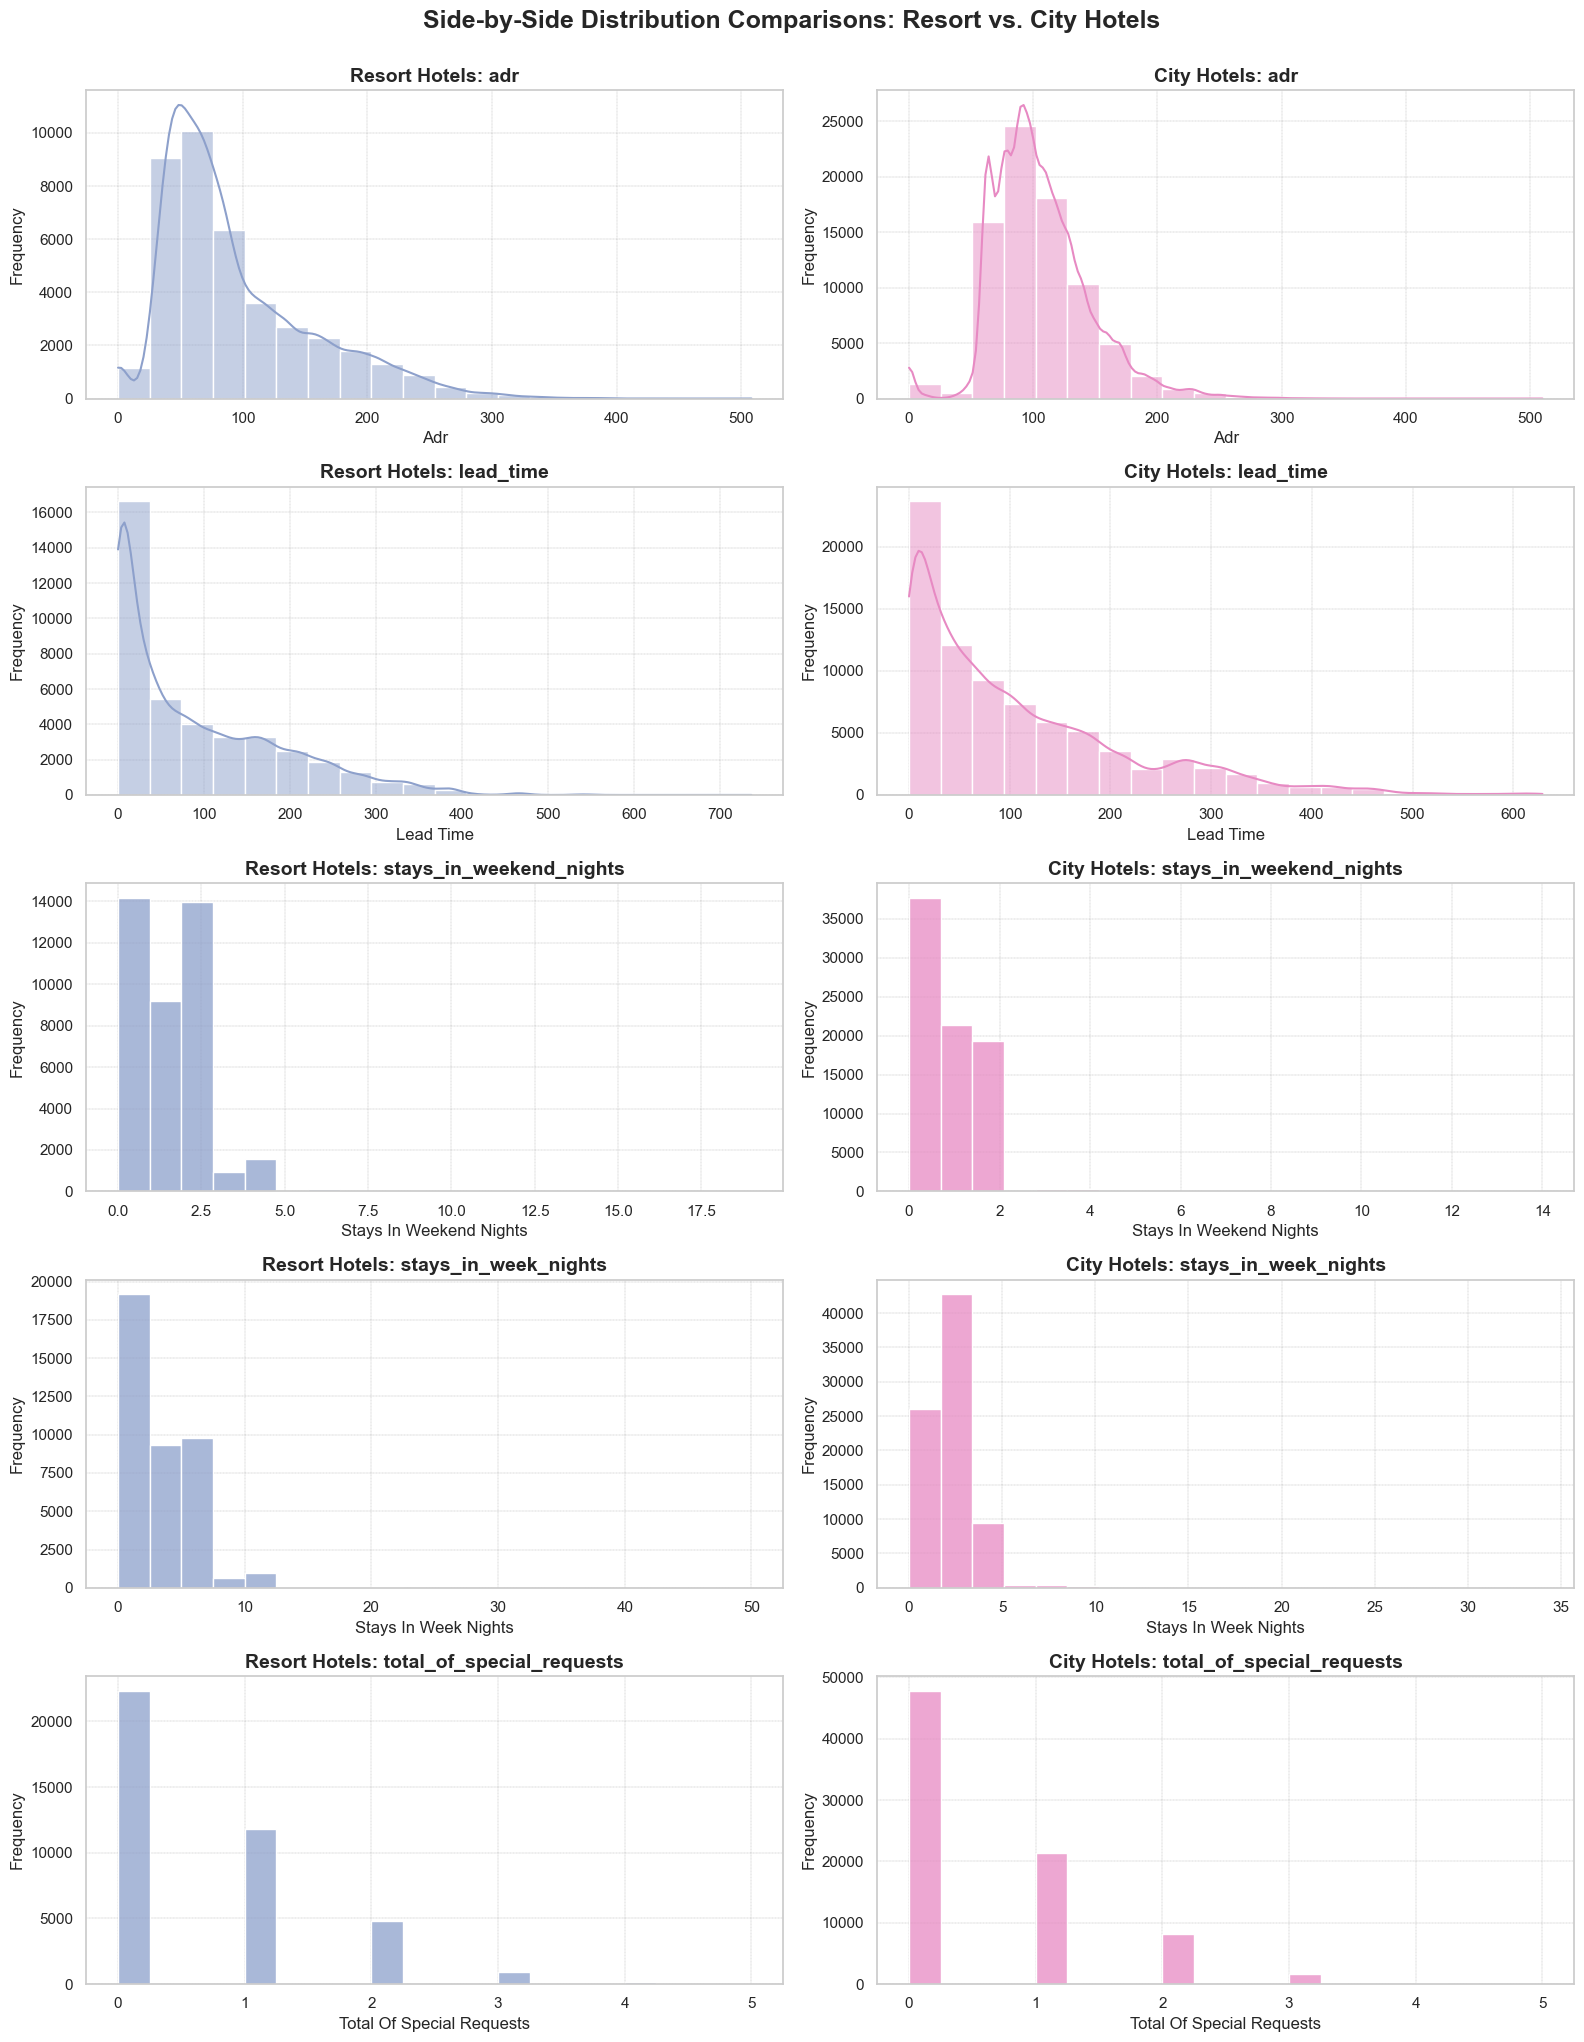

In [20]:
# Define the dataset
data = hotel_reservations_data.copy()

# Set a consistent style and color palette for the plots
sns.set_theme(style="whitegrid", palette="pastel")
color_palette = ['#8da0cb', '#e78ac3']

# Features to compare distributions
features_to_compare = ['adr', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_of_special_requests']

# Create subplots for side-by-side comparison
num_features = len(features_to_compare)
fig, axes = plt.subplots(num_features, 2, figsize=(16, num_features * 4), sharey=False)

# Loop through each feature and create side-by-side plots
for i, feature in enumerate(features_to_compare):
    # Determine if the feature is discrete
    is_discrete = feature in ['stays_in_weekend_nights', 'stays_in_week_nights', 'total_of_special_requests']

    # Resort hotel distribution
    sns.histplot(
        data=data[data['hotel_type'] == 'Resort'],
        x=feature,
        kde=not is_discrete,  # Disable kde for discrete features
        bins=20,
        color=color_palette[0],
        ax=axes[i, 0]
    )
    axes[i, 0].set_title(f'Resort Hotels: {feature}', fontsize=14, fontweight='bold')
    axes[i, 0].set_xlabel(feature.replace('_', ' ').title(), fontsize=12)
    axes[i, 0].set_ylabel('Frequency', fontsize=12)
    axes[i, 0].grid(axis='both', linestyle='--', linewidth=0.2, color='gray')

    # City hotel distribution
    sns.histplot(
        data=data[data['hotel_type'] == 'City'],
        x=feature,
        kde=not is_discrete,  # Disable kde for discrete features
        bins=20,
        color=color_palette[1],
        ax=axes[i, 1]
    )
    axes[i, 1].set_title(f'City Hotels: {feature}', fontsize=14, fontweight='bold')
    axes[i, 1].set_xlabel(feature.replace('_', ' ').title(), fontsize=12)
    axes[i, 1].set_ylabel('Frequency', fontsize=12)
    axes[i, 1].grid(axis='both', linestyle='--', linewidth=0.2, color='gray')

# Adjust layout
plt.tight_layout()
plt.suptitle('Side-by-Side Distribution Comparisons: Resort vs. City Hotels', fontsize=18, y=1.02, fontweight='bold')
plt.show()

del data

**Key Observations**

- **ADR (Average Daily Rate)**:
    - **City Hotels**: Higher ADR values are more frequent, with a peak around 100–150. The distribution is right-skewed, indicating a few high-value bookings.
    - **Resort Hotels**: Lower ADR values dominate, with a peak around 50–100. The spread is wider, suggesting more variability in pricing.
    - In City hotels, canceled bookings may have a slightly higher median ADR than non-canceled ones, though the difference is subtle.

- **Lead Time**:
    - Both hotel types exhibit a right-skewed distribution, with most bookings having shorter lead times.
    - **Resort Hotels**: Tend to have slightly longer lead times compared to City Hotels, possibly due to vacation planning.
    - **City Hotels**: Shorter lead times dominate, aligning with business travel patterns.
    - Bookings with longer lead times are more likely to be canceled, observed in both City and Resort hotels.

- **Cancellation Rates**:
    - City Hotels: Show a significantly higher overall cancellation rate compared to Resort Hotels.

    - This trend suggests that business-related bookings (more typical in City Hotels) may be more prone to last-minute changes or cancellations.

- **Stays in Weekend Nights**:
    - **Resort Hotels**: Higher frequencies for weekend stays, particularly for 2 nights, which aligns with leisure travel patterns.
    - **City Hotels**: Fewer extended weekend stays, with most bookings for 0–1 weekend nights.

- **Stays in Week Nights**:
    - **City Hotels**: Shorter weekday stays (1–3 nights) dominate, reflecting business travel trends.
    - **Resort Hotels**: A wider spread, with some longer weekday stays, likely due to vacation packages.

- **Total of Special Requests**:
    - Both hotel types have a high frequency of bookings with no special requests.
    - **City Hotels**: Slightly higher instances of bookings with multiple special requests, possibly due to business-related needs.

**Key Observations**:
- City Hotels cater more to short-term stays with higher ADR and fewer weekend nights, aligning with business travel.
- Resort Hotels show longer stays, especially on weekends, with lower ADR and more variability, aligning with leisure travel.

##### Feature Correlation

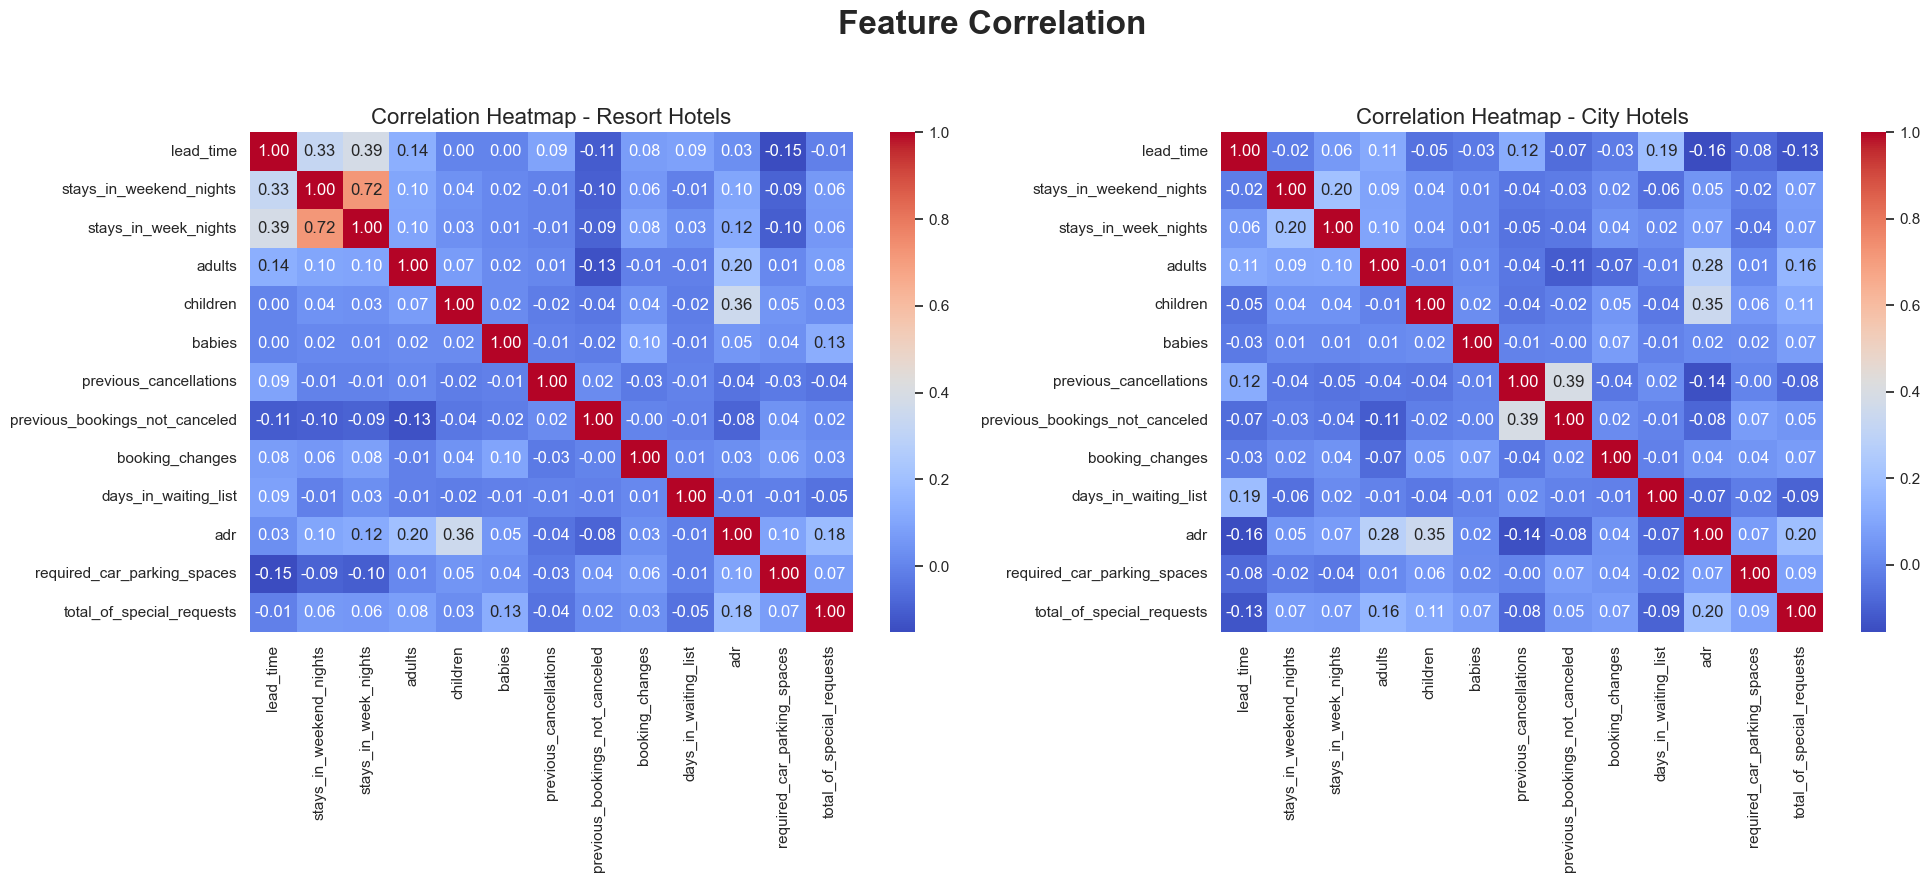

In [21]:
# Filter data for resort and city hotels
resort_data = hotel_reservations_data[hotel_reservations_data['hotel_type'] == 'Resort']
city_data = hotel_reservations_data[hotel_reservations_data['hotel_type'] == 'City']

# Select numerical features for correlation analysis
numerical_features = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
    'adr', 'required_car_parking_spaces', 'total_of_special_requests'
]

# Compute correlations
resort_corr = resort_data[numerical_features].corr()
city_corr = city_data[numerical_features].corr()

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Resort hotel heatmap
sns.heatmap(resort_corr, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[0])
axes[0].set_title("Correlation Heatmap - Resort Hotels", fontsize=16)

# City hotel heatmap
sns.heatmap(city_corr, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[1])
axes[1].set_title("Correlation Heatmap - City Hotels", fontsize=16)

plt.tight_layout()
plt.suptitle('Feature Correlation', fontsize=24, y=1.1, fontweight='bold')
plt.show()

del city_data, resort_data

**Inferences**

- **Lead Time and ADR**: Stronger correlation in city hotels suggests targeting longer lead times with higher rates or promotions to secure bookings.

- **Weekend and Weekday Stays**: Strong correlation in resort hotels highlights opportunities for marketing extended stay packages. Weaker correlation in city hotels suggests focusing on shorter, distinct stays.

- **Special Requests and ADR**: Positive correlation in city hotels indicates potential for upselling services or offering premium packages.

- **Previous Cancellations**: Stronger correlation in city hotels suggests opportunities for customer retention strategies and targeted offers to reduce cancellations.

- **Car Parking Spaces**: Weak negative correlation in resort hotels suggests closer bookings are more likely to request parking, aiding operational planning.

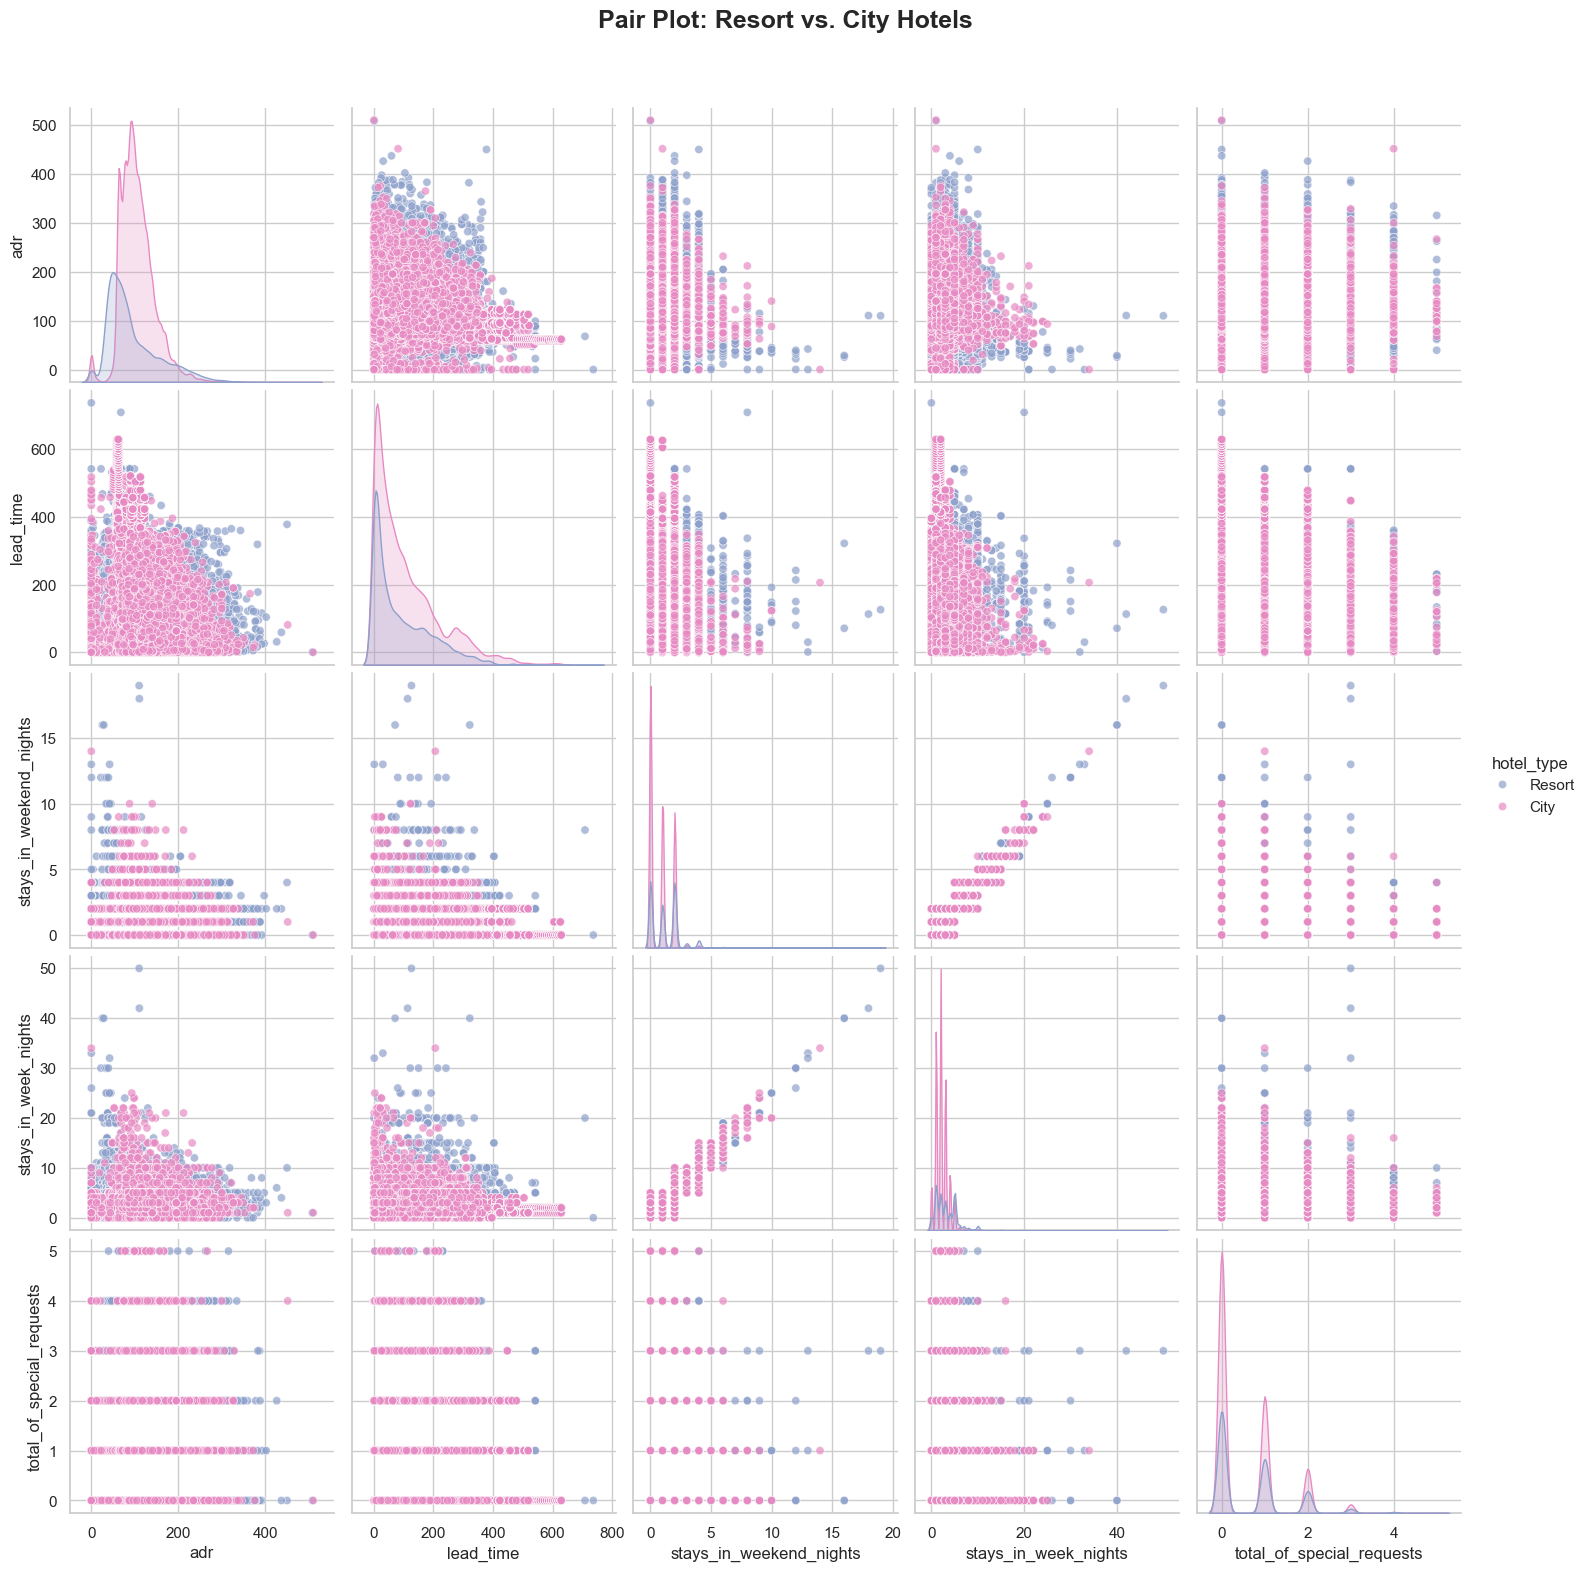

In [22]:
# Define the dataset
data = hotel_reservations_data.copy()

# Set a consistent style and color palette for the plots
sns.set_theme(style="whitegrid", palette="pastel")
color_palette = ['#8da0cb', '#e78ac3']

# Pair plot for selected features
selected_features = ['adr', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_of_special_requests']
sns.pairplot(
    data=data,
    vars=selected_features,
    hue='hotel_type',
    palette=color_palette,
    diag_kind='kde',
    plot_kws={'alpha': 0.7},
    height=3
)
plt.suptitle('Pair Plot: Resort vs. City Hotels', fontsize=18, y=1.05, fontweight='bold')
plt.show()

**Key Observations**

- **ADR (Average Daily Rate)**: City hotels generally have a higher ADR compared to Resort hotels, as seen from the density distribution. Resort hotels show a wider spread in ADR, indicating more variability in pricing.

- **Lead Time**: Both City and Resort hotels exhibit a right-skewed distribution for lead time, with most bookings having shorter lead times. Resort hotels tend to have slightly longer lead times compared to City hotels, possibly due to vacation planning.

- **Stays in Weekend Nights**: Resort hotels show higher frequencies for weekend stays, particularly for 2 nights, which aligns with leisure travel patterns. City hotels have a more even distribution, with fewer extended weekend stays.

- **Stays in Week Nights**: City hotels dominate shorter weekday stays (1–3 nights), reflecting business travel trends. Resort hotels show a wider spread, with some longer weekday stays, likely due to vacation packages.

- **Total of Special Requests**: Both hotel types have a high frequency of bookings with no special requests. City hotels show slightly higher instances of bookings with multiple special requests, possibly due to business-related needs.

- **Correlations**:
    - There is a visible positive correlation between stays_in_weekend_nights and stays_in_week_nights for Resort hotels, indicating longer overall stays.
    - ADR and lead_time show no strong linear relationship, but higher ADR bookings tend to have slightly shorter lead times.


##### Repeat Guests Behavior

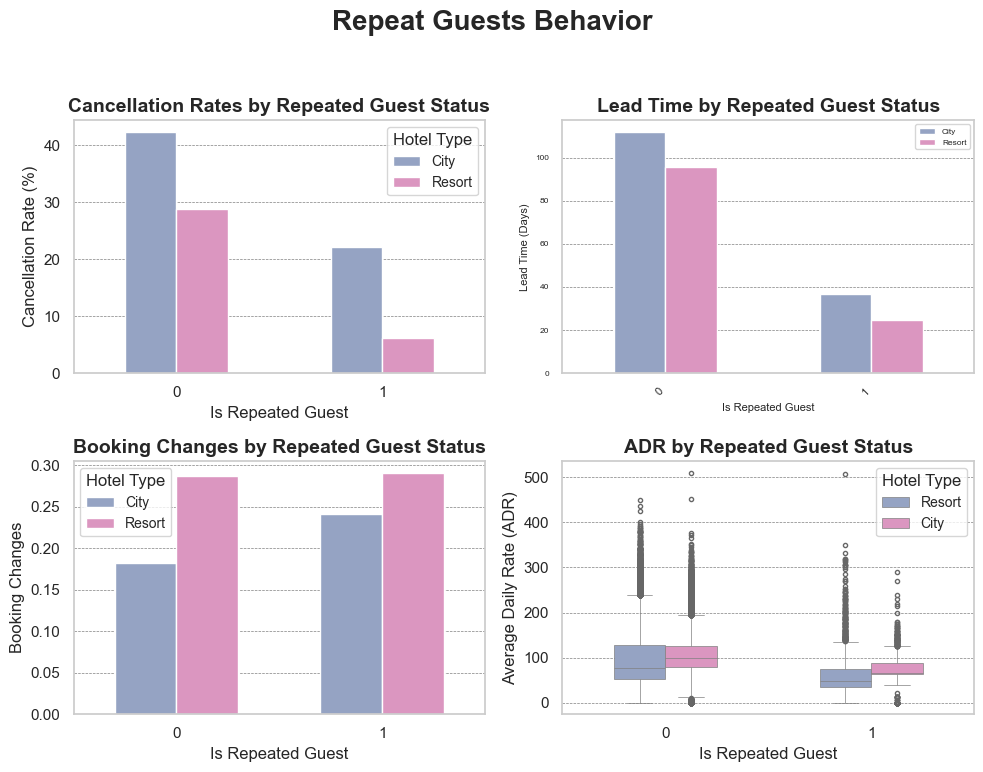

Cancellation Rates Data:
   is_repeated_guest hotel_type  is_canceled
0                  0       City    42.286714
1                  0     Resort    28.767410
2                  1       City    22.205362
3                  1     Resort     6.246483

Lead Time Data:
   is_repeated_guest hotel_type   lead_time
0                  0       City  111.761482
1                  0     Resort   95.841621
2                  1       City   36.624684
3                  1     Resort   24.845808

Booking Changes Data:
   is_repeated_guest hotel_type  booking_changes
0                  0       City         0.182535
1                  0     Resort         0.287387
2                  1       City         0.241275
3                  1     Resort         0.290377

Boxplot Data (Sample):
   is_repeated_guest   adr hotel_type
0                  0   0.0     Resort
1                  0   0.0     Resort
2                  0  75.0     Resort
3                  0  75.0     Resort
4                  0  98.0     

In [23]:
# Define the dataset
data = hotel_reservations_data.copy()

# Set a consistent style for the plots
sns.set_theme(style="whitegrid", palette="pastel")
color_palette = ['#8da0cb', '#e78ac3']

# Create subplots for all four plots
fig, axes = plt.subplots(2, 2, figsize=(10, 7))  # 2 rows, 2 columns

# 1. Bar plot for Cancellation Rates by Repeated Guest Status
cancellation_rates = data.groupby(['is_repeated_guest', 'hotel_type'])['is_canceled'].mean().reset_index()
cancellation_rates['is_canceled'] *= 100  # Convert to percentage

sns.barplot(
    data=cancellation_rates,
    x='is_repeated_guest',
    y='is_canceled',
    hue='hotel_type',
    palette=color_palette,
    width=0.5,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Cancellation Rates by Repeated Guest Status', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Is Repeated Guest', fontsize=12)
axes[0, 0].set_ylabel('Cancellation Rate (%)', fontsize=12)
axes[0, 0].legend(title='Hotel Type', fontsize=10)
axes[0, 0].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# 2. Bar plot for Lead Time by Repeated Guest Status
lead_time = data.groupby(['is_repeated_guest', 'hotel_type'])['lead_time'].mean().reset_index()

sns.barplot(
    data=lead_time,
    x='is_repeated_guest',
    y='lead_time',
    hue='hotel_type',
    palette=color_palette,
    width=0.5,
    ax=axes[0, 1]
)
axes[0, 1].set_title('Lead Time by Repeated Guest Status', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Is Repeated Guest', fontsize=8)
axes[0, 1].set_ylabel('Lead Time (Days)', fontsize=8)
axes[0, 1].tick_params(axis='y', labelsize=6)
axes[0, 1].set_xticks(axes[0, 1].get_xticks())
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right', fontsize=8)
axes[0, 1].legend(fontsize=6, title_fontsize=6)
axes[0, 1].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# 3. Bar plot for Booking Changes by Repeated Guest Status
booking_changes = data.groupby(['is_repeated_guest', 'hotel_type'])['booking_changes'].mean().reset_index()

sns.barplot(
    data=booking_changes,
    x='is_repeated_guest',
    y='booking_changes',
    hue='hotel_type',
    palette=color_palette,
    width=0.6,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Booking Changes by Repeated Guest Status', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Is Repeated Guest', fontsize=12)
axes[1, 0].set_ylabel('Booking Changes', fontsize=12)
axes[1, 0].legend(title='Hotel Type', fontsize=10)
axes[1, 0].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# 4. Box plot for ADR by Repeated Guest Status
sns.boxplot(
    data=data,
    x='is_repeated_guest',
    y='adr',
    hue='hotel_type',
    palette=color_palette,
    width=0.5,
    ax=axes[1, 1],
    boxprops=dict(edgecolor='gray', linewidth=0.5),
    medianprops=dict(color='gray', linewidth=0.5),
    whiskerprops=dict(color='gray', linewidth=0.5),
    capprops=dict(color='gray', linewidth=0.5),
    flierprops=dict(marker='o', color='gray', markersize=3, linestyle='none')
)
axes[1, 1].set_title('ADR by Repeated Guest Status', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Is Repeated Guest', fontsize=12)
axes[1, 1].set_ylabel('Average Daily Rate (ADR)', fontsize=12)
axes[1, 1].legend(title='Hotel Type', fontsize=10)
axes[1, 1].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Adjust layout
plt.tight_layout()
plt.suptitle('Repeat Guests Behavior', fontsize=20, y=1.1, fontweight='bold')
plt.show()

# Print the underlying data
print("Cancellation Rates Data:")
print(cancellation_rates)
print("\nLead Time Data:")
print(lead_time)
print("\nBooking Changes Data:")
print(booking_changes)
print("\nBoxplot Data (Sample):")
print(data[['is_repeated_guest', 'adr', 'hotel_type']].head())

del data

- **Cancellation Rates**: Non-repeated guests have higher cancellation rates compared to repeated guests, especially in city hotels.

- **Lead Time**: Non-repeated guests tend to book with longer lead times compared to repeated guests, with city hotels showing higher lead times overall.

- **Booking Changes**: Booking changes are slightly more frequent for repeated guests, with minimal differences between city and resort hotels.

- **ADR (Average Daily Rate)**:
    - **Non-Repeated Guests**: Non-repeated guests generally have a higher ADR compared to repeated guests. City hotels have a slightly higher ADR than resort hotels for non-repeated guests.

    - **Repeated Guests**: Repeated guests have a lower ADR on average, indicating possible discounts or loyalty benefits. ADR for repeated guests is more consistent, with fewer outliers compared to non-repeated guests.
    
    - **City vs. Resort Hotels**: City hotels consistently show higher ADRs than resort hotels for both repeated and non-repeated guests.

#### Cancellation Behavior

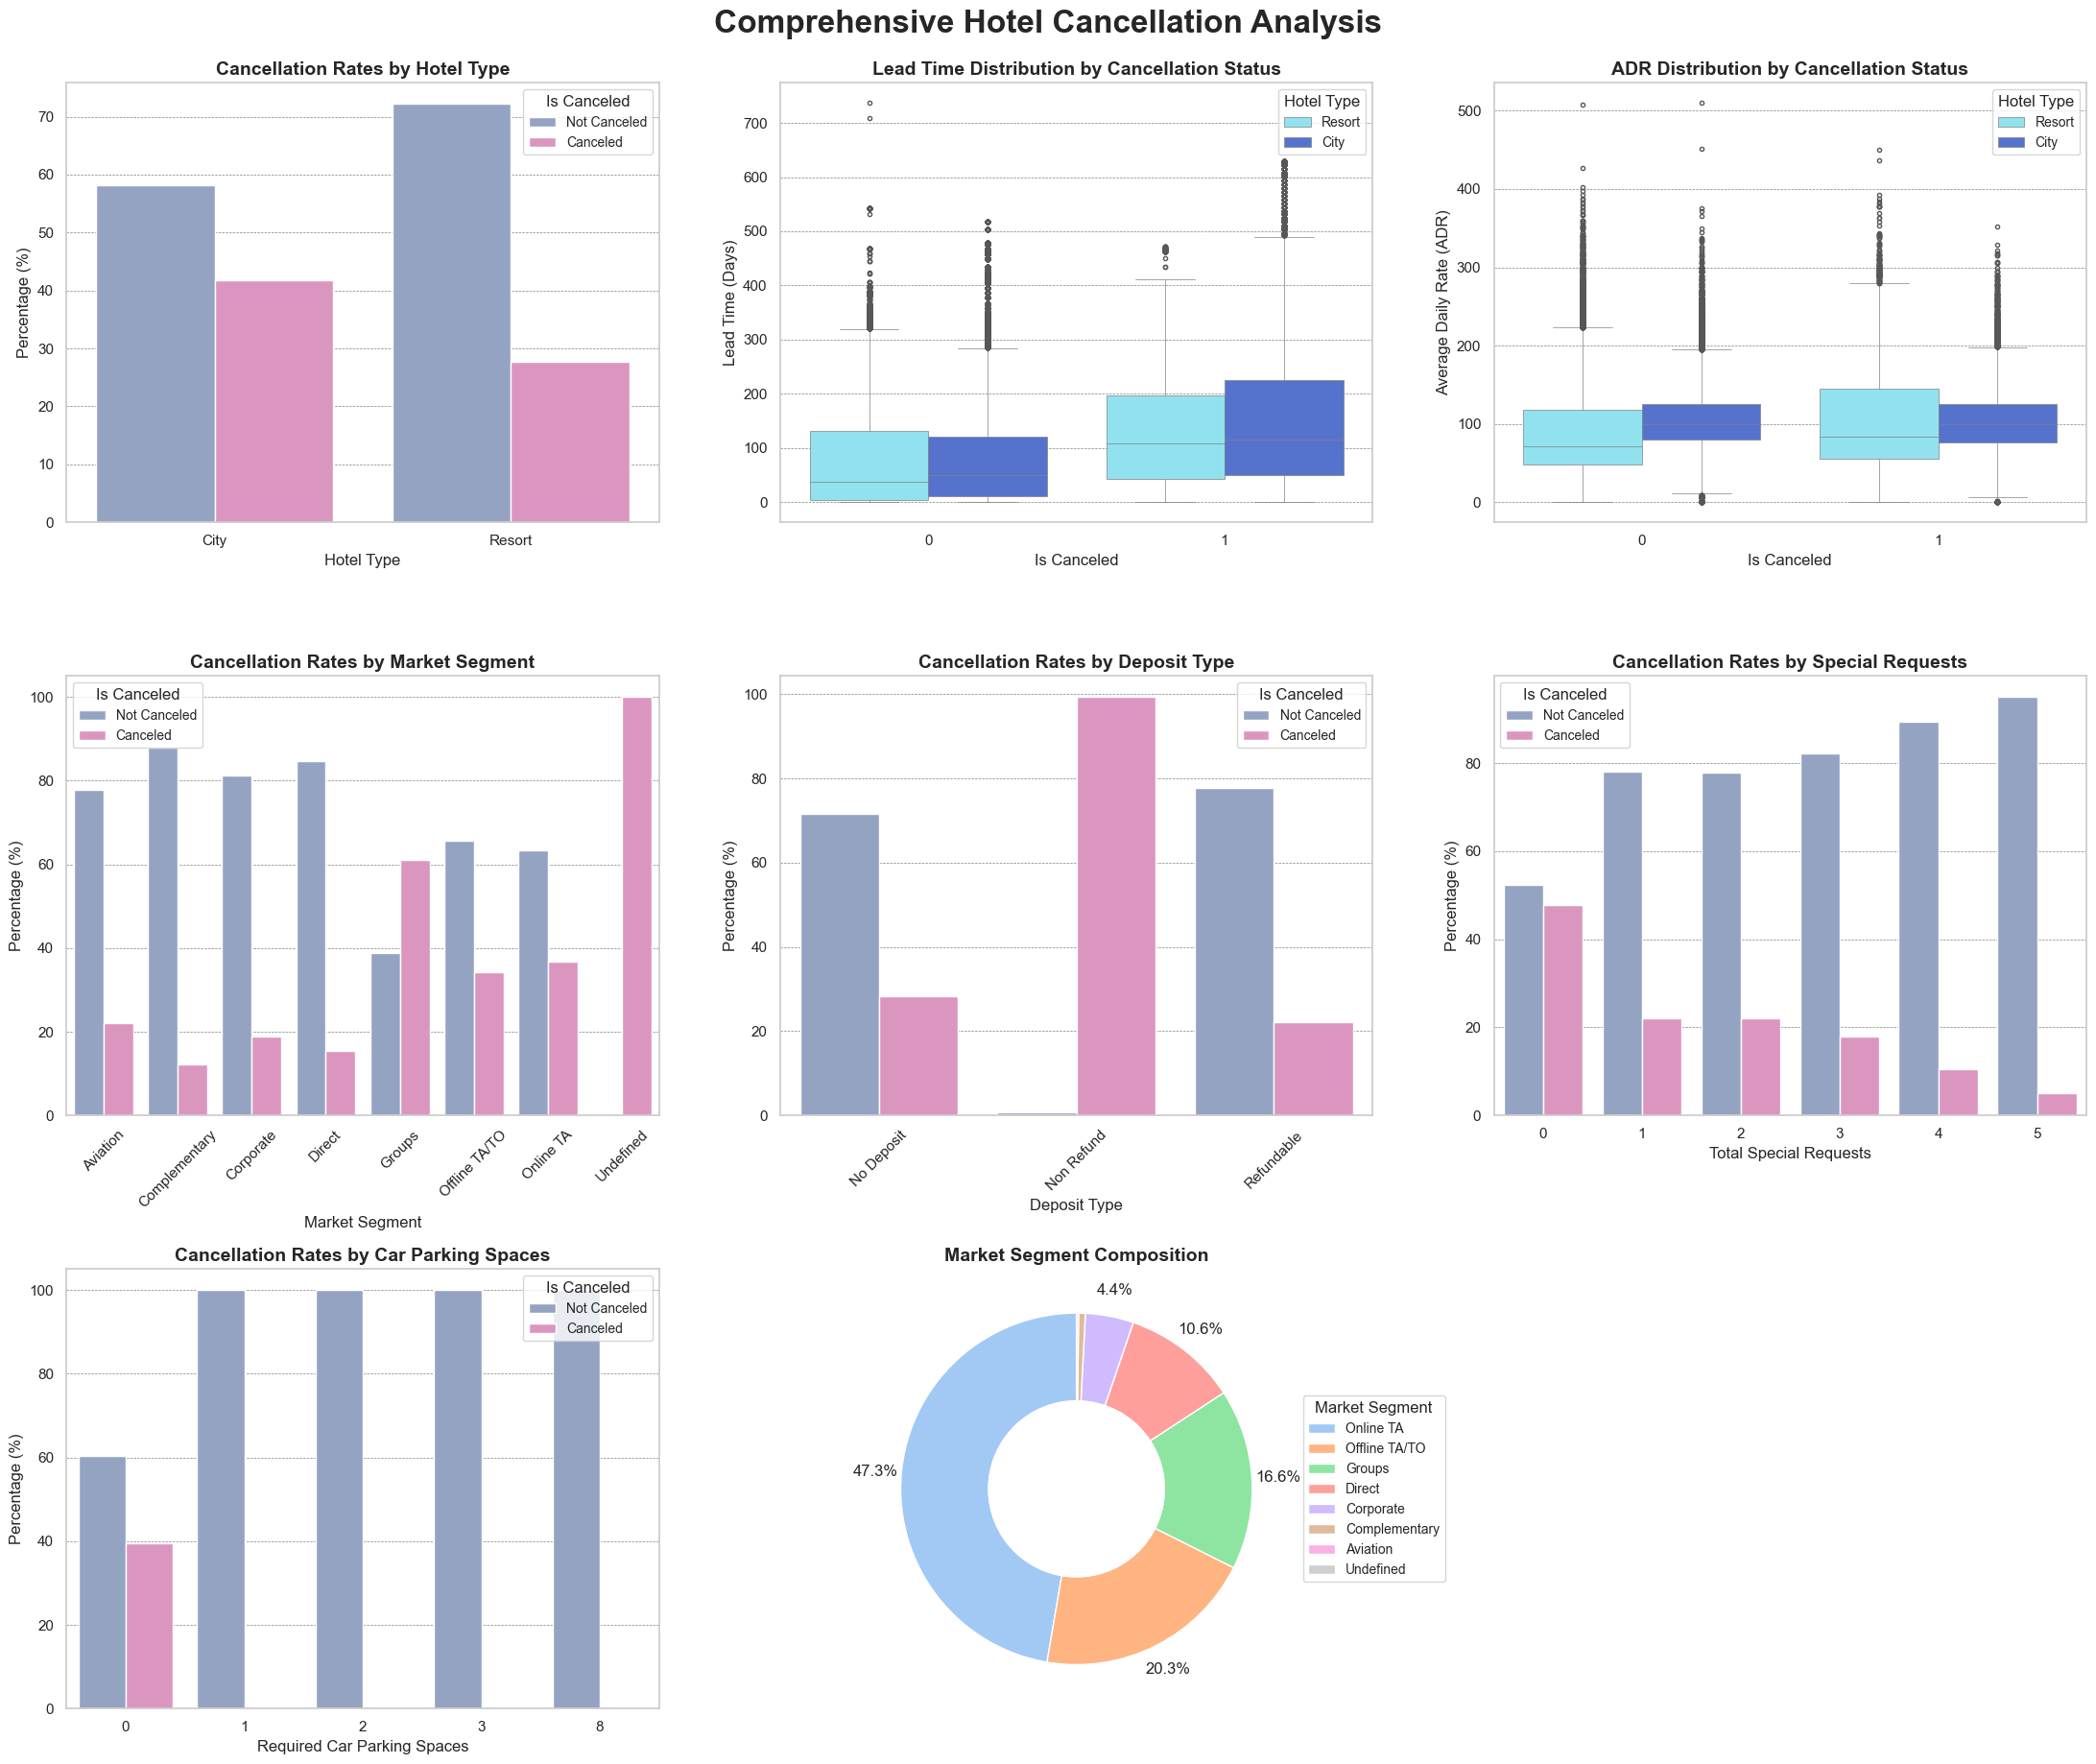

Cancellation Rates Data:
  hotel_type  is_canceled  count  percentage
0       City            0  46084   58.214800
1       City            1  33078   41.785200
2     Resort            0  28926   72.231933
3     Resort            1  11120   27.768067

Lead Time Data (First few records):
   is_canceled  lead_time hotel_type
0            0        342     Resort
1            0        737     Resort
2            0          7     Resort
3            0         13     Resort
4            0         14     Resort

ADR Data (First few records):
   is_canceled   adr hotel_type
0            0   0.0     Resort
1            0   0.0     Resort
2            0  75.0     Resort
3            0  75.0     Resort
4            0  98.0     Resort

Market Segment Cancellation Data:
   market_segment  is_canceled  count  percentage
0        Aviation            0    183   77.872340
1        Aviation            1     52   22.127660
2   Complementary            0    639   87.774725
3   Complementary            1   

In [24]:
# Define the dataset
data = hotel_reservations_data.copy()

# Set a consistent style for the plots
sns.set_theme(style="whitegrid", palette="pastel")
color_palette_full = ['#82EEFD', '#4169E1', '#8da0cb', '#e78ac3']
color_palette_half = ['#8da0cb', '#e78ac3']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(22, 18))  # Total of 9 axes, we'll use only 7

# Flatten axes for easier indexing
axes = axes.flatten()

# 1. Bar plot for Cancellation Rates by Hotel Type
cancellation_rates = data.groupby(['hotel_type', 'is_canceled']).size().reset_index(name='count')
cancellation_rates['percentage'] = (
    cancellation_rates.groupby('hotel_type')['count']
    .apply(lambda x: 100 * x / x.sum())
    .values
)
sns.barplot(
    data=cancellation_rates,
    x='hotel_type',
    y='percentage',
    hue='is_canceled',
    palette=color_palette_full[2:4],
    ax=axes[0]
)
axes[0].set_title('Cancellation Rates by Hotel Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hotel Type')
axes[0].set_ylabel('Percentage (%)')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles, labels=['Not Canceled', 'Canceled'], title='Is Canceled', fontsize=10)
axes[0].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# 2. Box plot for Lead Time by Cancellation Status
sns.boxplot(
    data=data,
    x='is_canceled',
    y='lead_time',
    hue='hotel_type',
    palette=color_palette_full[0:2],
    ax=axes[1],
    boxprops=dict(edgecolor='gray', linewidth=0.5),
    medianprops=dict(color='gray', linewidth=0.5),
    whiskerprops=dict(color='gray', linewidth=0.5),
    capprops=dict(color='gray', linewidth=0.5),
    flierprops=dict(marker='o', color='gray', markersize=3, linestyle='none')
)
axes[1].set_title('Lead Time Distribution by Cancellation Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Is Canceled')
axes[1].set_ylabel('Lead Time (Days)')
axes[1].legend(title='Hotel Type', fontsize=10)
axes[1].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# 3. Box plot for ADR by Cancellation Status
sns.boxplot(
    data=data,
    x='is_canceled',
    y='adr',
    hue='hotel_type',
    palette=color_palette_full[0:2],
    ax=axes[2],
    boxprops=dict(edgecolor='gray', linewidth=0.5),
    medianprops=dict(color='gray', linewidth=0.5),
    whiskerprops=dict(color='gray', linewidth=0.5),
    capprops=dict(color='gray', linewidth=0.5),
    flierprops=dict(marker='o', color='gray', markersize=3, linestyle='none')
)
axes[2].set_title('ADR Distribution by Cancellation Status', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Is Canceled')
axes[2].set_ylabel('Average Daily Rate (ADR)')
axes[2].legend(title='Hotel Type', fontsize=10)
axes[2].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# 4. Cancellation Rates by Market Segment
market_segment_cancellation = data.groupby(['market_segment', 'is_canceled']).size().reset_index(name='count')
market_segment_cancellation['percentage'] = (
    market_segment_cancellation.groupby('market_segment')['count']
    .apply(lambda x: 100 * x / x.sum())
    .values
)
sns.barplot(
    data=market_segment_cancellation,
    x='market_segment',
    y='percentage',
    hue='is_canceled',
    palette=color_palette_half,
    ax=axes[3]
)
axes[3].set_title('Cancellation Rates by Market Segment', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Market Segment')
axes[3].set_ylabel('Percentage (%)')
axes[3].tick_params(axis='x', rotation=45)
handles, labels = axes[3].get_legend_handles_labels()
axes[3].legend(handles=handles, labels=['Not Canceled', 'Canceled'], title='Is Canceled', fontsize=10)
axes[3].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# 5. Cancellation Rates by Deposit Type
deposit_type_cancellation = data.groupby(['deposit_type', 'is_canceled']).size().reset_index(name='count')
deposit_type_cancellation['percentage'] = (
    deposit_type_cancellation.groupby('deposit_type')['count']
    .apply(lambda x: 100 * x / x.sum())
    .values
)
sns.barplot(
    data=deposit_type_cancellation,
    x='deposit_type',
    y='percentage',
    hue='is_canceled',
    palette=color_palette_half,
    ax=axes[4]
)
axes[4].set_title('Cancellation Rates by Deposit Type', fontsize=14, fontweight='bold')
axes[4].set_xlabel('Deposit Type')
axes[4].set_ylabel('Percentage (%)')
axes[4].tick_params(axis='x', rotation=45)
handles, labels = axes[4].get_legend_handles_labels()
axes[4].legend(handles=handles, labels=['Not Canceled', 'Canceled'], title='Is Canceled', fontsize=10)
axes[4].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# 6. Cancellation Rates by Special Requests
special_requests_cancellation = data.groupby(['total_of_special_requests', 'is_canceled']).size().reset_index(name='count')
special_requests_cancellation['percentage'] = (
    special_requests_cancellation.groupby('total_of_special_requests')['count']
    .apply(lambda x: 100 * x / x.sum())
    .values
)
sns.barplot(
    data=special_requests_cancellation,
    x='total_of_special_requests',
    y='percentage',
    hue='is_canceled',
    palette=color_palette_half,
    ax=axes[5]
)
axes[5].set_title('Cancellation Rates by Special Requests', fontsize=14, fontweight='bold')
axes[5].set_xlabel('Total Special Requests')
axes[5].set_ylabel('Percentage (%)')
handles, labels = axes[5].get_legend_handles_labels()
axes[5].legend(handles=handles, labels=['Not Canceled', 'Canceled'], title='Is Canceled', fontsize=10)
axes[5].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# 7. Cancellation Rates by Car Parking Spaces
parking_cancellation = data.groupby(['required_car_parking_spaces', 'is_canceled']).size().reset_index(name='count')
parking_cancellation['percentage'] = (
    parking_cancellation.groupby('required_car_parking_spaces')['count']
    .apply(lambda x: 100 * x / x.sum())
    .values
)
sns.barplot(
    data=parking_cancellation,
    x='required_car_parking_spaces',
    y='percentage',
    hue='is_canceled',
    palette=color_palette_half,
    ax=axes[6]
)
axes[6].set_title('Cancellation Rates by Car Parking Spaces', fontsize=14, fontweight='bold')
axes[6].set_xlabel('Required Car Parking Spaces')
axes[6].set_ylabel('Percentage (%)')
handles, labels = axes[6].get_legend_handles_labels()
axes[6].legend(handles=handles, labels=['Not Canceled', 'Canceled'], title='Is Canceled', fontsize=10)
axes[6].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Market Segment Composition Donut Chart
market_segment_counts = hotel_reservations_data['market_segment'].value_counts()
market_segment_labels = market_segment_counts.index
market_segment_sizes = market_segment_counts.values

# Create a custom autopct function using closure to track index
market_segment_counts = hotel_reservations_data['market_segment'].value_counts()
market_segment_labels = market_segment_counts.index.tolist()
market_segment_sizes = market_segment_counts.values.tolist()

def make_autopct(labels_to_hide):
    def autopct(pct):
        index = autopct.counter
        label = market_segment_labels[index]
        autopct.counter += 1
        if label in labels_to_hide:
            return ''
        return f'{pct:.1f}%'
    autopct.counter = 0
    return autopct
# Use the function
autopct_func = make_autopct(['Complementary', 'Aviation', 'Undefined'])

# Create a donut chart as a subplot
axes[7].pie(
    market_segment_sizes,
    labels=None,  # Turn off labels
    autopct=autopct_func,
    startangle=90,
    colors=sns.color_palette("pastel"),
    wedgeprops=dict(width=0.5, edgecolor='w'),  # Reduce hole size
    pctdistance=1.15,
)

# Add a circle at the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.50, fc='white')  # Adjusted hole size
axes[7].add_artist(center_circle)

# Add legends
axes[7].legend(
    market_segment_labels,
    title='Market Segment',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

# Set title for the subplot
axes[7].set_title('Market Segment Composition', fontsize=14, fontweight='bold')

# Hide the last two unused subplots
# axes[7].axis('off')
axes[8].axis('off')

# Adjust layout
plt.tight_layout()
plt.suptitle('Comprehensive Hotel Cancellation Analysis', fontsize=24, y=1.02, fontweight='bold')
plt.show()

# Print the underlying data
print("Cancellation Rates Data:")
print(cancellation_rates)
print("\nLead Time Data (First few records):")
print(data[['is_canceled', 'lead_time', 'hotel_type']].head())
print("\nADR Data (First few records):")
print(data[['is_canceled', 'adr', 'hotel_type']].head())
print("\nMarket Segment Cancellation Data:")
print(market_segment_cancellation)
print("\nDeposit Type Cancellation Data:")
print(deposit_type_cancellation)
print("\nSpecial Requests Cancellation Data:")
print(special_requests_cancellation)
print("\nCar Parking Spaces Cancellation Data:")
print(parking_cancellation)

# Clean up
del data


**Key Observations**

- **Cancellation Rates by Hotel Type**: City Hotels have higher cancellation rates (~40%) compared to Resort Hotels (~27%). Insight: City Hotels face more cancellations, possibly due to shorter stays or business-related bookings.

- **Lead Time Distribution by Cancellation Status**: Canceled bookings have longer lead times for both City and Resort Hotels, with City Hotels showing slightly higher lead times. Insight: Longer lead times are associated with higher cancellation likelihood, especially for City Hotels.

- **ADR (Average Daily Rate) Distribution by Cancellation Status**: Canceled bookings have higher ADR for both City and Resort Hotels, with City Hotels showing slightly higher ADR. Insight: Higher ADR bookings are more likely to be canceled, possibly due to cost sensitivity or overbooking.

- **Overall Observations**: City Hotels exhibit higher cancellation rates, longer lead times, and higher ADR for canceled bookings. Resort Hotels have lower cancellation rates, shorter lead times, and slightly lower ADR for canceled bookings.
- **Cancellation Rates by Market Segment**:  
    - **Observation**:  
        - The highest cancellation rates are observed in the Groups segment, with nearly 100% cancellations.  
        - Online Travel Agencies (OTA) also exhibit high cancellation rates, followed by Offline TA/TO.  
        - Corporate and Direct bookings have significantly lower cancellation rates.  
        - Undefined market segments show a 100% cancellation rate, but this is likely due to data anomalies or low booking volume.  
    - **Insight**:  
        - Groups and OTA bookings are more prone to cancellations, possibly due to bulk bookings or flexible cancellation policies.  
        - Corporate and Direct bookings are more reliable, likely due to stricter policies or business-related travel.  
        - Hotels should consider stricter cancellation policies or incentives for Groups and OTA bookings to reduce cancellations.  

- **Cancellation Rates by Deposit Type**:  
    - **Observation**:  
        - Non-Refundable deposits exhibit the highest cancellation rates (~99.36%), contrary to the hypothesis.  
        - No Deposit bookings have a moderate cancellation rate (~28.40%), suggesting a lower likelihood of cancellation compared to Non-Refundable deposits.  
        - Refundable deposits show the lowest cancellation rates (~22.22%), as they provide flexibility to customers.  
    - **Insight**:  
        - Possible reasons for high cancellation rates in Non-Refundable deposits could be impulsive booking behavior and unforeseen circumstances. Bots or travel agencies may also mass-book non-refundable rooms and later cancel the ones they don’t need, artificially inflating cancellation rates.
        - Even then 99% cancellation rate is too high and should be investigated further. Note: Plan to drop this feature from the next steps.
        - Refundable deposits and No Deposit bookings may be more appealing to customers, as they provide flexibility.

- **Cancellation Rates by Special Requests**:  
    - **Observation**:  
        - Cancellation rates decrease as the number of special requests increases.  
        - Bookings with 0 special requests have the highest cancellation rates, while those with 4 or 5 special requests have significantly lower cancellation rates.  
    - **Insight**:  
        - Customers with more special requests are likely more committed to their bookings.  
        - Hotels can use the presence of special requests as an indicator of booking reliability and prioritize these customers for better service.  

- **Cancellation Rates by Car Parking Spaces**:  
    - **Observation**:  
        - Bookings with 0 car parking spaces have the highest cancellation rates.  
        - Bookings with 1 or more car parking spaces show significantly lower cancellation rates, indicating higher commitment.  
    - **Insight**:  
        - Customers requesting car parking spaces are likely more committed to their bookings, possibly due to travel plans involving personal vehicles.  
        - Hotels can use this information to identify reliable bookings and allocate resources accordingly.

- **Market Segment Composition**:  
    - **Observation**:  
        - Online Travel Agencies (OTAs) dominate bookings (47.3%), followed by Offline TA/TO (20.3%) and Groups (16.6%).  
        - Direct bookings (10.6%) and Corporate bookings (4%) have smaller shares but are more reliable.  
    - **Insight**:  
        - OTAs and Groups exhibit high cancellation rates, requiring stricter policies or incentives to reduce cancellations.  
        - Direct and Corporate bookings are more stable, offering opportunities for targeted loyalty programs and partnerships.  


##### Customer Segments

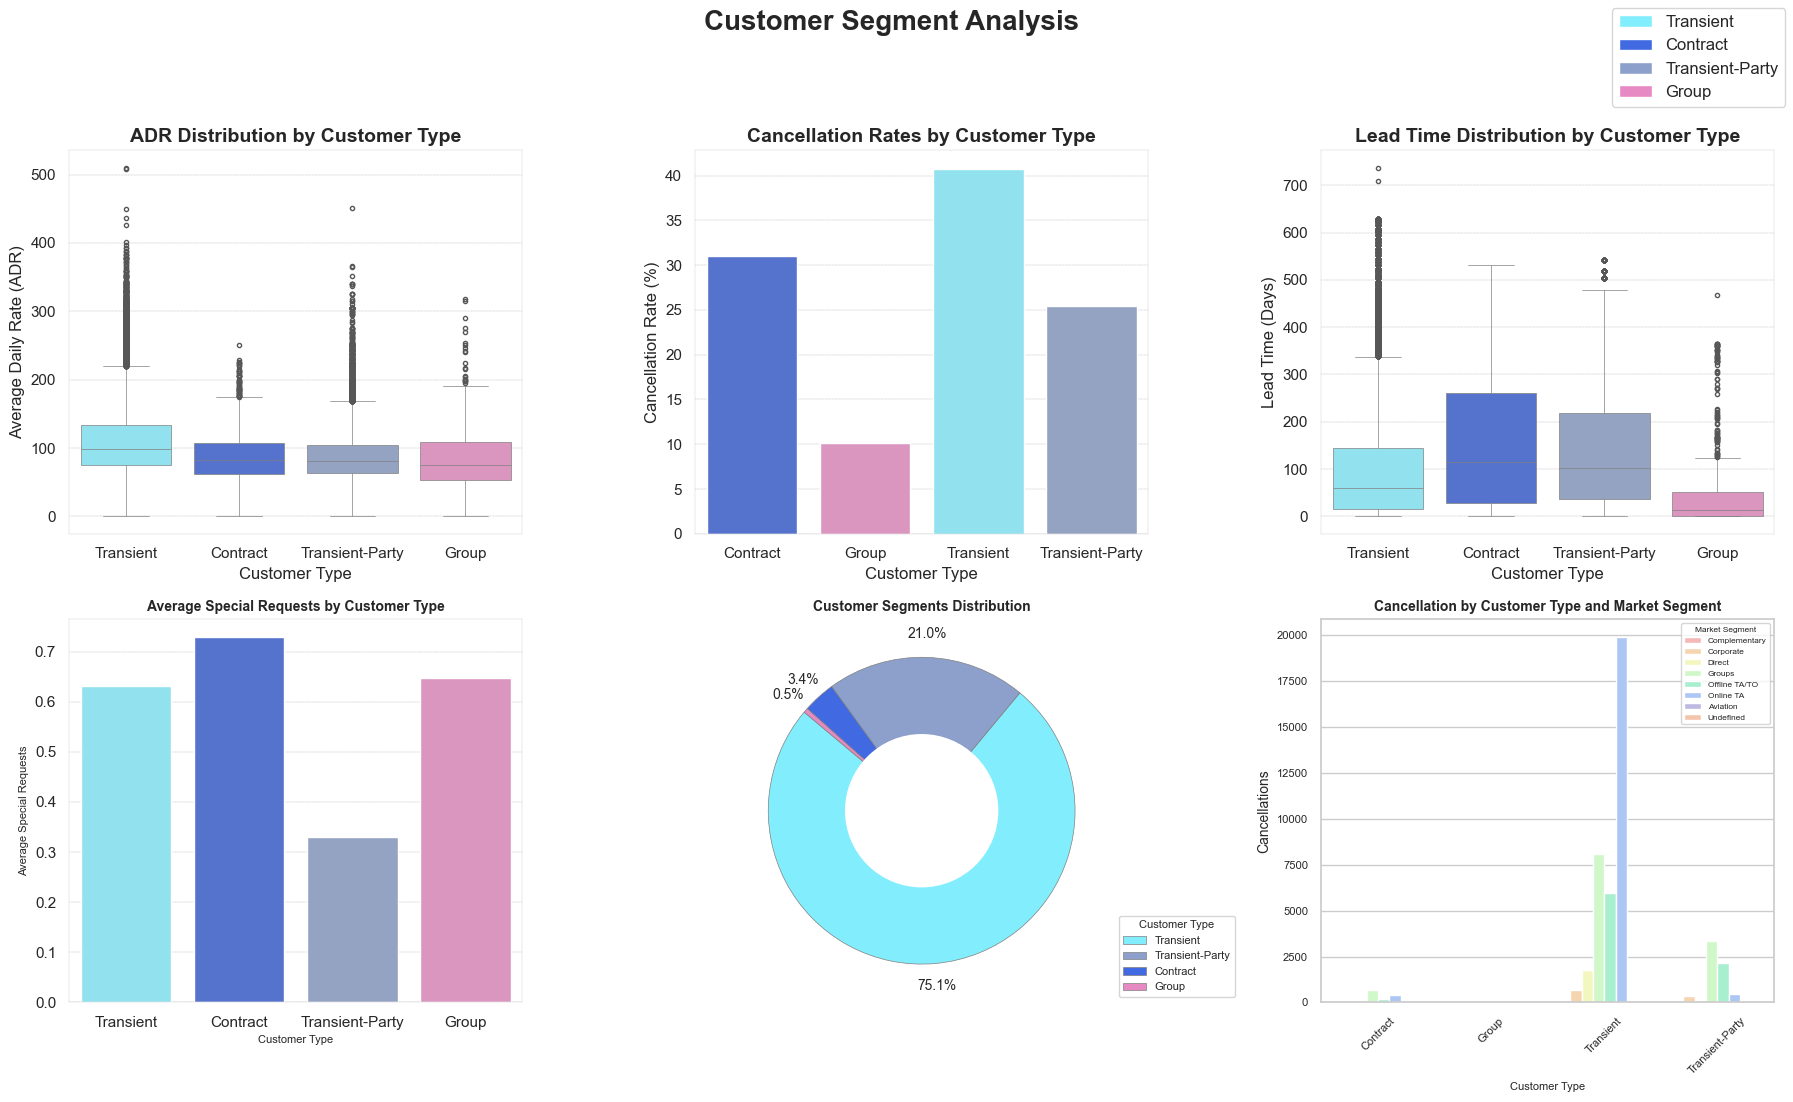

In [25]:
# Set a consistent style and color palette for the plots
sns.set_theme(style="whitegrid", palette="pastel")
# Ensure the color palette matches the unique values of customer_type
unique_customer_types = hotel_reservations_data['customer_type'].unique()
# Transient = '#82EEFD', Contract = '#4169E1', Transient-Party = '#8da0cb', Group = '#e78ac3'
color_palette = {
    'Transient': '#82EEFD',
    'Contract': '#4169E1',
    'Transient-Party': '#8da0cb',
    'Group': '#e78ac3'
}
# Filter the palette to include only the colors for the unique customer types
# color_palette = [color_palette[ct] for ct in unique_customer_types if ct in color_palette]
# Transient = '#82EEFD', Contract = '#4169E1', Transient Party = '#8da0cb', Group = '#e78ac3'
# Set font to Arial
plt.rcParams['font.family'] = 'Arial'

# Create a figure with 3 rows and 2 columns of subplots to fit 5 plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Total of 6 axes, we'll use only 5
axes = axes.flatten()  # Flatten for easy indexing

# Group data by customer_type
customer_type_data = hotel_reservations_data.groupby('customer_type')

# 1. ADR Distribution by Customer Type
sns.boxplot(
    data=hotel_reservations_data,
    x='customer_type',
    y='adr',
    ax=axes[0],
    hue='customer_type',
    palette=color_palette,
    dodge=False,
    boxprops=dict(edgecolor='gray', linewidth=0.5),
    medianprops=dict(color='gray', linewidth=0.5),
    whiskerprops=dict(color='gray', linewidth=0.5),
    capprops=dict(color='gray', linewidth=0.5),
    flierprops=dict(marker='o', color='gray', markersize=3, linestyle='none')
)
axes[0].set_title('ADR Distribution by Customer Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Customer Type', fontsize=12)
axes[0].set_ylabel('Average Daily Rate (ADR)', fontsize=12)
axes[0].legend([], [], frameon=False)

# 2. Cancellation Rates by Customer Type
cancellation_rates = customer_type_data['is_canceled'].mean() * 100
bar_colors = [color_palette[ct] for ct in cancellation_rates.index]
sns.barplot(
    x=cancellation_rates.index,
    y=cancellation_rates.values,
    ax=axes[1],
    hue=cancellation_rates.index,
    palette=bar_colors,
    dodge=False,
    legend=False
)

axes[1].set_title('Cancellation Rates by Customer Type', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Customer Type', fontsize=12)
axes[1].set_ylabel('Cancellation Rate (%)', fontsize=12)

# 3. Lead Time by Customer Type
sns.boxplot(
    data=hotel_reservations_data,
    x='customer_type',
    y='lead_time',
    ax=axes[2],
    hue='customer_type',
    palette=color_palette,
    dodge=False,
    boxprops=dict(edgecolor='gray', linewidth=0.5),
    medianprops=dict(color='gray', linewidth=0.5),
    whiskerprops=dict(color='gray', linewidth=0.5),
    capprops=dict(color='gray', linewidth=0.5),
    flierprops=dict(marker='o', color='gray', markersize=3, linestyle='none')
)
axes[2].set_title('Lead Time Distribution by Customer Type', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Customer Type', fontsize=12)
axes[2].set_ylabel('Lead Time (Days)', fontsize=12)
axes[2].legend([], [], frameon=False)

# 4. Average Special Requests by Customer Type
sns.barplot(
    data=hotel_reservations_data,
    x='customer_type',
    y='total_of_special_requests',
    ax=axes[3],
    hue='customer_type',
    dodge=False,
    palette=color_palette,
    errorbar=None
)
axes[3].set_title('Average Special Requests by Customer Type', fontsize=10, fontweight='bold')
axes[3].set_xlabel('Customer Type', fontsize=8)
axes[3].set_ylabel('Average Special Requests', fontsize=8)
axes[5].tick_params(axis='x', labelsize=8, rotation=45)
axes[5].tick_params(axis='y', labelsize=8)

# 5. Pie Chart - Customer Segments Distribution
customer_segments = hotel_reservations_data['customer_type'].value_counts(normalize=True) * 100
pie_colors = [color_palette[ct] for ct in customer_segments.index]
wedges, texts, autotexts = axes[4].pie(
    customer_segments,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=pie_colors,
    wedgeprops={'edgecolor': 'gray', 'linewidth': 0.5},
    textprops={'fontsize': 10},
    pctdistance=1.15
)
# Add a smaller white circle at the center to reduce the hole size
center_circle = plt.Circle((0, 0), 0.50, color='white', fc='white', linewidth=0)
axes[4].add_artist(center_circle)
axes[4].set_title('Customer Segments Distribution', fontsize=10, fontweight='bold')
# Add legend
axes[4].legend(
    wedges,
    customer_segments.index,
    title='Customer Type',
    loc='lower left',
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=8,
    title_fontsize=8
)

# 6. Cancellations by Customer Type and Market Segment (Grouped Bar Chart)
cancellations_grouped = hotel_reservations_data.groupby(['customer_type', 'market_segment'])['is_canceled'].sum().reset_index()

# Pivot for better plotting with seaborn
sns.barplot(
    data=cancellations_grouped,
    x='customer_type',
    y='is_canceled',
    hue='market_segment',
    ax=axes[5],
    palette=['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bfbcf', '#a0c4ff', '#b9b3e6', '#ffc3a0'],
)

axes[5].set_title('Cancellation by Customer Type and Market Segment', fontsize=10, fontweight='bold')
axes[5].set_xlabel('Customer Type', fontsize=8)
axes[5].set_ylabel('Cancellations', fontsize=10)
axes[5].tick_params(axis='x', labelsize=8, rotation=45)
axes[5].tick_params(axis='y', labelsize=8)
axes[5].legend(title='Market Segment', fontsize=6, title_fontsize=6, loc='best')

# Style all axes
for ax in axes[:-1]:  # Skip the pie chart (axes[4] is okay), and ignore removed one
    ax.spines['top'].set_linewidth(0.3)
    ax.spines['right'].set_linewidth(0.3)
    ax.spines['left'].set_linewidth(0.3)
    ax.spines['bottom'].set_linewidth(0.3)
    ax.grid(axis='y', linestyle='--', linewidth=0.2, color='gray')

handles = [
    Patch(facecolor='#82EEFD', label='Transient'),
    Patch(facecolor='#4169E1', label='Contract'),
    Patch(facecolor='#8da0cb', label='Transient-Party'),
    Patch(facecolor='#e78ac3', label='Group')
]

fig.legend(handles=handles, loc='upper right', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.suptitle('Customer Segment Analysis', fontsize=20, y=1.1, fontweight='bold')
plt.show()

del customer_type_data

**Key Observations**

- The pie chart shows that the majority of customers are Transient (75.1%), followed by Transient-Party (21%), with Contract and Group customers making up a small fraction.

- **ADR Distribution by Customer Type**: Transient customers have the highest variability in ADR, with a wider range and more outliers. Contract customers have the most consistent ADR, while Group customers tend to have lower ADR on average.

- **Cancellation Rates by Customer Type**: Transient customers exhibit the highest cancellation rates, followed by Contract customers. Group and Transient-Party customers have significantly lower cancellation rates.

- **Lead Time Distribution by Customer Type**: Contract customers have the longest lead times, followed by Transient-Party customers. Group customers have the shortest lead times, indicating last-minute bookings.

- **Average Special Requests by Customer Type**: Contract customers make the highest number of special requests on average, followed by Group customers. Transient-Party customers make the fewest special requests.

##### Reserved Room Types

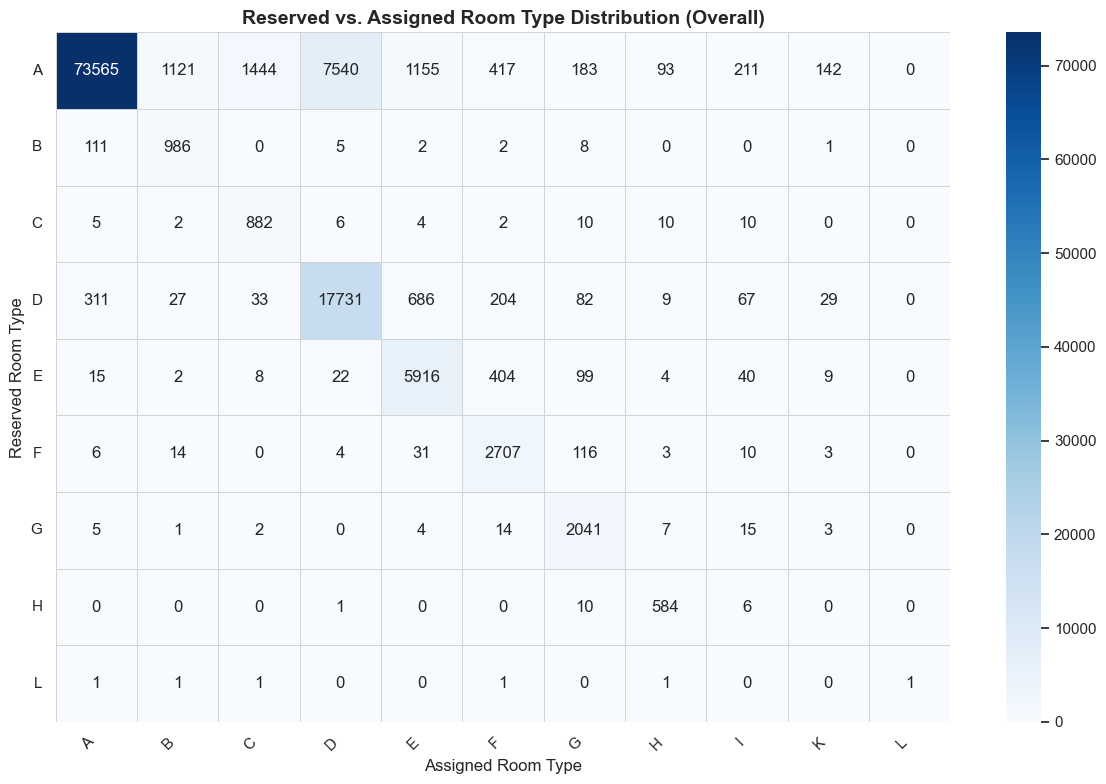

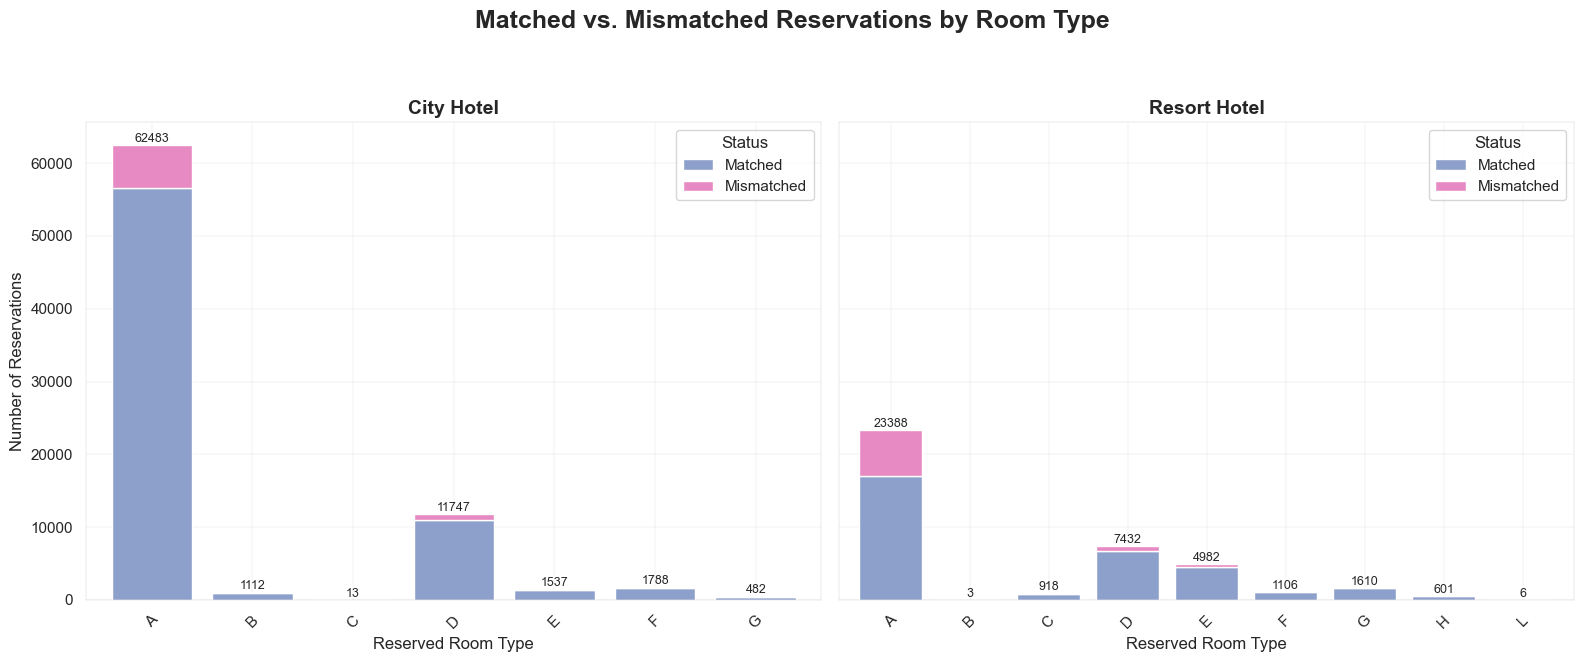


Overall total reservations analyzed: 119208
Overall number of mismatches (reserved != assigned): 14795
Overall percentage of mismatches: 12.41%

Cross-tabulation (Counts of Reserved vs. Assigned Room Types - Overall):
assigned_room_type      A     B     C      D     E     F     G    H    I    K  L
reserved_room_type                                                              
A                   73565  1121  1444   7540  1155   417   183   93  211  142  0
B                     111   986     0      5     2     2     8    0    0    1  0
C                       5     2   882      6     4     2    10   10   10    0  0
D                     311    27    33  17731   686   204    82    9   67   29  0
E                      15     2     8     22  5916   404    99    4   40    9  0
F                       6    14     0      4    31  2707   116    3   10    3  0
G                       5     1     2      0     4    14  2041    7   15    3  0
H                       0     0     0      1     0  

In [26]:

df = hotel_reservations_data.copy()

# --- Set Plot Styles (derived from notebook context) ---
plot_style = 'whitegrid'
palette_name = 'pastel' # General theme palette name
context = 'notebook'
font_family = 'Arial' # Font identified from notebook context
heatmap_cmap = 'Blues'  # Alternatives include 'viridis', 'plasma', 'cividis', 'magma', 'inferno', 'cubehelix', etc. # Colormap for the heatmap

# Apply theme and font settings
sns.set_theme(style=plot_style, palette=palette_name, context=context)
plt.rcParams['font.family'] = font_family

# Ensure columns are string type for accurate comparison
df['reserved_room_type'] = df['reserved_room_type'].astype(str)
df['assigned_room_type'] = df['assigned_room_type'].astype(str)

# --- Part 1: Heatmap of Reserved vs Assigned (Overall) ---
# (Keeping the heatmap code as it provides overall context)
mismatch_filter_overall = df['reserved_room_type'] != df['assigned_room_type']
mismatches_count_overall = mismatch_filter_overall.sum()
total_reservations_overall = len(df)
mismatch_percentage_overall = (mismatches_count_overall / total_reservations_overall) * 100 if total_reservations_overall > 0 else 0

room_type_crosstab = pd.crosstab(df['reserved_room_type'], df['assigned_room_type'])

plt.figure(figsize=(12, 8))
sns.heatmap(
    room_type_crosstab,
    annot=True,
    fmt="d",
    cmap=heatmap_cmap,
    linewidths=.5,
    linecolor='lightgrey'
)
plt.title('Reserved vs. Assigned Room Type Distribution (Overall)', fontsize=14, fontweight='bold')
plt.xlabel('Assigned Room Type', fontsize=12)
plt.ylabel('Reserved Room Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate mismatch flag (1=Mismatch, 0=Match)
df['mismatch_flag'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)

# Group data to get counts
room_counts = df.groupby(['hotel_type', 'reserved_room_type', 'mismatch_flag']).size().unstack(fill_value=0)
room_counts.columns = ['Matched', 'Mismatched'] # Rename columns based on mismatch_flag (0, 1)
room_counts['Total'] = room_counts['Matched'] + room_counts['Mismatched']
room_counts = room_counts.reset_index()

# Sort by reserved_room_type for consistent plot order
room_counts = room_counts.sort_values('reserved_room_type')

# Get unique hotel types for faceting
hotel_types = room_counts['hotel_type'].unique()

# Set a consistent style and color palette for the plots
sns.set_theme(style="whitegrid", palette="pastel")
color_palette = ['#8da0cb', '#e78ac3']

# Create subplots - one for each hotel type
fig, axes = plt.subplots(1, len(hotel_types), figsize=(8 * len(hotel_types), 6), sharey=True)
if len(hotel_types) == 1:  # Handle case with only one hotel type
    axes = [axes]

# Generate stacked bar plot for each hotel type
for i, hotel in enumerate(hotel_types):
    ax = axes[i]
    # Filter data for the current hotel type
    data_subset = room_counts[room_counts['hotel_type'] == hotel].set_index('reserved_room_type')

    # Plot stacked bars using pandas plotting
    data_subset[['Matched', 'Mismatched']].plot(
        kind='bar',
        stacked=True,
        ax=ax,
        color=color_palette,
        width=0.8  # Adjust bar width if needed
    )

    # --- Add Annotations (Total Count on top) ---
    for idx, total in enumerate(data_subset['Total']):
        ax.text(idx, total, f'{total}', ha='center', va='bottom', fontsize=9)

    ax.set_title(f'{hotel} Hotel', fontsize=14, fontweight='bold')
    ax.set_xlabel('Reserved Room Type', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Status')

# Common Y-label
axes[0].set_ylabel('Number of Reservations', fontsize=12)

# Style all axes
for ax in axes:
    ax.spines['top'].set_linewidth(0.3)
    ax.spines['right'].set_linewidth(0.3)
    ax.spines['left'].set_linewidth(0.3)
    ax.spines['bottom'].set_linewidth(0.3)
    ax.grid(axis='both', linestyle='--', linewidth=0.1, color='gray')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout
plt.suptitle('Matched vs. Mismatched Reservations by Room Type', fontsize=18, fontweight='bold', y=1.1)
plt.show()

# Clean up the temporary column
if 'mismatch_flag' in df.columns:
    df.drop(columns=['mismatch_flag'], inplace=True)

print(f"\nOverall total reservations analyzed: {total_reservations_overall}")
print(f"Overall number of mismatches (reserved != assigned): {mismatches_count_overall}")
print(f"Overall percentage of mismatches: {mismatch_percentage_overall:.2f}%")
print("\nCross-tabulation (Counts of Reserved vs. Assigned Room Types - Overall):")
print(room_type_crosstab.to_string())
# Display the summary table
print("\nAnalysis Summary (Matched vs Mismatched Counts by Room Type and Hotel):")
print(room_counts[['hotel_type', 'reserved_room_type', 'Matched', 'Mismatched', 'Total']].to_string())

del df

**Key Observations**

- **Overall Mismatch**: Approximately 12.4% of reservations have a mismatch between the reserved and assigned room type.

- **Room Type 'A'**: This is the most commonly reserved room type, but it has a notable mismatch rate. It is frequently substituted with type 'D'.

- **Hotel Type Differences (Type 'A')**: The mismatch rate for reserved room type 'A' is significantly higher in Resort hotels (~27%) compared to City hotels (~9.5%).

- **High Match Rates**: Guests reserving room types 'B', 'C', 'F', 'G', or 'H' are very likely to receive the specific room type they reserved.

- **Hotel-Specific Room Types**: Some room types show strong associations with specific hotel categories. For example, type 'B' is primarily found in City hotels, while types 'H' and 'L' are almost exclusively in Resort hotels.

##### Country of Origin Influence

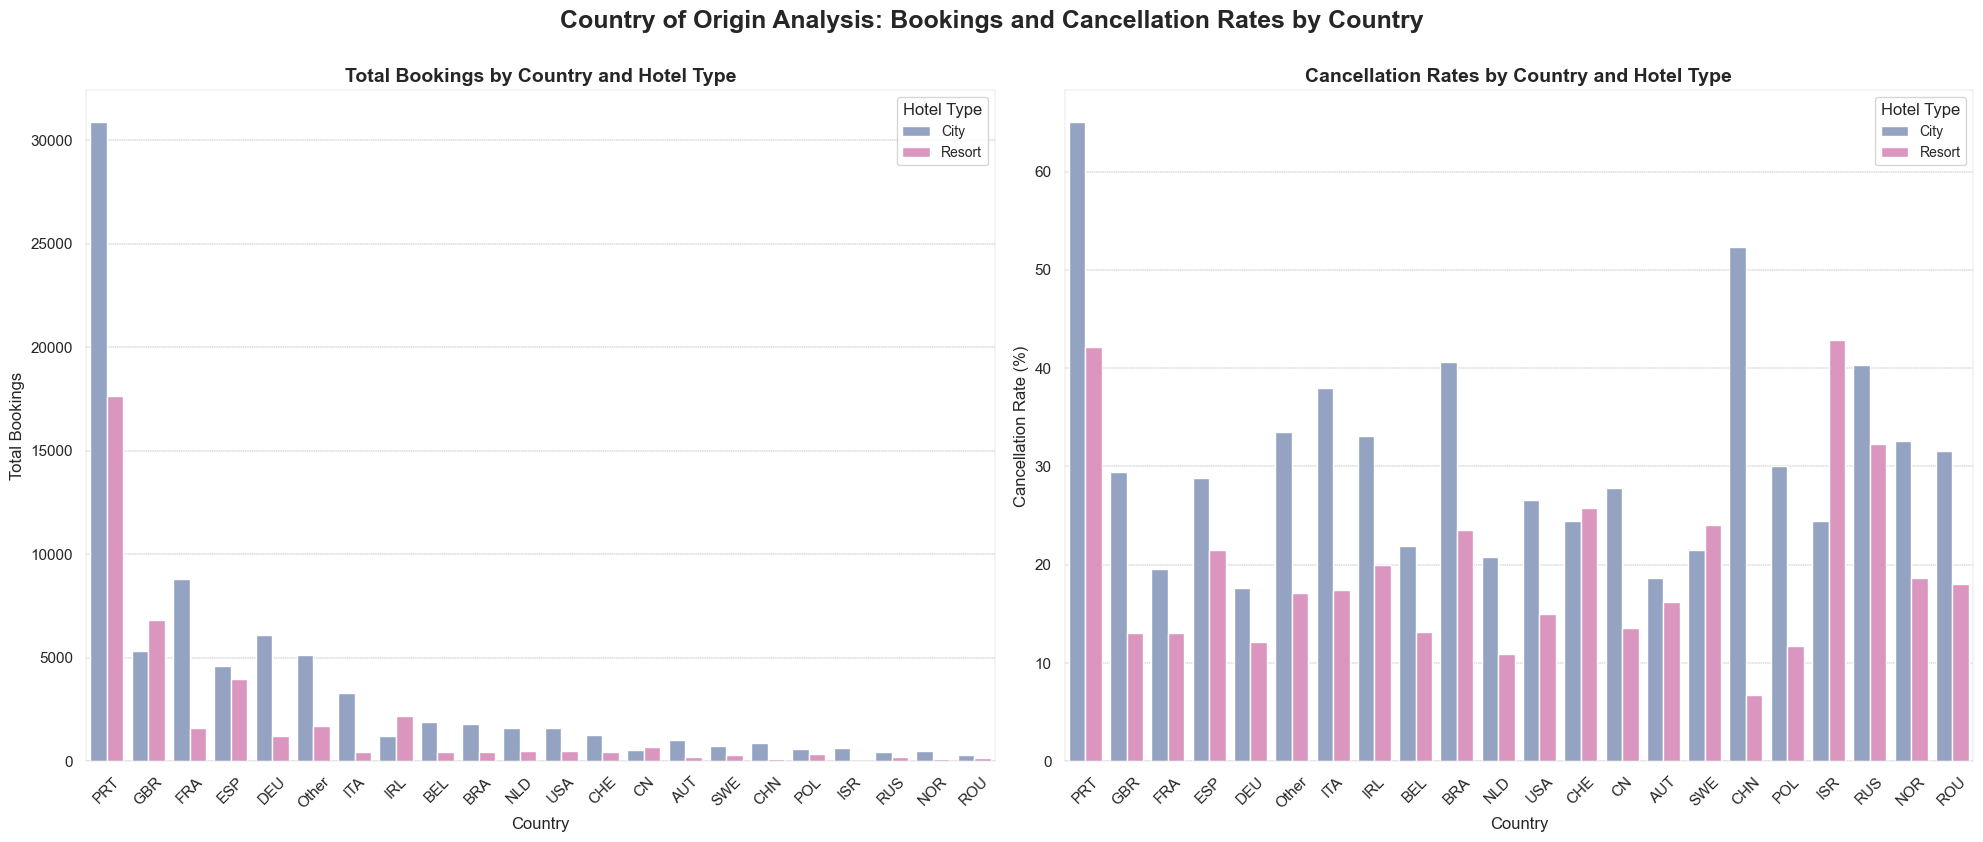


Data for Geographical Analysis Plots:
   country hotel_type  total_bookings  cancellation_rate
0      AUT       City            1053          18.613485
1      AUT     Resort             210          16.190476
2      BEL       City            1894          21.911299
3      BEL     Resort             448          13.169643
4      BRA       City            1792          40.680804
5      BRA     Resort             430          23.488372
6      CHE       City            1291          24.477149
7      CHE     Resort             435          25.747126
8      CHN       City             865          52.369942
9      CHN     Resort             134           6.716418
10      CN       City             569          27.768014
11      CN     Resort             710          13.521127
12     DEU       City            6082          17.625781
13     DEU     Resort            1203          12.136326
14     ESP       City            4604          28.801043
15     ESP     Resort            3956          21

In [27]:
# Define the dataset
data = hotel_reservations_data.copy()

# Set a consistent style and color palette for the plots
sns.set_theme(style="whitegrid", palette="pastel")
color_palette = ['#8da0cb', '#e78ac3']

# Group low-frequency countries into "Other"
country_threshold = 500  # Minimum frequency to keep a country as-is
if 'country' in data.columns:
    country_counts = data['country'].value_counts()
    data['country'] = data['country'].apply(lambda x: x if country_counts[x] >= country_threshold else 'Other')

# Calculate total bookings and cancellation rates by country and hotel type
country_analysis = data.groupby(['country', 'hotel_type']).agg(
    total_bookings=('is_canceled', 'count'),
    cancellation_rate=('is_canceled', 'mean')
).reset_index()
country_analysis['cancellation_rate'] *= 100  # Convert to percentage

# Sort countries by total bookings for better visualization
top_countries = country_analysis.groupby('country')['total_bookings'].sum().sort_values(ascending=False).index
country_analysis['country'] = pd.Categorical(country_analysis['country'], categories=top_countries, ordered=True)

# Create subplots for total bookings and cancellation rates
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=False)

# Plot total bookings by country and hotel type
sns.barplot(
    data=country_analysis,
    x='country',
    y='total_bookings',
    hue='hotel_type',
    palette=color_palette,
    ax=axes[0]
)
axes[0].set_title('Total Bookings by Country and Hotel Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Country', fontsize=12)
axes[0].set_ylabel('Total Bookings', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Hotel Type', fontsize=10)
axes[0].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Plot cancellation rates by country and hotel type
sns.barplot(
    data=country_analysis,
    x='country',
    y='cancellation_rate',
    hue='hotel_type',
    palette=color_palette,
    ax=axes[1]
)
axes[1].set_title('Cancellation Rates by Country and Hotel Type', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Country', fontsize=12)
axes[1].set_ylabel('Cancellation Rate (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Hotel Type', fontsize=10)
axes[1].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Style all axes
for ax in axes:
    ax.spines['top'].set_linewidth(0.3)
    ax.spines['right'].set_linewidth(0.3)
    ax.spines['left'].set_linewidth(0.3)
    ax.spines['bottom'].set_linewidth(0.3)
    ax.grid(axis='y', linestyle='--', linewidth=0.3, color='gray')

# Adjust layout
plt.tight_layout()
plt.suptitle('Country of Origin Analysis: Bookings and Cancellation Rates by Country', fontsize=18, y=1.05, fontweight='bold')
plt.show()

# Display the data table used for the plots
print("\nData for Geographical Analysis Plots:")
print(country_analysis.to_string())

del data

**Key Observations**

- **Top Booking Countries**: Portugal (PRT) leads in booking volume, especially for City hotels, likely due to its status as the host country. Other significant contributors include the UK (GBR), France (FRA), Spain (ESP), and Germany (DEU).

- **City vs. Resort Volume**: Most nationalities book City hotels more often, but guests from the UK (GBR) notably book Resort hotels more frequently.

- **Highest Cancellation Rates (City)**: Guests originating from Portugal (PRT) show an extremely high cancellation rate (~65%) when booking City hotels. Guests from China (CHN ~52%), Brazil (BRA ~41%), Italy (ITA ~38%), and Russia (RUS ~40%) also have high cancellation rates for City hotel bookings.

- **Highest Cancellation Rates (Resort)**: Guests from Portugal (PRT) also have the highest cancellation rate for Resort hotels (~42%), followed by guests from Israel (ISR ~43%, low volume) and Russia (RUS ~32%).

- **Host Country Behavior**: The high cancellation rates in the host country (Portugal) could potentially be explained by customer behavior. Foreign nationals may prefer trusted places with good reviews over shopping for lower prices, aiming for a hassle-free experience. This is a just a hypothesis but lacks direct evidence.

- **General Trend (City vs. Resort)**: For most countries analyzed, cancellation rates tend to be higher in City hotels compared to Resort hotels.

- **Notable Low Resort Cancellations**: Several countries show relatively low cancellation rates for Resort hotels (e.g., below 15% for CHN, DEU, FRA, GBR, NLD, POL).


##### Group or Family Demographics and Behavior

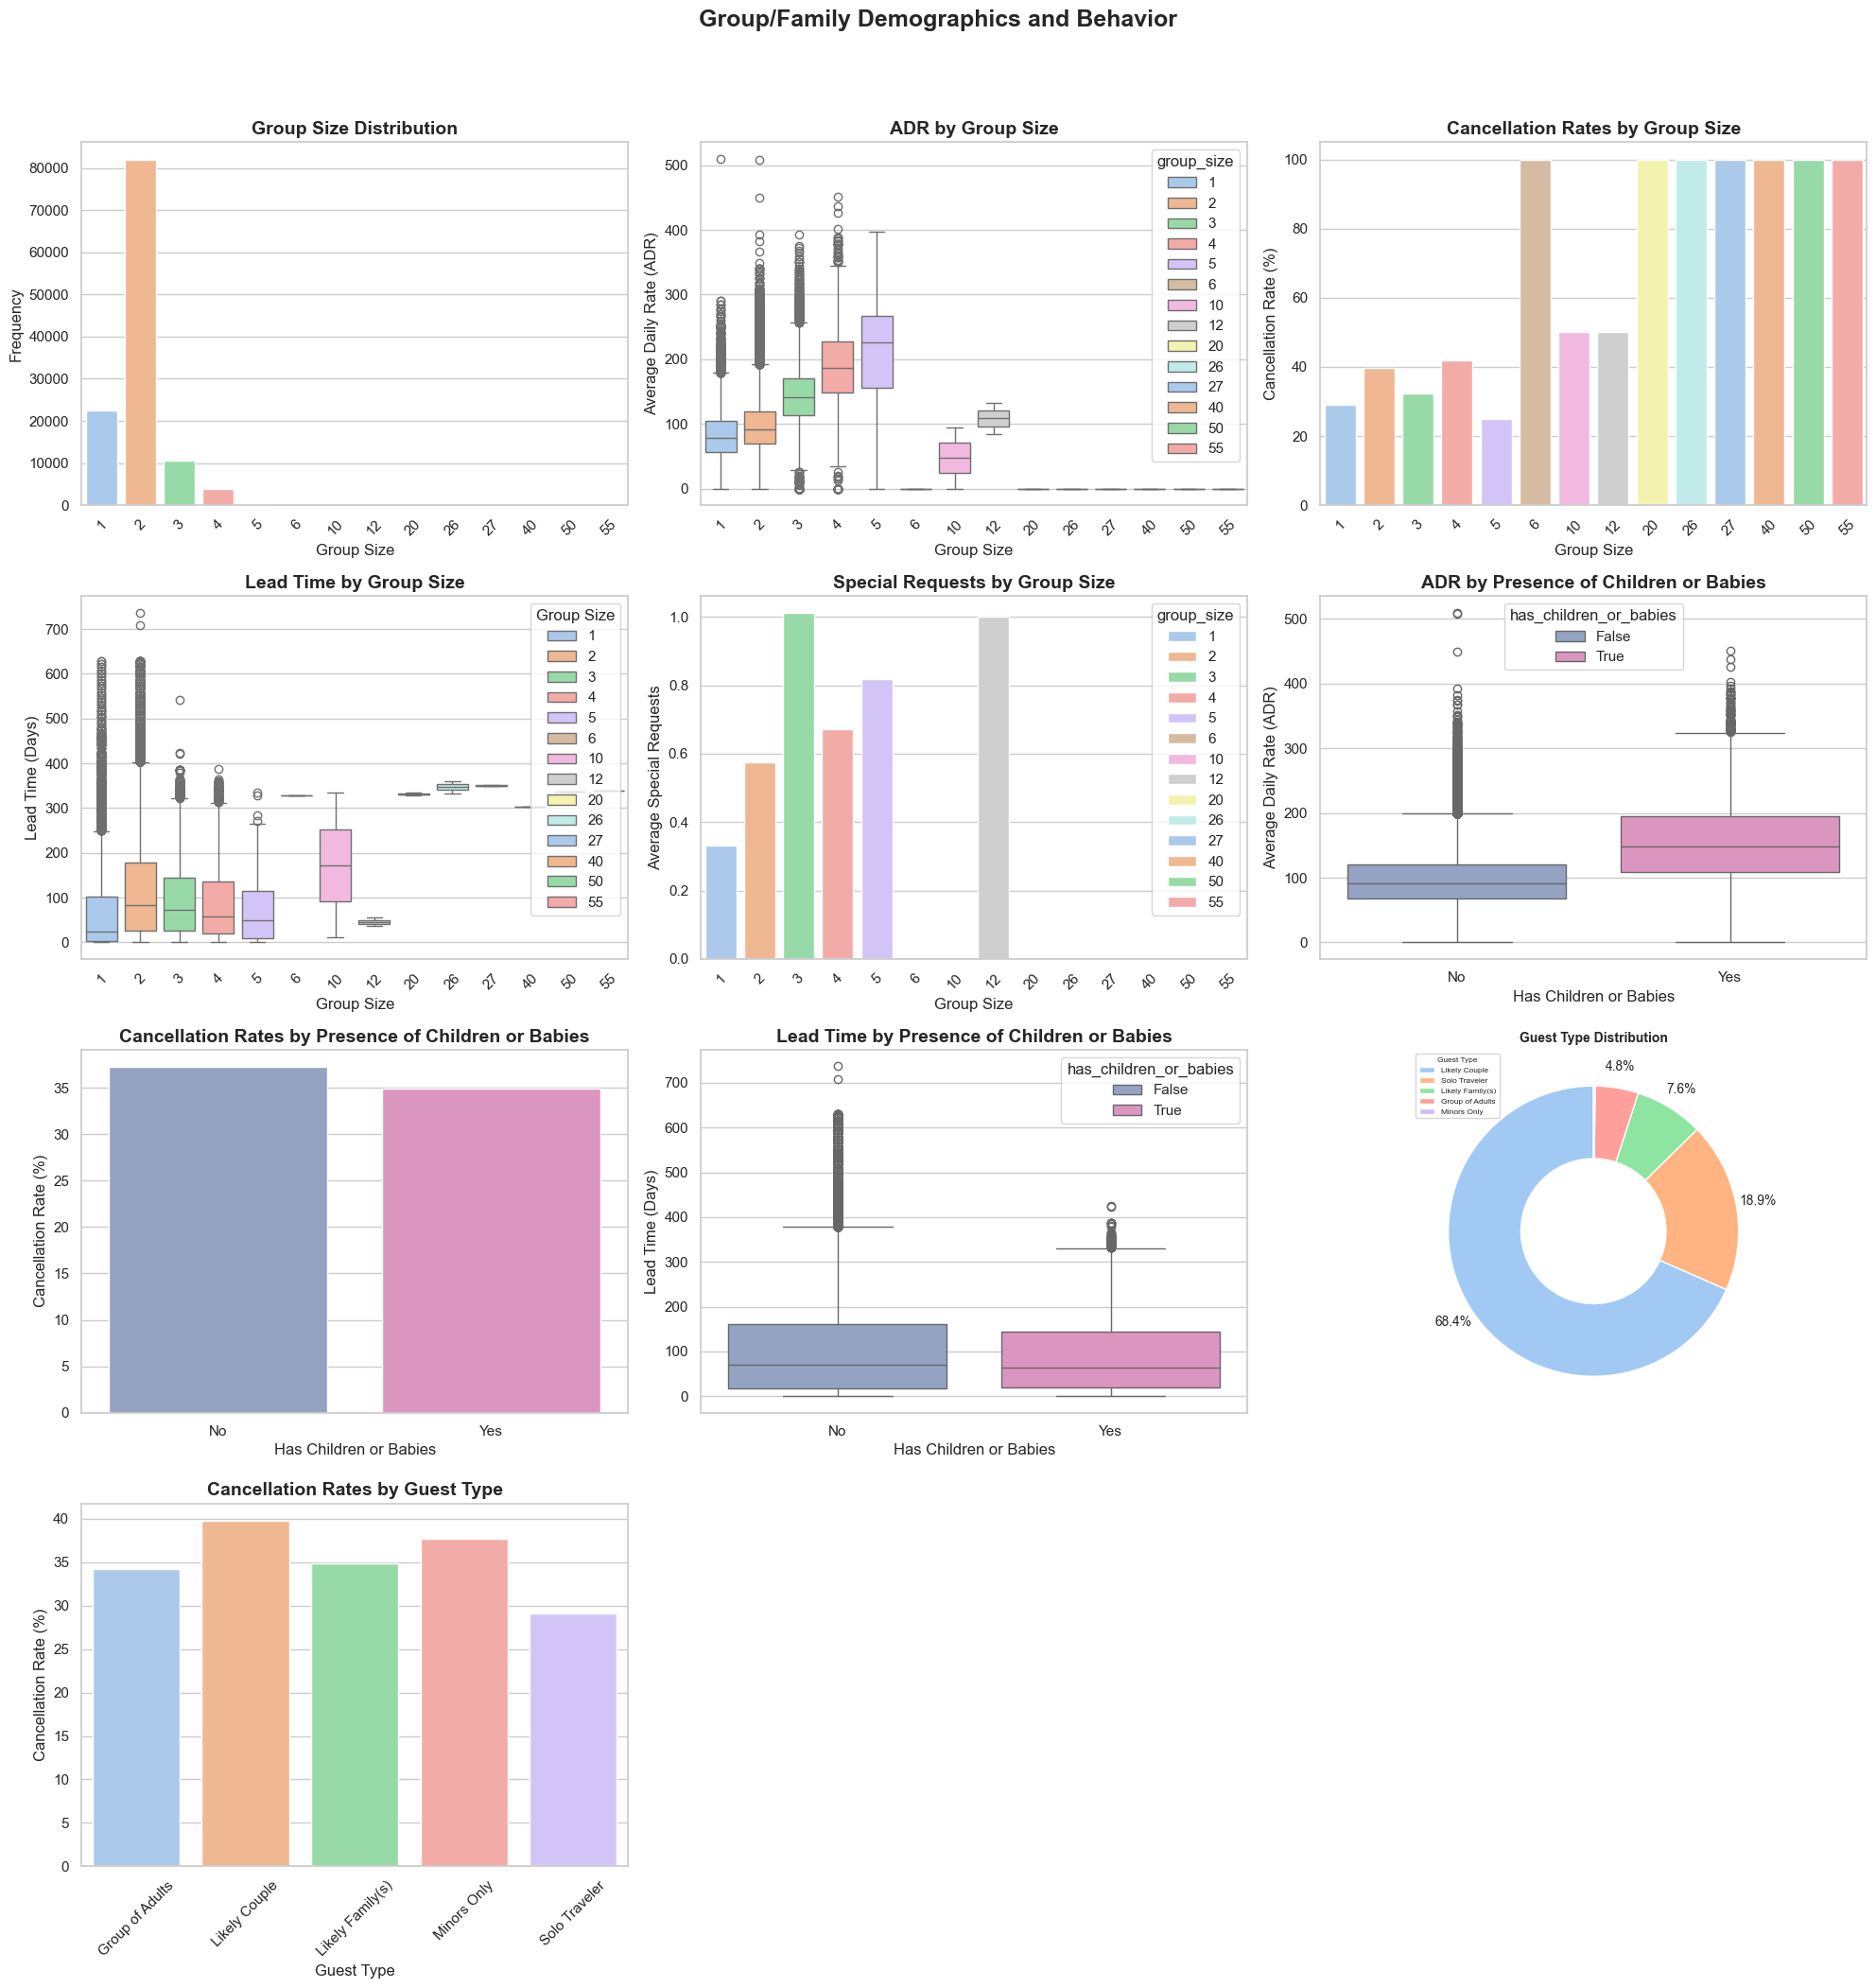


10. Guest Type Distribution:
guest_type
Likely Couple       81558
Solo Traveler       22577
Likely Family(s)     9109
Group of Adults      5741
Minors Only           223
Name: count, dtype: int64

11. Cancellation Rates by Guest Type:
guest_type
Group of Adults     34.157812
Likely Couple       39.754531
Likely Family(s)    34.855637
Minors Only         37.668161
Solo Traveler       29.033973
Name: is_canceled, dtype: float64


In [28]:
# Define the dataset
data = hotel_reservations_data.copy()

# Add a new column for group size
data['group_size'] = (
    data['adults'] +
    data['children'] +
    data['babies']
)

# Add a flag for bookings with children or babies
data['has_children_or_babies'] = (
    (data['children'] > 0) | (data['babies'] > 0)
)

# Categorize guest type
data['guest_type'] = data.apply(hlp.categorize_guest, axis=1)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 20))  # 4 rows, 3 columns
axes = axes.flatten()  # Flatten the axes array for easier indexing

# 1. Group Size Distribution
group_size_counts = data['group_size'].value_counts().sort_index()
sns.countplot(
    data=data,
    x='group_size',
    hue='group_size',
    ax=axes[0],
    palette='pastel',
    legend=False
)
axes[0].set_title('Group Size Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Group Size', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# 2. ADR by Group Size
sns.boxplot(
    data=data,
    x='group_size',
    hue='group_size',
    y='adr',
    ax=axes[1],
    palette='pastel'
)
axes[1].set_title('ADR by Group Size', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Group Size', fontsize=12)
axes[1].set_ylabel('Average Daily Rate (ADR)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# 3. Cancellation Rates by Group Size
cancellation_rates = data.groupby('group_size')['is_canceled'].mean() * 100
sns.barplot(
    x=cancellation_rates.index,
    y=cancellation_rates.values,
    hue=cancellation_rates.index,
    ax=axes[2],
    palette='pastel',
    legend=False,
    errorbar=None
)
axes[2].set_title('Cancellation Rates by Group Size', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Group Size', fontsize=12)
axes[2].set_ylabel('Cancellation Rate (%)', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)

# 4. Lead Time by Group Size
sns.boxplot(
    data=data,
    x='group_size',
    y='lead_time',
    hue='group_size',
    ax=axes[3],
    palette='pastel'
)
axes[3].set_title('Lead Time by Group Size', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Group Size', fontsize=12)
axes[3].set_ylabel('Lead Time (Days)', fontsize=12)
axes[3].tick_params(axis='x', rotation=45)
axes[3].legend(loc='upper right', title='Group Size')  # Add legend with title

# 5. Special Requests by Group Size
sns.barplot(
    data=data,
    x='group_size',
    y='total_of_special_requests',
    hue='group_size',
    ax=axes[4],
    palette='pastel',
    errorbar=None
)

axes[4].set_title('Special Requests by Group Size', fontsize=14, fontweight='bold')
axes[4].set_xlabel('Group Size', fontsize=12)
axes[4].set_ylabel('Average Special Requests', fontsize=12)
axes[4].tick_params(axis='x', rotation=45)

# 6. ADR by Presence of Children or Babies
sns.boxplot(
    data=data,
    x='has_children_or_babies',
    y='adr',
    hue='has_children_or_babies',
    ax=axes[5],
    palette=['#8da0cb', '#e78ac3']
)
axes[5].set_title('ADR by Presence of Children or Babies', fontsize=14, fontweight='bold')
axes[5].set_xlabel('Has Children or Babies', fontsize=12)
axes[5].set_ylabel('Average Daily Rate (ADR)', fontsize=12)
axes[5].set_xticks([0, 1])
axes[5].set_xticklabels(['No', 'Yes'])

# 7. Cancellation Rates by Presence of Children or Babies
cancellation_rates_children = data.groupby('has_children_or_babies')['is_canceled'].mean() * 100
sns.barplot(
    x=cancellation_rates_children.index,
    y=cancellation_rates_children.values,
    hue=cancellation_rates_children.index,
    ax=axes[6],
    palette=['#8da0cb', '#e78ac3'],
    legend=False,
    errorbar=None
)
axes[6].set_title('Cancellation Rates by Presence of Children or Babies', fontsize=14, fontweight='bold')
axes[6].set_xlabel('Has Children or Babies', fontsize=12)
axes[6].set_ylabel('Cancellation Rate (%)', fontsize=12)
axes[6].set_xticks([0, 1])
axes[6].set_xticklabels(['No', 'Yes'])

# 8. Lead Time by Presence of Children or Babies
sns.boxplot(
    data=data,
    x='has_children_or_babies',
    y='lead_time',
    hue='has_children_or_babies',
    ax=axes[7],
    palette=['#8da0cb', '#e78ac3']
)
axes[7].set_title('Lead Time by Presence of Children or Babies', fontsize=14, fontweight='bold')
axes[7].set_xlabel('Has Children or Babies', fontsize=12)
axes[7].set_ylabel('Lead Time (Days)', fontsize=12)
axes[7].set_xticks([0, 1])
axes[7].set_xticklabels(['No', 'Yes'])

# 9. Donut Chart for Guest Type
guest_type_counts = data['guest_type'].value_counts()

# Adjust label positions to avoid overlap
# for text in texts:
#     text.set_horizontalalignment('center')  # Center-align labels

# Create a custom autopct function using closure to track index
market_segment_counts = data['guest_type'].value_counts()
market_segment_labels = market_segment_counts.index.tolist()
market_segment_sizes = market_segment_counts.values.tolist()

def make_autopct(labels_to_hide):
    def autopct(pct):
        index = autopct.counter
        label = market_segment_labels[index]
        autopct.counter += 1
        if label in labels_to_hide:
            return ''
        return f'{pct:.1f}%'
    autopct.counter = 0
    return autopct
# Use the function
autopct_func = make_autopct(['Minors Only'])

# Create the donut chart with a smaller hole size
wedges, texts, autotexts = axes[8].pie(
    guest_type_counts,
    labels=None,
    autopct=autopct_func,
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops={'width': 0.5, 'edgecolor': 'w'},  # Reduced width for a smaller hole
    textprops={'fontsize': 10},  # Adjust font size for better readability
    pctdistance=1.15  # Adjust distance of percentage labels
)

# Add a legend instead of labels if there are too many categories
axes[8].legend(
    guest_type_counts.index,
    title="Guest Type",
    fontsize=6,
    title_fontsize=6,
    loc='upper left'
)

axes[8].set_title('Guest Type Distribution', fontsize=10, fontweight='bold')
# axes[5].legend(title='Market Segment', fontsize=6, title_fontsize=6, loc='lower right')

# 10. Cancellation Rates by Guest Type
cancellation_by_guest_type = data.groupby('guest_type')['is_canceled'].mean() * 100
sns.barplot(
    x=cancellation_by_guest_type.index,
    y=cancellation_by_guest_type.values,
    ax=axes[9],
    hue=cancellation_by_guest_type.index,
    palette='pastel',
    errorbar=None
)
axes[9].set_title('Cancellation Rates by Guest Type', fontsize=14, fontweight='bold')
axes[9].set_xlabel('Guest Type', fontsize=12)
axes[9].set_ylabel('Cancellation Rate (%)', fontsize=12)
axes[9].tick_params(axis='x', rotation=45)

# Hide the 12th subplot if you only have 11 plots
if len(axes) > 10:
    for ax in axes[10:]:
        ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.suptitle('Group/Family Demographics and Behavior', fontsize=18, fontweight='bold', y=1.05)
plt.show()

print("\n10. Guest Type Distribution:")
print(guest_type_counts)
print("\n11. Cancellation Rates by Guest Type:")
print(cancellation_by_guest_type)

del data

**Key Observations**

- **Group Size Distribution**  
    - **Observation**: The majority of bookings are for group sizes of 1 (22,581 bookings) and 2 (82,049 bookings), which dominate the dataset. Larger group sizes (e.g., 5 or more) are rare, with only a handful of bookings for sizes like 10, 20, or 50.  
    - **Insight**: Hotels primarily cater to individuals and small groups (1–2 people). Larger group bookings are infrequent and may require special handling or targeted marketing.

- **ADR (Average Daily Rate) by Group Size**  
    - **Observation**: ADR increases with group size, peaking for smaller groups (1–4 people). However, for extremely large groups (e.g., 10+), ADR tends to drop significantly. Group sizes of 1–4 have higher variability in ADR, while larger groups show more consistent (and lower) ADR values.  
    - **Insight**: Smaller groups or individuals are likely paying higher rates, possibly due to premium room types or fewer discounts. Larger groups may benefit from group discounts or bulk booking rates, leading to lower ADR.

- **Cancellation Rates by Group Size**  
    - **Observation**: Cancellation rates are highest for group sizes of 4 (41.89%) and 2 (39.69%), while group size 1 has a lower cancellation rate (29.03%). Extremely large groups (e.g., 20, 26, 40, 50) show 100% cancellation rates, but these are likely outliers due to very low booking counts.  
    - **Insight**: Group size 2 is the most common and also has a high cancellation rate, indicating a need for targeted strategies to reduce cancellations for this segment. Larger groups may require stricter cancellation policies or better communication to reduce cancellations.

- **Lead Time by Group Size**  
    - **Observation**: Lead time increases with group size, with larger groups booking further in advance. Smaller groups (1–2 people) tend to book closer to the check-in date, while larger groups (e.g., 10+) have significantly longer lead times.  
    - **Insight**: Larger groups require more planning and coordination, leading to longer lead times. Hotels can use this information to offer early-bird discounts or promotions to secure bookings for larger groups.

- **Special Requests by Group Size**  
    - **Observation**: Special requests increase with group size, peaking for group sizes of 3 (1.01 requests on average). Larger groups (e.g., 10+) have fewer or no special requests, likely due to their low booking volume or standardized group arrangements.  
    - **Insight**: Group sizes of 3–5 are more likely to make special requests, which may require additional operational planning. Hotels can use this data to anticipate and prepare for specific needs of mid-sized groups.

- **ADR by Presence of Children or Babies**  
    - **Observation**: Bookings with children or babies have a significantly higher ADR (mean: 154.43) compared to those without (mean: 97.47). ADR variability is also higher for bookings with children or babies, indicating a wider range of room types or services being utilized.  
    - **Insight**: Families with children or babies are likely booking larger rooms or premium services, leading to higher ADR. Hotels can target this segment with family-friendly packages or promotions to maximize revenue.

- **Cancellation Rates by Presence of Children or Babies**  
    - **Observation**: Cancellation rates are slightly lower for bookings with children or babies (34.92%) compared to those without (37.26%).  
    - **Insight**: Families with children or babies are less likely to cancel, possibly due to more deliberate planning or fewer last-minute changes. Hotels can focus on retaining this segment by offering flexible policies or incentives.

- **Lead Time by Presence of Children or Babies**  
    - **Observation**: Lead times are longer for bookings with children or babies, indicating more advanced planning.  
    - **Insight**: Families plan their trips further in advance, providing hotels with an opportunity to secure these bookings early through targeted promotions.

- **Special Requests by Presence of Children or Babies**  
    - **Observation**: Bookings with children or babies have a higher average number of special requests (0.93) compared to those without (0.54).  
    - **Insight**: Families are more likely to request additional services (e.g., cribs, extra beds, or specific room features). Hotels can use this data to improve customer satisfaction by proactively addressing these needs.

- **Guest Type Distribution**  
    - **Observation**: The donut chart shows that the majority of bookings are made by "Likely Couples" (48.5%), followed by "Solo Travelers" (24.9%) and "Likely Families" (19.1%). "Group of Adults" and "Minors Only" make up a smaller fraction of bookings.  
    - **Insight**: Couples dominate the booking landscape, indicating a strong preference for double-occupancy rooms. Families and solo travelers also represent significant segments, requiring tailored offerings such as family packages or single-occupancy discounts.

- **Cancellation Rates by Guest Type**  
    - **Observation**: "Likely Couples" and "Group of Adults" exhibit the highest cancellation rates (~40%), while "Likely Families" and "Solo Travelers" have lower cancellation rates (~30%). "Minors Only" bookings show a cancellation rate of ~35%, but this segment is very small.  
    - **Insight**: Couples and groups of adults are more prone to cancellations, possibly due to flexible travel plans or group dynamics. Families and solo travelers are more reliable, likely due to deliberate planning or fewer last-minute changes. Hotels can focus on retention strategies for couples and groups, such as offering incentives for non-refundable bookings.

**Key Takeaways**  
- **Small Groups Dominate**: Most bookings are for 1–2 people, but group sizes of 3–4 show higher ADR and special requests, making them a valuable segment.  
- **Families with Children/Babies**: Families are less likely to cancel, book further in advance, and have higher ADR, making them a profitable and reliable customer segment.  
- **Couples and Groups**: Couples dominate the booking landscape but exhibit higher cancellation rates, requiring targeted retention strategies.  
- **Operational Planning**: Special requests and longer lead times for families and mid-sized groups require better resource allocation and planning.

##### Seasonal Trends

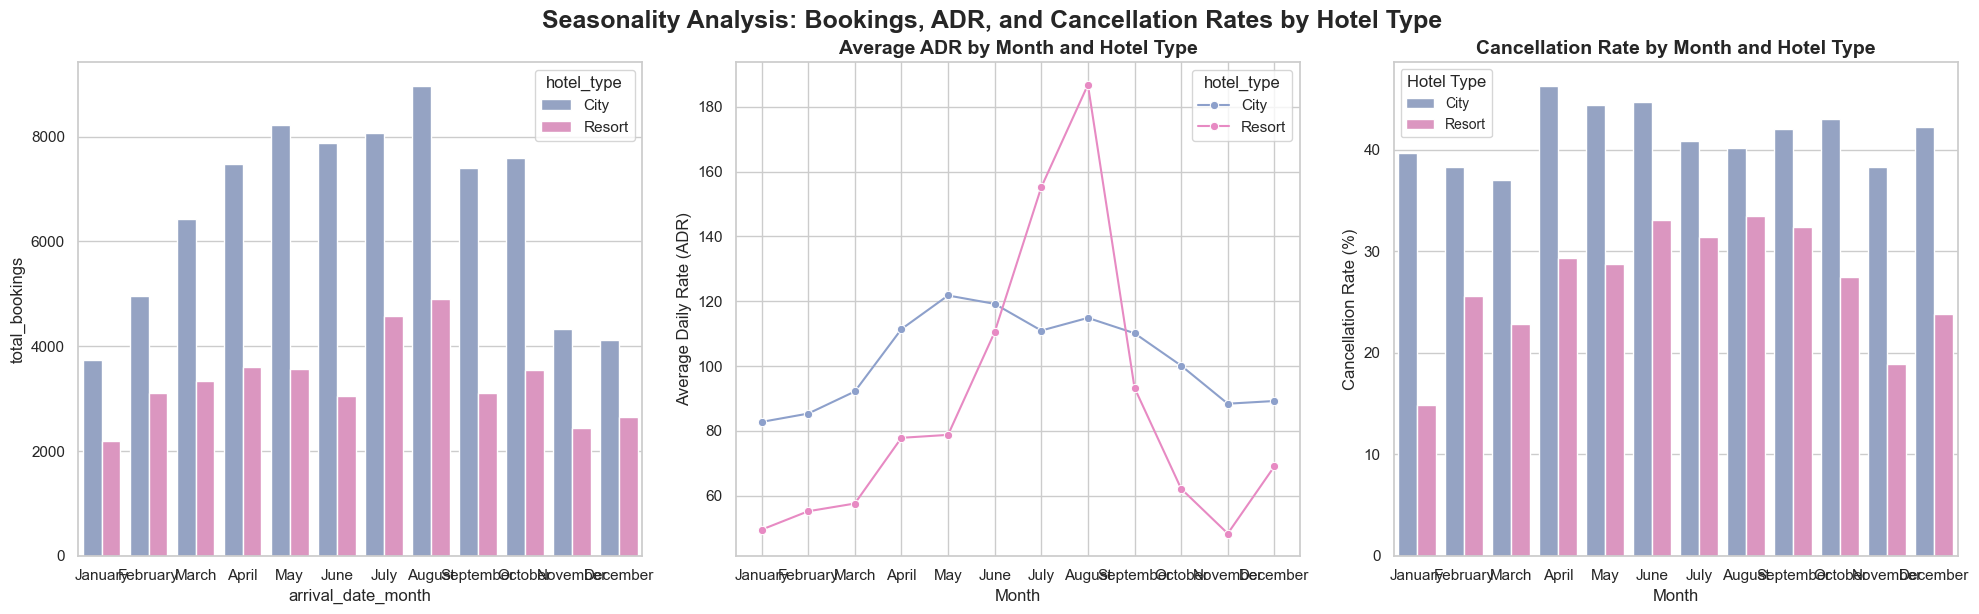

Underlying data for all subplots:
   arrival_date_month hotel_type  total_bookings  average_adr  \
0             January       City            3730    82.754477   
1             January     Resort            2191    49.507033   
2            February       City            4950    85.327519   
3            February     Resort            3102    55.189716   
4               March       City            6433    92.148369   
5               March     Resort            3333    57.573834   
6               April       City            7469   111.397415   
7               April     Resort            3609    77.849496   
8                 May       City            8221   121.764614   
9                 May     Resort            3559    78.758134   
10               June       City            7885   119.186056   
11               June     Resort            3044   110.481032   
12               July       City            8071   110.945950   
13               July     Resort            4573   155.1

In [29]:
# Set a consistent style for the plots
sns.set_theme(style="whitegrid", palette="pastel")

color_palette = ['#82EEFD', '#4169E1', '#8da0cb', '#e78ac3']

# Define the dataset
data = hotel_reservations_data.copy()

# Convert 'arrival_date_month' to a categorical variable with ordered months
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'], categories=month_order, ordered=True)

# Group data by month and hotel type for analysis
monthly_data = data.groupby(['arrival_date_month', 'hotel_type'], observed=False).agg(
    total_bookings=('is_canceled', 'count'),
    average_adr=('adr', 'mean'),
    cancellation_rate=('is_canceled', 'mean')
).reset_index()
monthly_data['cancellation_rate'] *= 100  # Convert to percentage

# Create subplots for seasonality analysis
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Total Bookings Month and Hotel Type
sns.barplot(
    data=monthly_data,
    x='arrival_date_month',
    y='total_bookings',
    hue='hotel_type',
    ax=axes[0],
    palette=color_palette[2:4]
)

# 2. Average ADR by Month and Hotel Type
sns.lineplot(
    data=monthly_data,
    x='arrival_date_month',
    y='average_adr',
    hue='hotel_type',
    marker='o',
    ax=axes[1],
    palette=color_palette[2:4]
)
axes[1].set_title('Average ADR by Month and Hotel Type', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Average Daily Rate (ADR)', fontsize=12)
axes[1].tick_params(axis='x', rotation=0)

# 3. Cancellation Rate by Month and Hotel Type
sns.barplot(
    data=monthly_data,
    x='arrival_date_month',
    y='cancellation_rate',
    hue='hotel_type',
    ax=axes[2],
    palette=color_palette[2:4]
)
axes[2].set_title('Cancellation Rate by Month and Hotel Type', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Month', fontsize=12)
axes[2].set_ylabel('Cancellation Rate (%)', fontsize=12)
axes[2].tick_params(axis='x', rotation=0)
axes[2].legend(title='Hotel Type', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.suptitle('Seasonality Analysis: Bookings, ADR, and Cancellation Rates by Hotel Type', fontsize=18, y=1.02, fontweight='bold')
plt.show()

# Print the underlying data
print("Underlying data for all subplots:")
print(monthly_data)
print("\nData for Total Bookings by Month and Hotel Type:")
print(monthly_data[['arrival_date_month', 'hotel_type', 'total_bookings']])
print("\nData for Average ADR by Month and Hotel Type:")
print(monthly_data[['arrival_date_month', 'hotel_type', 'average_adr']])
print("\nData for Cancellation Rate by Month and Hotel Type:")
print(monthly_data[['arrival_date_month', 'hotel_type', 'cancellation_rate']])
del data

**Key Observations**

- **Total Bookings by Month and Hotel Type**  
    - **Observation**:  
      - City Hotels consistently have higher booking volumes compared to Resort Hotels across all months.  
      - Peak booking months for City Hotels are August (8,967 bookings) and May (8,221 bookings).  
      - Peak booking months for Resort Hotels are August (4,894 bookings) and July (4,573 bookings).  
      - Booking volumes drop significantly for both hotel types during January and December.  
    - **Insight**:  
      - City Hotels experience higher demand year-round, likely due to business travel and urban tourism.  
      - Resort Hotels see a surge in bookings during summer months (July–August), aligning with vacation trends.  
      - Hotels can optimize pricing and promotions during peak months and focus on attracting customers during off-peak months (e.g., January, December).  

- **Average ADR (Average Daily Rate) by Month and Hotel Type**  
    - **Observation**:  
      - Resort Hotels have a significantly higher ADR during summer months, peaking in August (186.79) and July (155.18).  
      - City Hotels maintain a relatively stable ADR, with a slight peak in May (121.76) and August (114.86).  
      - ADR for Resort Hotels drops sharply during off-peak months like January (49.51) and November (48.31).  
    - **Insight**:  
      - Resort Hotels capitalize on summer vacation demand with higher ADR, indicating a strong seasonal pricing strategy.  
      - City Hotels maintain consistent pricing, likely due to steady demand from business travelers and urban tourists.  
      - Resort Hotels can explore dynamic pricing strategies to boost revenue during off-peak months.  

- **Cancellation Rates by Month and Hotel Type**  
    - **Observation**:  
      - City Hotels consistently have higher cancellation rates compared to Resort Hotels across all months.  
      - Peak cancellation rates for City Hotels occur in April (46.31%), May (44.43%), and June (44.73%).  
      - Peak cancellation rates for Resort Hotels occur in June (33.08%), August (33.45%), and September (32.37%).  
      - Cancellation rates are lowest for both hotel types in January and November.  
    - **Insight**:  
      - Higher cancellation rates in City Hotels may be attributed to flexible booking policies or last-minute changes by business travelers.  
      - Resort Hotels experience higher cancellations during summer months, possibly due to vacation plans being altered.  
      - Hotels can implement stricter cancellation policies or offer incentives for non-refundable bookings during high-cancellation months.  

**Key Takeaways**  
- **City Hotels**:  
  - Focus on maintaining steady pricing year-round while targeting peak months (May, August) with promotions.  
  - Address high cancellation rates during spring and summer months with stricter policies or customer retention strategies.  

- **Resort Hotels**:  
  - Leverage high ADR during summer months (July–August) with premium packages and upselling opportunities.  
  - Explore strategies to boost bookings and reduce cancellations during off-peak months (January, November).  

- **Overall**:  
  - Both hotel types can benefit from dynamic pricing strategies and targeted marketing campaigns to optimize revenue and reduce cancellations.  


##### Pricing Patterns

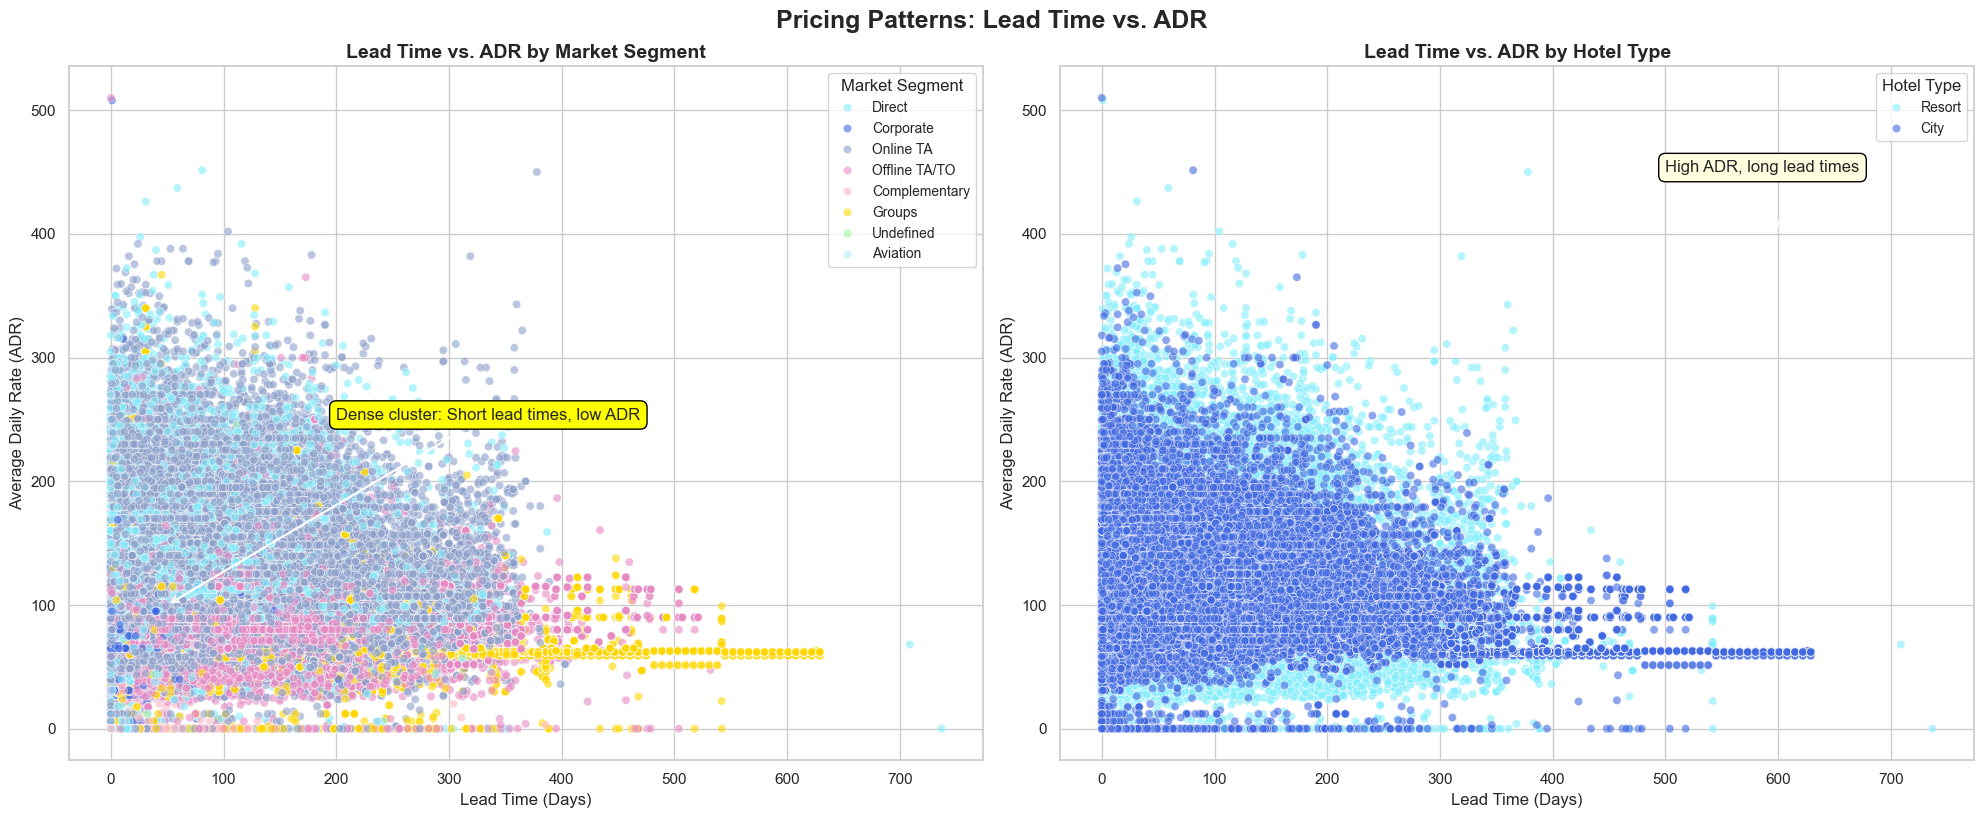

In [30]:
# Define the dataset
data = hotel_reservations_data.copy()
color_palette = ['#82EEFD', '#4169E1', '#8da0cb', '#e78ac3', '#FFB6C1', '#FFD700', '#98FB98', '#AFEEEE']

# Set a consistent style for the plots
sns.set_theme(style="whitegrid", palette="pastel")

# Create scatter plots for lead_time vs. adr across market_segment and hotel_type
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 1. Lead Time vs. ADR by Market Segment
sns.scatterplot(
    data=data,
    x="lead_time",
    y="adr",
    hue="market_segment",
    alpha=0.6,
    palette=color_palette,
    ax=axes[0]
)

axes[0].set_title("Lead Time vs. ADR by Market Segment", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Lead Time (Days)", fontsize=12)
axes[0].set_ylabel("Average Daily Rate (ADR)", fontsize=12)
axes[0].legend(title="Market Segment", fontsize=10)

# Highlight dense cluster for Direct and Corporate bookings
axes[0].annotate(
    "Dense cluster: Short lead times, low ADR",
    xy=(50, 100),
    xytext=(200, 250),  # Slightly lower so it's closer to data range
    arrowprops=dict(facecolor='black', arrowstyle="->", linewidth=1.5),
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.4", edgecolor="black", facecolor="yellow"),
    zorder=5
)

# 2. Lead Time vs. ADR by Hotel Type
sns.scatterplot(
    data=data,
    x="lead_time",
    y="adr",
    hue="hotel_type",
    alpha=0.6,
    palette=color_palette[0:2],
    ax=axes[1]
)

axes[1].set_title("Lead Time vs. ADR by Hotel Type", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Lead Time (Days)", fontsize=12)
axes[1].set_ylabel("Average Daily Rate (ADR)", fontsize=12)
axes[1].legend(title="Hotel Type", fontsize=10)

# Highlight spread of high ADR and long lead times for Resort Hotels
axes[1].annotate(
    "High ADR, long lead times",
    xy=(600, 400),
    xytext=(500, 450),  # Moved text to the left to avoid being cut off
    arrowprops=dict(facecolor='black', arrowstyle="->", linewidth=1.5),
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.4", edgecolor="black", facecolor="lightyellow"),
    zorder=5
)

# Adjust layout
plt.tight_layout()
plt.suptitle("Pricing Patterns: Lead Time vs. ADR", fontsize=18, y=1.02, fontweight="bold")
plt.show()

del data

**Key Observations**

**Market Segment Analysis**:
- The left plot highlights a dense cluster of bookings with short lead times and low ADR for Direct and Corporate market segments. This indicates that these segments are likely to book closer to the check-in date and prefer lower-priced options.

**Hotel Type Analysis**:
- The right plot shows a spread of high ADR and long lead times for Resort Hotels, suggesting that customers booking Resort Hotels are willing to pay higher prices and plan their stays well in advance. This aligns with leisure travel patterns, where vacations are planned ahead.

**Key Observations**:
- **Direct and Corporate Bookings**: These segments are price-sensitive and exhibit last-minute booking behavior.
- **Resort Hotels**: Higher ADR and longer lead times indicate a focus on premium pricing and advance planning, likely due to vacation-oriented customers.

**Actionable Insights**:
- **For Direct and Corporate Segments**: Hotels can offer last-minute deals or discounts to attract these customers while maintaining occupancy.
- **For Resort Hotels**: Focus on early-bird promotions and premium packages to capitalize on customers' willingness to pay higher rates for planned vacations.

##### Misc. Trends for Slide Deck

In [31]:
# Step 1: Create a copy and compute total revenue
hotel_reservations_data_copy = hotel_reservations_data.copy()

# total number of reservations
print(f"Total Reservations: {hotel_reservations_data_copy.shape[0]}")
print(f"Total Cancellations: {hotel_reservations_data_copy['is_canceled'].sum()}")
# Calculate overall cancellation rate
overall_cancellation_rate = (hotel_reservations_data_copy['is_canceled'].mean()) * 100
print(f"Overall Cancellation Rate: {overall_cancellation_rate:.2f}%\n")

#  Calculate total revenue
hotel_reservations_data_copy['total_stay_duration'] = (
    hotel_reservations_data_copy['stays_in_weekend_nights'] + 
    hotel_reservations_data_copy['stays_in_week_nights']
)
hotel_reservations_data_copy['total_revenue'] = (
    hotel_reservations_data_copy['adr'] * hotel_reservations_data_copy['total_stay_duration']
)
total_revenue = hotel_reservations_data_copy['total_revenue'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")
# Calculate total revenue lost in cancellations
total_revenue_lost = hotel_reservations_data_copy[hotel_reservations_data_copy['is_canceled'] == 1]['total_revenue'].sum()
print(f"Total Revenue Lost Due to Cancellations: ${total_revenue_lost:,.2f}\n")

# Use reservation_status_date to calculate the number of years under study (difference between the max and min dates expressed in years)
hotel_reservations_data_copy['reservation_status_date'] = pd.to_datetime(hotel_reservations_data_copy['reservation_status_date'])
years_under_study = (hotel_reservations_data_copy['reservation_status_date'].max() - hotel_reservations_data_copy['reservation_status_date'].min()).days / 365
print(f"Years Under Study: {years_under_study:.2f} years\n")
# Annualized revenue loss due to cancellations
annualized_revenue_loss = total_revenue_lost / years_under_study
print(f"Annualized Revenue Loss Due to Cancellations: ${annualized_revenue_loss:,.2f}\n")

# Filter data for Resort and City hotels
resort_data = hotel_reservations_data_copy[hotel_reservations_data_copy['hotel_type'] == 'Resort']
city_data = hotel_reservations_data_copy[hotel_reservations_data_copy['hotel_type'] == 'City']

total_resort = resort_data.shape[0]
print(f"Total Reservations for Resort Hotel: {total_resort}")
cancellation_resort = resort_data['is_canceled'].sum()
print(f"Total Cancellations for Resort Hotel: {cancellation_resort}")
cancellation_rate_resort = (resort_data['is_canceled'].mean()) * 100
print(f"Cancellation Rate for Resort Hotel: {cancellation_rate_resort:.2f}%\n")

total_city = city_data.shape[0]
print(f"Total Reservations for City Hotel: {total_city}")
cancellation_city = city_data['is_canceled'].sum()
print(f"Total Cancellations for City Hotel: {cancellation_city}")
cancellation_rate_city = (city_data['is_canceled'].mean()) * 100
print(f"Cancellation Rate for City Hotel: {cancellation_rate_city:.2f}%")


Total Reservations: 119208
Total Cancellations: 44198
Overall Cancellation Rate: 37.08%

Total Revenue: $42,708,813.15
Total Revenue Lost Due to Cancellations: $16,721,837.12

Years Under Study: 2.91 years

Annualized Revenue Loss Due to Cancellations: $5,741,740.87

Total Reservations for Resort Hotel: 40046
Total Cancellations for Resort Hotel: 11120
Cancellation Rate for Resort Hotel: 27.77%

Total Reservations for City Hotel: 79162
Total Cancellations for City Hotel: 33078
Cancellation Rate for City Hotel: 41.79%


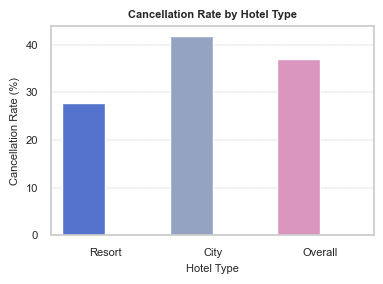

In [32]:

# 1. Plot a graph of the cancellation rate by hotel type and overall (Resort, City and Overall)
color_palette = ['#82EEFD', '#4169E1', '#8da0cb', '#e78ac3']
plt.figure(figsize=(4, 3))
ax = sns.barplot(
    x=['Resort', 'City', 'Overall'],
    y=[cancellation_rate_resort, cancellation_rate_city, overall_cancellation_rate],
    palette=color_palette[1:4],
    hue=['Resort', 'City', 'Overall']
)

# Reduce bar width
bar_width = 0.4
for bar in ax.patches:
    bar.set_width(bar_width)

plt.title('Cancellation Rate by Hotel Type', fontsize=8, fontweight='bold')
plt.xlabel('Hotel Type', fontsize=8)
plt.ylabel('Cancellation Rate (%)', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.2, color='gray')
plt.tight_layout()
plt.show()

<Figure size 300x300 with 0 Axes>

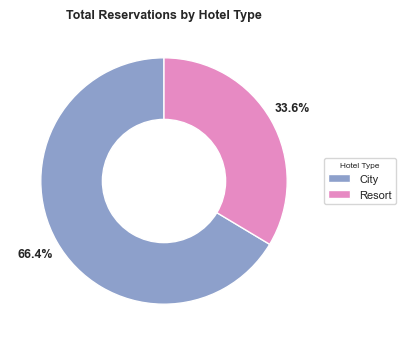

In [33]:
# 2. Plot a donut chart of Hotel Type Distribution
hotel_type_counts = hotel_reservations_data_copy['hotel_type'].value_counts()
plt.figure(figsize=(3, 3))

# Create a pie chart with percentage labels inside the chart
plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(
    hotel_type_counts,
    labels=hotel_type_counts.index,  # Add category labels
    autopct='%1.1f%%',  # Add percentage labels
    startangle=90,
    colors=['#8da0cb', '#e78ac3'],  # Example color palette
    wedgeprops={'width': 0.5, 'edgecolor': 'w'},  # Adjust hole size
    pctdistance=1.2,  # Move percentage labels closer to the center
    labeldistance=1.1,  # Keep category labels outside the chart
    textprops={'fontsize': 9, 'fontweight': 'bold'}  # Adjust font size
)

# Suppress labels
for text in texts:
    text.set_visible(False)

# Add a legend instead of labels
plt.legend(
    hotel_type_counts.index,
    title="Hotel Type",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),  # Place the legend outside the chart
    fontsize=8,  # Adjust legend font size to 8
    title_fontsize=6  # Reduce font size of the legend title
)

plt.title('Total Reservations by Hotel Type', fontsize=9, fontweight='bold')  # Adjust title font size to 8
plt.show()

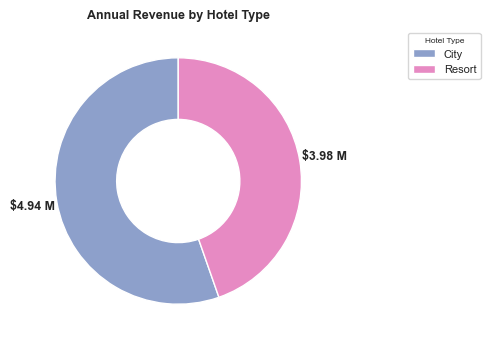

In [34]:
# 3. Filter the dataset for non-canceled bookings
non_canceled_data = hotel_reservations_data_copy[hotel_reservations_data_copy['is_canceled'] == 0]

# Group by hotel type and calculate total revenue
revenue_by_hotel_type = non_canceled_data.groupby('hotel_type')['total_revenue'].sum() / years_under_study

plt.figure(figsize=(4, 4))

# Create a pie chart with actual value labels inside the chart
wedges, texts, autotexts = plt.pie(
    revenue_by_hotel_type,
    labels=None,  # Add category labels
    autopct=lambda p: f'${p * sum(revenue_by_hotel_type) / 100 / 1e6:.2f} M',  # Add actual value labels in millions
    startangle=90,
    colors=['#8da0cb', '#e78ac3'],  # Example color palette
    wedgeprops={'width': 0.5, 'edgecolor': 'w'},  # Adjust hole size
    pctdistance=1.2,  # Move value labels closer to the center
    labeldistance=None,  # Disable category labels to avoid overlap
    textprops={'fontsize': 9, 'fontweight': 'bold'}  # Adjust font size
)

# Add a legend instead of labels
plt.legend(
    revenue_by_hotel_type.index,
    title="Hotel Type",
    loc="best",
    bbox_to_anchor=(1, 0, 0.5, 1),  # Place the legend outside the chart
    fontsize=8,  # Adjust legend font size to 8
    title_fontsize=6  # Reduce font size of the legend title
)

plt.title('Annual Revenue by Hotel Type', fontsize=9, fontweight='bold')  # Adjust title font size to 8
plt.show()

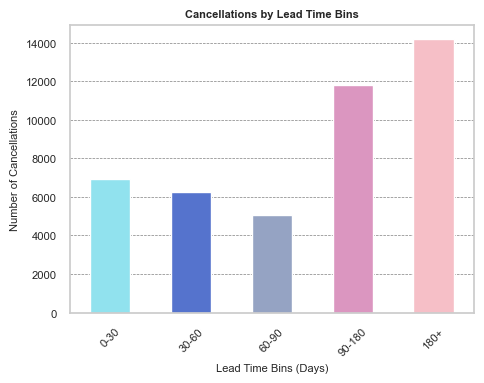


Lead Time Data for Cancellations:
lead_time_bins  count
          0-30   6925
         30-60   6247
         60-90   5057
        90-180  11787
          180+  14182


In [35]:
# 4. Create bin ranges for lead time
# Define the bins as '0-29', '30-90', '61-90', '91-180', '180+'
lead_time_bins = [0, 30, 60, 90, 180, float('inf')]
lead_time_labels = ['0-30', '30-60', '60-90', '90-180', '180+']
hotel_reservations_data_copy['lead_time_bins'] = pd.cut(
    hotel_reservations_data_copy['lead_time'],
    bins=lead_time_bins,
    labels=lead_time_labels,
    right=False
)
# Create a new DataFrame for the lead time analysis
lead_time_data = hotel_reservations_data_copy[hotel_reservations_data_copy['is_canceled'] == 1].groupby(
    ['lead_time_bins'],
    observed=True
).size().reset_index(name='count')
lead_time_data['lead_time_bins'] = lead_time_data['lead_time_bins'].astype(str)
# Remove the column 'lead_time_bins' from the original DataFrame
del hotel_reservations_data_copy['lead_time_bins']

# Set a consistent style for the plots
sns.set_theme(style="whitegrid", palette="pastel")
color_palette = ['#82EEFD', '#4169E1', '#8da0cb', '#e78ac3', '#FFB6C1']

# Plot the lead time distribution by hotel type
plt.figure(figsize=(5, 4))

# Create a bar plot for lead time bins
sns.barplot(
    data=lead_time_data,
    x='lead_time_bins',
    y='count',
    hue='lead_time_bins',
    palette=color_palette,  # Use the first two colors for Resort and City hotels
    width=0.5  # Adjust bar width if needed
)

# Customize the plot
plt.title('Cancellations by Lead Time Bins', fontsize=8, fontweight='bold')
plt.xlabel('Lead Time Bins (Days)', fontsize=8)
plt.ylabel('Number of Cancellations', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Display the lead time data used for the plot
print("\nLead Time Data for Cancellations:")
print(lead_time_data.to_string(index=False))

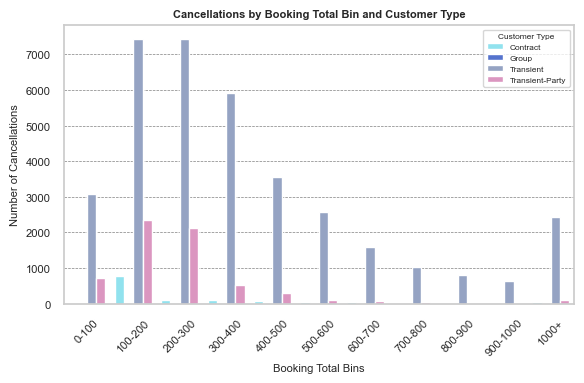


Cancellations by Total Revenue Bin and Customer Type:
  customer_type revenue_bins  count
       Contract        0-100     27
       Contract      100-200    763
       Contract      200-300    108
       Contract      300-400    108
       Contract      400-500     67
       Contract      500-600     48
       Contract      600-700     32
       Contract      700-800     24
       Contract      800-900     18
       Contract     900-1000     16
       Contract        1000+     51
          Group        0-100     28
          Group      100-200      7
          Group      200-300      3
          Group      300-400      5
          Group      400-500      6
          Group      500-600      1
          Group      600-700      2
          Group      700-800      1
          Group      800-900      1
          Group     900-1000      1
          Group        1000+      3
      Transient        0-100   3080
      Transient      100-200   7431
      Transient      200-300   7438
      Tra

In [36]:
# 5. Create bin ranges for total revenue
# Define the bins and labels
revenue_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
revenue_labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000+']
hotel_reservations_data_copy['revenue_bins'] = pd.cut(
    hotel_reservations_data_copy['total_revenue'],
    bins=revenue_bins,
    labels=revenue_labels,
    right=False
)

# Filter data for canceled reservations
canceled_data = hotel_reservations_data_copy[hotel_reservations_data_copy['is_canceled'] == 1]

# Group by customer type and revenue bins
revenue_cancellation_data = canceled_data.groupby(
    ['customer_type', 'revenue_bins'],
    observed=True
).size().reset_index(name='count')

# Set up the plot theme
sns.set_theme(style="whitegrid", palette="pastel")
color_palette = ['#82EEFD', '#4169E1', '#8da0cb', '#e78ac3']  # You can add more if needed

# Plot the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(
    data=revenue_cancellation_data,
    x='revenue_bins',
    y='count',
    hue='customer_type',
    palette=color_palette
)

# Customize the plot
plt.title('Cancellations by Booking Total Bin and Customer Type', fontsize=8, fontweight='bold')
plt.xlabel('Booking Total Bins', fontsize=8)
plt.ylabel('Number of Cancellations', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.legend(title='Customer Type', fontsize=6, title_fontsize=6)  # Adjust legend font size

# Display the plot
plt.tight_layout()
plt.show()

# Display the grouped data used for plotting
print("\nCancellations by Total Revenue Bin and Customer Type:")
print(revenue_cancellation_data.to_string(index=False))


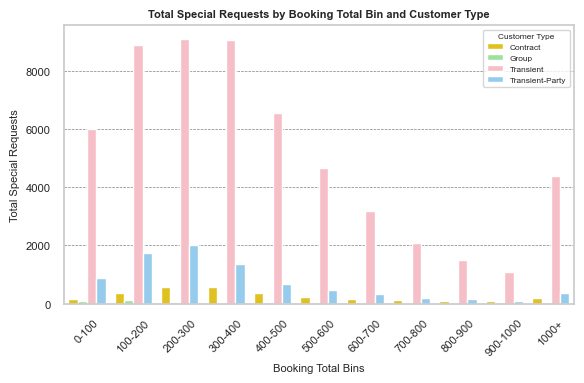


Total Special Requests by Customer Type and Revenue Bin:
  customer_type revenue_bins  total_of_special_requests
       Contract        0-100                        160
       Contract      100-200                        379
       Contract      200-300                        579
       Contract      300-400                        582
       Contract      400-500                        374
       Contract      500-600                        222
       Contract      600-700                        154
       Contract      700-800                        130
       Contract      800-900                         85
       Contract     900-1000                         96
       Contract        1000+                        206
          Group        0-100                         86
          Group      100-200                        119
          Group      200-300                         64
          Group      300-400                         23
          Group      400-500                  

In [37]:
# Ensure revenue bins are applied
revenue_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
revenue_labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000+']
hotel_reservations_data_copy['revenue_bins'] = pd.cut(
    hotel_reservations_data_copy['total_revenue'],
    bins=revenue_bins,
    labels=revenue_labels,
    right=False
)

# Group by customer type and revenue bin, summing special requests
special_requests_data = hotel_reservations_data_copy.groupby(
    ['customer_type', 'revenue_bins'], observed=True
)['total_of_special_requests'].sum().reset_index()

# Set up the plot theme
sns.set_theme(style="whitegrid", palette="pastel")
color_palette = ['#FFD700', '#90EE90', '#FFB6C1', '#87CEFA']  # Modify or extend as needed

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=special_requests_data,
    x='revenue_bins',
    y='total_of_special_requests',
    hue='customer_type',
    palette=color_palette
)

# Customize the plot
plt.title('Total Special Requests by Booking Total Bin and Customer Type', fontsize=8, fontweight='bold')
plt.xlabel('Booking Total Bins', fontsize=8)
plt.ylabel('Total Special Requests', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.legend(title='Customer Type', fontsize=6, title_fontsize=6)  # Adjust legend font size

# Display the plot
plt.tight_layout()
plt.show()

# Display the grouped data used for plotting
print("\nTotal Special Requests by Customer Type and Revenue Bin:")
print(special_requests_data.to_string(index=False))


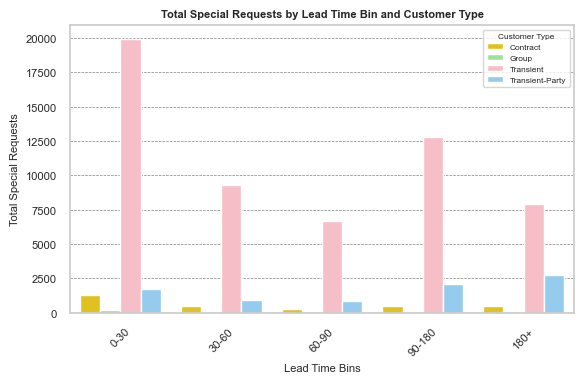


Total Special Requests by Customer Type and Lead Time Bin:
  customer_type lead_time_bins  total_of_special_requests
       Contract           0-30                       1246
       Contract          30-60                        494
       Contract          60-90                        240
       Contract         90-180                        483
       Contract           180+                        504
          Group           0-30                        216
          Group          30-60                         40
          Group          60-90                         25
          Group         90-180                         60
          Group           180+                         31
      Transient           0-30                      19920
      Transient          30-60                       9309
      Transient          60-90                       6654
      Transient         90-180                      12765
      Transient           180+                       7877
Transient-Pa

In [38]:
# Define the lead time bins and labels
lead_time_bins = [0, 30, 60, 90, 180, float('inf')]
lead_time_labels = ['0-30', '30-60', '60-90', '90-180', '180+']

# Apply bins to the lead_time column
hotel_reservations_data_copy['lead_time_bins'] = pd.cut(
    hotel_reservations_data_copy['lead_time'],
    bins=lead_time_bins,
    labels=lead_time_labels,
    right=False
)

# Group by customer type and lead time bin, summing special requests
special_requests_lead_time = hotel_reservations_data_copy.groupby(
    ['customer_type', 'lead_time_bins'], observed=True
)['total_of_special_requests'].sum().reset_index()

# Set up the plot theme
sns.set_theme(style="whitegrid", palette="pastel")
color_palette = ['#FFD700', '#90EE90', '#FFB6C1', '#87CEFA']  # Same palette

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=special_requests_lead_time,
    x='lead_time_bins',
    y='total_of_special_requests',
    hue='customer_type',
    palette=color_palette
)

# Customize the plot
plt.title('Total Special Requests by Lead Time Bin and Customer Type', fontsize=8, fontweight='bold')
plt.xlabel('Lead Time Bins', fontsize=8)
plt.ylabel('Total Special Requests', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.legend(title='Customer Type', fontsize=6, title_fontsize=6)

# Display the plot
plt.tight_layout()
plt.show()

# Display the grouped data used for plotting
print("\nTotal Special Requests by Customer Type and Lead Time Bin:")
print(special_requests_lead_time.to_string(index=False))


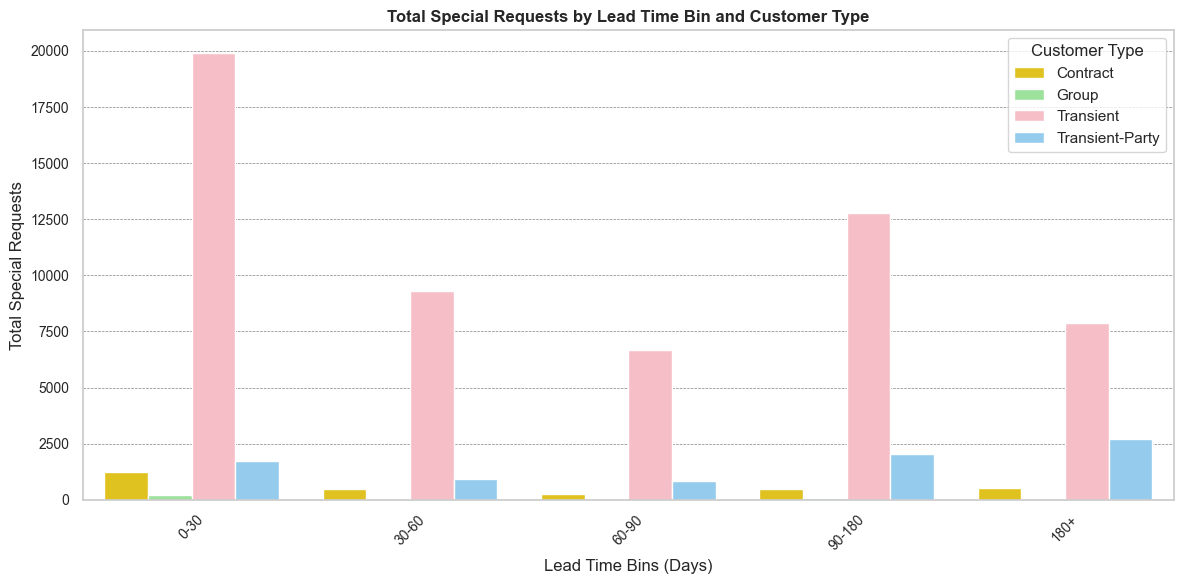


Total Special Requests by Customer Type and Lead Time Bin:
  customer_type lead_time_bins  total_of_special_requests
       Contract           0-30                       1246
       Contract          30-60                        494
       Contract          60-90                        240
       Contract         90-180                        483
       Contract           180+                        504
          Group           0-30                        216
          Group          30-60                         40
          Group          60-90                         25
          Group         90-180                         60
          Group           180+                         31
      Transient           0-30                      19920
      Transient          30-60                       9309
      Transient          60-90                       6654
      Transient         90-180                      12765
      Transient           180+                       7877
Transient-Pa

In [39]:
# Define bins and labels for lead_time
lead_time_bins = [0, 30, 60, 90, 180, float('inf')]
lead_time_labels = ['0-30', '30-60', '60-90', '90-180', '180+']

# Create lead_time_bins column
hotel_reservations_data_copy['lead_time_bins'] = pd.cut(
    hotel_reservations_data_copy['lead_time'],
    bins=lead_time_bins,
    labels=lead_time_labels,
    right=False
)

# Group by customer type and lead_time_bins, summing special requests
special_requests_data = hotel_reservations_data_copy.groupby(
    ['customer_type', 'lead_time_bins'], observed=True
)['total_of_special_requests'].sum().reset_index()

# Set up the plot theme
sns.set_theme(style="whitegrid", palette="pastel")
color_palette = ['#FFD700', '#90EE90', '#FFB6C1', '#87CEFA']

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=special_requests_data,
    x='lead_time_bins',
    y='total_of_special_requests',
    hue='customer_type',
    palette=color_palette
)

# Customize the plot
plt.title('Total Special Requests by Lead Time Bin and Customer Type', fontsize=12, fontweight='bold')
plt.xlabel('Lead Time Bins (Days)', fontsize=12)
plt.ylabel('Total Special Requests', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.legend(title='Customer Type')

# Display the plot
plt.tight_layout()
plt.show()

# Display the grouped data used for plotting
print("\nTotal Special Requests by Customer Type and Lead Time Bin:")
print(special_requests_data.to_string(index=False))


In [40]:
del hotel_reservations_data_copy

#### f. Feature Engineering

**List of Features to be Engineered**

1. **Total Stay Duration**: `stays_in_weekend_nights + stays_in_week_nights`  
    - **Priority**: Fundamental  
    - **Purpose**: Captures the total length of stay.

2. **Total Guests**: `adults + children + babies`  
    - **Priority**: Fundamental  
    - **Purpose**: Represents the total number of guests.

3. **Guest Type Categorization**: Categorize guests as `'Single'`, `'Couple'`, `'Family'`, or use a `has_children` flag.  
    - **Priority**: Captures travel context.  
    - **Purpose**: Helps identify guest types for targeted analysis.

4. **Lead Time Bins**: Categorize `lead_time` into bins.  
    - **Priority**: Medium  
    - **Purpose**: Addresses non-linear effects observed in EDA.

5. **Temporal Features**: Extract features like `arrival_month`, `arrival_day_of_week`, and `season`.  
    - **Priority**: High  
    - **Purpose**: Captures time dependencies.

6. **Domestic Booking Flag**: Create a flag where `country = host_country` (e.g., `PRT`).  
    - **Priority**: High  
    - **Purpose**: Identifies domestic bookings, especially given the dominance of PRT.

7. **Deposit Type Encoding**: Drop this columns given the unexpected trend identified in EDA.
    - **Priority**: High  
    - **Purpose**: Counter-intuitive data trend that cannot be investigated with the available data.

8. **Room Mismatch Flag**: Create a flag where `reserved_room_type != assigned_room_type`.  
    - **Priority**: Medium  
    - **Purpose**: Captures operational outcomes.

9. **Cancellation History Ratio**: Calculate `previous_cancellations / (previous_cancellations + previous_bookings_not_canceled)`.  
    - **Priority**: Medium-High  
    - **Purpose**: Normalized indicator of past behavior.

10. **Total Revenue**: Calculate `adr * total_nights`.  
     - **Priority**: Medium-High  
     - **Purpose**: Useful business metric and predictive feature.

11. **ADR per Guest**: Calculate `adr / total_guests`.  
     - **Priority**: Medium  
     - **Purpose**: Normalizes ADR for group size.

12. **Stay Type**: Categorize stays as `'Weekend only'`, `'Weekday only'`, or `'Both'`.  
     - **Priority**: Medium  
     - **Purpose**: Refines stay duration analysis.

13. **Company Booking Indicator**: Create a flag for `company` bookings.  
     - **Priority**: Medium  
     - **Purpose**: Identifies corporate bookings.

14. **Agent Booking Indicator**: Create a flag for `agent` bookings.  
     - **Priority**: Medium  
     - **Purpose**: Identifies OTA bookings.

##### Total Stay Duration

In [41]:
# 1. Add a new feature for total stay duration
hotel_reservations_data['total_stay_duration'] = (
    hotel_reservations_data['stays_in_weekend_nights'] + 
    hotel_reservations_data['stays_in_week_nights']
)

# Verify the new feature
print("Total Stay Duration Feature Added:")
print(hotel_reservations_data[['stays_in_weekend_nights', 'stays_in_week_nights', 'total_stay_duration']].head())

Total Stay Duration Feature Added:
   stays_in_weekend_nights  stays_in_week_nights  total_stay_duration
0                        0                     0                    0
1                        0                     0                    0
2                        0                     1                    1
3                        0                     1                    1
4                        0                     2                    2


##### Total Guests

In [42]:
# 2. Add a new feature for total guests
hotel_reservations_data['total_guests'] = (
    hotel_reservations_data['adults'] + 
    hotel_reservations_data['children'] + 
    hotel_reservations_data['babies']
)

# Verify the new feature
print("Total Guests Feature Added:")
print(hotel_reservations_data[['adults', 'children', 'babies', 'total_guests']].head())

Total Guests Feature Added:
   adults  children  babies  total_guests
0       2         0       0             2
1       2         0       0             2
2       1         0       0             1
3       1         0       0             1
4       2         0       0             2


##### Guest Type

In [43]:
# 3. Add a new column for guest type categorization
hotel_reservations_data['guest_type'] = hotel_reservations_data.apply(hlp.categorize_guest, axis=1)

# Verify the new features
print(hotel_reservations_data[['adults', 'children', 'babies', 'guest_type']].head())

# Review composition of guest types
guest_type_counts = hotel_reservations_data['guest_type'].value_counts()
print("Guest Type Composition:\n", guest_type_counts, "\n")

# Review few Reservations with 'Minors Only' guest type
minorsonly_guest_type_entries = hotel_reservations_data[hotel_reservations_data['guest_type'] == 'Minors Only'][['adults', 'children', 'babies', 'guest_type']].head()
print("Reservations with 'Minors Only' Guest Type:\n", minorsonly_guest_type_entries, "\n")

# Are there any reservations where guest type is 'Minors Only' and adults ≠ 0?
minorsonly_guests_adults_count = hotel_reservations_data[(hotel_reservations_data['guest_type'] == 'Minors Only') & (hotel_reservations_data['adults'] != 0)]['guest_type'].value_counts()
print("Are there any reservations with Guest Type 'Minors Only' where Adults ≠ 0? ", not minorsonly_guests_adults_count.empty, "\n")

   adults  children  babies     guest_type
0       2         0       0  Likely Couple
1       2         0       0  Likely Couple
2       1         0       0  Solo Traveler
3       1         0       0  Solo Traveler
4       2         0       0  Likely Couple
Guest Type Composition:
 guest_type
Likely Couple       81558
Solo Traveler       22577
Likely Family(s)     9109
Group of Adults      5741
Minors Only           223
Name: count, dtype: int64 

Reservations with 'Minors Only' Guest Type:
        adults  children  babies   guest_type
40984       0         3       0  Minors Only
41048       0         2       0  Minors Only
41446       0         2       0  Minors Only
41952       0         2       0  Minors Only
45158       0         2       0  Minors Only 

Are there any reservations with Guest Type 'Minors Only' where Adults ≠ 0?  False 



##### Lead Time

In [44]:
# 4. Add a new feature for lead time bins using pd.cut
bins = [0, 7, 30, 90, 180, float('inf')]  # Define bin edges
labels = ['0-7 Days', '8-30 Days', '31-90 Days', '91-180 Days', '181+ Days']  # Define bin labels

# Use pd.cut to categorize lead_time
hotel_reservations_data['lead_time_bin'] = pd.cut(
    hotel_reservations_data['lead_time'], 
    bins=bins, 
    labels=labels, 
    right=True  # Include the right edge of the interval
)

# Verify the new feature
print("Lead Time Bins Feature Added:")
print(hotel_reservations_data[['lead_time', 'lead_time_bin']].head())

# Review the distribution of the new feature
lead_time_bin_distribution = hotel_reservations_data['lead_time_bin'].value_counts()
print("\nLead Time Bin Distribution:")
print(lead_time_bin_distribution)

Lead Time Bins Feature Added:
   lead_time lead_time_bin
0        342     181+ Days
1        737     181+ Days
2          7      0-7 Days
3         13     8-30 Days
4         14     8-30 Days

Lead Time Bin Distribution:
lead_time_bin
31-90 Days     29528
91-180 Days    26420
181+ Days      24680
8-30 Days      18945
0-7 Days       13371
Name: count, dtype: int64


##### Temporal Features

In [45]:
# 5. Add temporal features: arrival_month, arrival_day_of_week, and season

# Construct date string: Year-MonthName-DayOfMonth (e.g., "2015-July-1")
date_str = hotel_reservations_data['arrival_date_year'].astype(str) + '-' + \
                   hotel_reservations_data['arrival_date_month'].astype(str) + '-' + \
                   hotel_reservations_data['arrival_date_day_of_month'].astype(str)

# Convert to datetime objects
hotel_reservations_data['arrival_date'] = pd.to_datetime(
    date_str, 
    format='%Y-%B-%d', 
    errors='coerce'
)

# Extract Month Number
hotel_reservations_data['arrival_month_num'] = hotel_reservations_data['arrival_date'].dt.month

# Extract Day of Week (Monday=0, Sunday=6)
hotel_reservations_data['arrival_day_of_week'] = hotel_reservations_data['arrival_date'].dt.dayofweek

# Extract Booking Season from
hotel_reservations_data['booking_season'] = hotel_reservations_data['arrival_month_num'].apply(hlp.get_season)

# Verify the new features
print("Temporal Features Added:")
print(hotel_reservations_data[['arrival_date_month', 'arrival_month_num', 'arrival_day_of_week', 'booking_season']].head())

# Review the distribution of the new features
print("\nDistribution of Arrival Months:")
print(hotel_reservations_data['arrival_month_num'].value_counts())

print("\nDistribution of Arrival Days of the Week:")
print(hotel_reservations_data['arrival_day_of_week'].value_counts())

print("\nDistribution of Seasons:")
print(hotel_reservations_data['booking_season'].value_counts())


Temporal Features Added:
  arrival_date_month  arrival_month_num  arrival_day_of_week booking_season
0               July                  7                    2         Summer
1               July                  7                    2         Summer
2               July                  7                    2         Summer
3               July                  7                    2         Summer
4               July                  7                    2         Summer

Distribution of Arrival Months:
arrival_month_num
8     13861
7     12644
5     11780
10    11147
4     11078
6     10929
9     10500
3      9766
2      8052
11     6771
12     6759
1      5921
Name: count, dtype: int64

Distribution of Arrival Days of the Week:
arrival_day_of_week
4    19601
3    19225
0    18152
5    18036
2    16099
6    14124
1    13971
Name: count, dtype: int64

Distribution of Seasons:
booking_season
Summer    37434
Spring    32624
Fall      28418
Winter    20732
Name: count, dtype: int64


##### Domestic/International Booking (Country of Origin Effect)

In [46]:
# 6. Add a domestic booking flag

# Define the host country (most frequent country in the dataset)
host_country = hotel_reservations_data['country'].mode()[0]

# Create the is_domestic_booking flag
hotel_reservations_data['is_likely_domestic_booking'] = (hotel_reservations_data['country'] == host_country).astype(int)

# Verify the new feature
print("Domestic Booking Flag Added:")
print(hotel_reservations_data[['country', 'is_likely_domestic_booking']].head())

# Review the distribution of domestic vs. international bookings
domestic_booking_distribution = hotel_reservations_data['is_likely_domestic_booking'].value_counts()
print("\nDistribution of Domestic vs. International Bookings:")
print(domestic_booking_distribution)

# TODO: How do we have handle the country column given there 
# are 177 countries in the dataset and encdoding it would
# result in too many features? Keep Top N Categories + 'Other'



Domestic Booking Flag Added:
  country  is_likely_domestic_booking
0     PRT                           1
1     PRT                           1
2     GBR                           0
3     GBR                           0
4     GBR                           0

Distribution of Domestic vs. International Bookings:
is_likely_domestic_booking
0    70726
1    48482
Name: count, dtype: int64


##### Room Type Mismatch

In [47]:
# 8. Add a room mismatch flag

# Create a binary flag for room mismatch
hotel_reservations_data['room_mismatch'] = (
    hotel_reservations_data['reserved_room_type'] != hotel_reservations_data['assigned_room_type']
).astype(int)

# Verify the new feature
print("Room Mismatch Flag Added:")
print(hotel_reservations_data[['reserved_room_type', 'assigned_room_type', 'room_mismatch']].head())

# Display value counts for the new feature
print("\nValue counts for 'room_mismatch':")
print(hotel_reservations_data['room_mismatch'].value_counts())

# Analyze mismatch rates
mismatch_rate = hotel_reservations_data['room_mismatch'].mean() * 100
print(f"\nOverall Room Mismatch Rate: {mismatch_rate:.2f}%")

# Analyze mismatch rates by hotel type
mismatch_rate_by_hotel = hotel_reservations_data.groupby('hotel_type')['room_mismatch'].mean() * 100
print("\nRoom Mismatch Rate by Hotel Type:")
print(mismatch_rate_by_hotel)

Room Mismatch Flag Added:
  reserved_room_type assigned_room_type  room_mismatch
0                  C                  C              0
1                  C                  C              0
2                  A                  C              1
3                  A                  A              0
4                  A                  A              0

Value counts for 'room_mismatch':
room_mismatch
0    104413
1     14795
Name: count, dtype: int64

Overall Room Mismatch Rate: 12.41%

Room Mismatch Rate by Hotel Type:
hotel_type
City       8.941159
Resort    19.270339
Name: room_mismatch, dtype: float64


##### Cancellation History Ratio

In [48]:
# 9. Add a cancellation history ratio feature

# Calculate cancellation history ratio
hotel_reservations_data['cancellation_history_ratio'] = np.where(
    hotel_reservations_data['previous_cancellations'] + 
    hotel_reservations_data['previous_bookings_not_canceled'] == 0,
    0,
    hotel_reservations_data['previous_cancellations'] / (hotel_reservations_data['previous_cancellations'] + hotel_reservations_data['previous_bookings_not_canceled'])
)

# Verify the new feature
print("Cancellation History Ratio Feature Added:")
print(hotel_reservations_data[['previous_cancellations', 'previous_bookings_not_canceled', 'cancellation_history_ratio']].head())

# Review the distribution of the new feature
print("\nDistribution of Cancellation History Ratio:")
print(hotel_reservations_data['cancellation_history_ratio'].describe())

Cancellation History Ratio Feature Added:
   previous_cancellations  previous_bookings_not_canceled  \
0                       0                               0   
1                       0                               0   
2                       0                               0   
3                       0                               0   
4                       0                               0   

   cancellation_history_ratio  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0  

Distribution of Cancellation History Ratio:
count    119208.000000
mean          0.050235
std           0.216633
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: cancellation_history_ratio, dtype: float64


##### Total Revenue

In [49]:
# 10. Add a total revenue feature

# Calculate total revenue
hotel_reservations_data['total_revenue'] = (
    hotel_reservations_data['adr'] * hotel_reservations_data['total_stay_duration']
)

# Verify the new feature
print("Total Revenue Feature Added:")
print(hotel_reservations_data[['adr', 'total_stay_duration', 'total_revenue']].head())

# Review the distribution of the new feature
print("\nDistribution of Total Revenue:")

print(hotel_reservations_data['total_revenue'].describe())

Total Revenue Feature Added:
    adr  total_stay_duration  total_revenue
0   0.0                    0            0.0
1   0.0                    0            0.0
2  75.0                    1           75.0
3  75.0                    1           75.0
4  98.0                    2          196.0

Distribution of Total Revenue:
count    119208.000000
mean        358.271367
std         335.588928
min           0.000000
25%         146.700000
50%         267.000000
75%         446.670000
max        7590.000000
Name: total_revenue, dtype: float64


##### ADR per Guest

In [50]:
# 11. Add a feature for ADR per guest

# Calculate ADR per person
hotel_reservations_data['adr_per_guest'] = np.where(
    hotel_reservations_data['total_guests'] == 0, 
    0,  # Handle cases where total_guests is 0 to avoid division by zero
    hotel_reservations_data['adr'] / hotel_reservations_data['total_guests']
)

# Verify the new feature
print("ADR per Person Feature Added:")
print(hotel_reservations_data[['adr', 'total_guests', 'adr_per_guest']].head())

# Review the distribution of the new feature
print("\nDistribution of ADR per Guest:")
print(hotel_reservations_data['adr_per_guest'].describe())

ADR per Person Feature Added:
    adr  total_guests  adr_per_guest
0   0.0             2            0.0
1   0.0             2            0.0
2  75.0             1           75.0
3  75.0             1           75.0
4  98.0             2           49.0

Distribution of ADR per Guest:
count    119208.000000
mean         54.967253
std          28.030559
min           0.000000
25%          37.400000
50%          49.500000
75%          66.000000
max         510.000000
Name: adr_per_guest, dtype: float64


##### Stay Type

In [51]:
# 12. Add a feature for stay type categorization

# Categorize stays based on weekday and weekend nights
hotel_reservations_data['stay_type'] = hotel_reservations_data.apply(hlp.categorize_stay, axis=1)

# Verify the new feature
print("Stay Type Feature Added:")
print(hotel_reservations_data[['stays_in_weekend_nights', 'stays_in_week_nights', 'stay_type']].head())

# Review the distribution of the new feature
print("\nDistribution of Stay Types:")
print(hotel_reservations_data['stay_type'].value_counts())

Stay Type Feature Added:
   stays_in_weekend_nights  stays_in_week_nights     stay_type
0                        0                     0       No Stay
1                        0                     0       No Stay
2                        0                     1  Weekday Only
3                        0                     1  Weekday Only
4                        0                     2  Weekday Only

Distribution of Stay Types:
stay_type
Both Weekend/Weekday    60387
Weekday Only            51249
Weekend Only             6927
No Stay                   645
Name: count, dtype: int64


##### Company Booking Indicator

In [52]:
# 13. Add a feature for company booking indicator

# Create a binary flag for company bookings
hotel_reservations_data['is_company_booking'] = np.where(
    hotel_reservations_data['company'] == 0, 0, 1
)

# Verify the new feature
print("Company Booking Indicator Feature Added:")
print(hotel_reservations_data[['company', 'is_company_booking']].head())

# Review the distribution of the new feature
print("\nDistribution of Company Booking Indicator:")
print(hotel_reservations_data['is_company_booking'].value_counts())

Company Booking Indicator Feature Added:
   company  is_company_booking
0        0                   0
1        0                   0
2        0                   0
3        0                   0
4        0                   0

Distribution of Company Booking Indicator:
is_company_booking
0    112440
1      6768
Name: count, dtype: int64


##### Agent Booking Indicator

In [53]:
# 14. Add a feature for agent booking indicator

# Create a binary flag for agent bookings
hotel_reservations_data['is_agent_booking'] = np.where(
    hotel_reservations_data['agent'] == 0, 0, 1
)

# Verify the new feature
print("Agent Booking Indicator Feature Added:")
print(hotel_reservations_data[['agent', 'is_agent_booking']].head())

# Review the distribution of the new feature
print("\nDistribution of Agent Booking Indicator:")
print(hotel_reservations_data['is_agent_booking'].value_counts())

Agent Booking Indicator Feature Added:
   agent  is_agent_booking
0      0                 0
1      0                 0
2      0                 0
3    304                 1
4    240                 1

Distribution of Agent Booking Indicator:
is_agent_booking
1    102928
0     16280
Name: count, dtype: int64


In [54]:
# 15. Add a feature for Car Parking Space Required
# Create a binary flag for car parking space required
hotel_reservations_data['car_parking_space_required'] = np.where(
    hotel_reservations_data['required_car_parking_spaces'] == 0, 0, 1
)
# Verify the new feature
print("Car Parking Space Required Feature Added:")
print(hotel_reservations_data[['required_car_parking_spaces', 'required_car_parking_spaces']].head())

# Review the distribution of the new feature
print("\nDistribution of Car Parking Space Required:")
print(hotel_reservations_data['car_parking_space_required'].value_counts())

Car Parking Space Required Feature Added:
   required_car_parking_spaces  required_car_parking_spaces
0                            0                            0
1                            0                            0
2                            0                            0
3                            0                            0
4                            0                            0

Distribution of Car Parking Space Required:
car_parking_space_required
0    111799
1      7409
Name: count, dtype: int64


##### Feature Encoding

| Feature Name                 | Action                                         | Rationale                                                                                                                                                              |
| :--------------------------- | :--------------------------------------------- | :--------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `hotel_type`                 | Encode (One-Hot Encoding)                      | Nominal feature with low cardinality (likely 2 values: 'Resort Hotel', 'City Hotel'). OHE creates distinct binary columns.                                                 |
| `meal`                       | Encode (One-Hot Encoding)                      | Nominal feature with low cardinality (e.g., 'BB', 'HB', 'FB', 'SC'). OHE is suitable.                                                                                   |
| `country`                    | Encode (Keep Top N + 'Other', then OHE)        | Nominal feature with **high cardinality**. Group less frequent countries into 'Other', then apply One-Hot Encoding to the reduced set (Top N + 'Other') of categories. |
| `market_segment`             | Encode (One-Hot Encoding)                      | Nominal feature with moderate cardinality. OHE is generally appropriate.                                                                                               |
| `distribution_channel`       | Encode (One-Hot Encoding)                      | Nominal feature with low/moderate cardinality. OHE is suitable.                                                                                                        |
| `reserved_room_type`         | Encode (One-Hot Encoding)                      | Nominal feature (room types usually don't have a strict order relevant to all models). OHE is a safe choice.                                                          |
| `assigned_room_type`         | Encode (One-Hot Encoding)                      | Nominal feature (similar to `reserved_room_type`). OHE is a safe choice.                                                                                               |
| `customer_type`              | Encode (One-Hot Encoding)                      | Nominal feature with low cardinality ('Transient', 'Contract', etc.). OHE is suitable.                                                                                 |
| `guest_type`                 | Encode (One-Hot Encoding)                      | Nominal feature derived from guest counts. Likely low cardinality. OHE is suitable.                                                                                    |
| `lead_time_bin`              | Encode (Label Encoding)                        | Ordinal feature (bins represent ordered ranges). Label Encoding preserves the order (e.g., 0-30 days, 31-60 days, etc.).                                               |
| `booking_season`             | Encode (One-Hot Encoding)                      | Nominal or potentially cyclical feature ('Winter', 'Spring', 'Summer', 'Fall'). OHE is suitable.                                                                         |
| `stay_type`                  | Encode (One-Hot Encoding)                      | Nominal feature derived from stay duration ('Weekend', 'Weekday', 'Both'). OHE is suitable.                                                                            |
| `arrival_month_num`          | Encode (One-Hot Encoding)                      | Nominal feature representing the month of arrival. OHE ensures each month is treated as a distinct category.                                                           |
| `arrival_day_of_week`        | Encode (One-Hot Encoding)                      | Nominal feature representing the day of the week. OHE ensures each day is treated as a distinct category.                                                              |
| `deposit_type`               | **Drop**                                     | **Unexplainable Data Trend.** Non-refundable deposit type show 99% cancellation rate. The data needs further investigation.                                                                            |
| `company`                    | **Drop**                                     | Redundant ID column. Information captured in `is_company_booking`. Avoids misinterpreting IDs as numerical values.                                                     |
| `agent`                      | **Drop**                                     | Redundant ID column. Information captured in `is_agent_booking`. Avoids misinterpreting IDs as numerical values.                                                       |
| `reservation_status`         | **Drop**                                     | **Data Leakage.** This feature directly reveals the cancellation outcome post-facto, making it unusable for prediction.                                                |
| `reservation_status_date`    | **Drop**                                     | **Data Leakage.** The date the status was finalized is only known after the outcome, making it unusable for prediction.                                                |
| `arrival_date`               | **Drop**                                     | Redundant. Information extracted into year, week, month number, day of week, season features. Original datetime object no longer needed.                                |
| `arrival_date_month`         | **Drop**                                     | Redundant. Replaced by numerical month (`arrival_month_num`) and season (`booking_season`) features.                                                                   |
| `arrival_date_day_of_month`  | **Drop**                                     | Low Predictive Power / Redundant. Day of week and month/season are considered more impactful features.                                                                 |
| `arrival_date_week_number`   | **Drop**                                     | Lower predictive power compared to day of week, month, or season.                                                                                                      |

In [55]:
# Make a copy of the original DataFrame for encoding
hotel_reservations_data_engineered = hotel_reservations_data.copy()

# Drop unnecessary columns as per the rationale provided
columns_to_drop = [
    'company',  # Redundant ID column
    'agent',  # Redundant ID column
    'arrival_date',  # Redundant after extracting temporal features
    'arrival_date_month',  # Replaced by numerical month and season features
    'arrival_date_day_of_month',  # Lower predictive power compared to day of week, month, or season.
    'arrival_date_week_number',  # Lower predictive power compared to day of week, month, or season.
    'reservation_status',  # Data leakage
    'reservation_status_date',  # Data leakage
    'deposit_type',  # Unexpected trend in the data
    'required_car_parking_spaces',  # Redundant with car_parking_space_required
]

# Drop the columns from the dataset
hotel_reservations_data_engineered.drop(columns=columns_to_drop, inplace=True)

# Verify the remaining columns
print("Remaining columns after dropping unnecessary fields:")
print(hotel_reservations_data_engineered.columns)

# TODO: adr could be multicollinear with total_revenue and 
# adr_per_guest.For tree-based models Multicollinearity is usually 
# less of a problem. Keeping adr, total_revenue, and adr_per_guest 
# might be fine, as the model can pick the most useful splits.
# For linear models (like Logistic Regression): High multicollinearity 
# can destabilize coefficient estimates and interpretation. 
# Keep the adr column for now. Drop later if needed.

Remaining columns after dropping unnecessary fields:
Index(['hotel_type', 'is_canceled', 'lead_time', 'arrival_date_year',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'total_of_special_requests',
       'total_stay_duration', 'total_guests', 'guest_type', 'lead_time_bin',
       'arrival_month_num', 'arrival_day_of_week', 'booking_season',
       'is_likely_domestic_booking', 'room_mismatch',
       'cancellation_history_ratio', 'total_revenue', 'adr_per_guest',
       'stay_type', 'is_company_booking', 'is_agent_booking',
       'car_parking_space_required'],
      dtype='object')


In [56]:
# Perform Label Encoding on the 'lead_time_bin' column

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'lead_time_bin' column
hotel_reservations_data_engineered['lead_time_bin_encoded'] = label_encoder.fit_transform(hotel_reservations_data_engineered['lead_time_bin'])

# Verify the encoding
print("Label Encoding for 'lead_time_bin':")
print(hotel_reservations_data_engineered[['lead_time_bin', 'lead_time_bin_encoded']].drop_duplicates())

# View distribution of the encoded feature
print("\nDistribution of Encoded 'lead_time_bin':")
print(hotel_reservations_data_engineered['lead_time_bin_encoded'].value_counts())

# Drop the original 'lead_time_bin' column TODO
hotel_reservations_data_engineered.drop(columns=['lead_time_bin'], inplace=True)

# Verify the remaining columns
print("Remaining columns after dropping unnecessary fields:")
print(hotel_reservations_data_engineered.columns)

Label Encoding for 'lead_time_bin':
   lead_time_bin  lead_time_bin_encoded
0      181+ Days                      1
2       0-7 Days                      0
3      8-30 Days                      3
6            NaN                      5
8     31-90 Days                      2
24   91-180 Days                      4

Distribution of Encoded 'lead_time_bin':
lead_time_bin_encoded
2    29528
4    26420
1    24680
3    18945
0    13371
5     6264
Name: count, dtype: int64
Remaining columns after dropping unnecessary fields:
Index(['hotel_type', 'is_canceled', 'lead_time', 'arrival_date_year',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'total_of_special_requests'

In [57]:
# Determine N (top 10 countries account for 85% of bookings and top 15 countries account for 90% of bookings)
N = 15
top_n_countries = hotel_reservations_data_engineered['country'].value_counts().nlargest(N).index.tolist()

# Create the new feature: Keep Top N, replace others with 'Other'
hotel_reservations_data_engineered['country_topn'] = hotel_reservations_data_engineered['country'].apply(
    lambda x: x if x in top_n_countries else 'Other'
)

# Apply One-Hot Encoding to the new grouped feature
country_dummies = pd.get_dummies(hotel_reservations_data_engineered['country_topn'], prefix='country')

# Concatenate the encoded columns back to the dataset
hotel_reservations_data_engineered = pd.concat([hotel_reservations_data_engineered, country_dummies], axis=1)

# Drop the original column country and the temporary column country_topn
hotel_reservations_data_engineered.drop(columns=['country', 'country_topn'], inplace=True)

# Verify the updated dataset
print("Updated Dataset Columns:")
print(hotel_reservations_data_engineered.columns)

Updated Dataset Columns:
Index(['hotel_type', 'is_canceled', 'lead_time', 'arrival_date_year',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'total_of_special_requests',
       'total_stay_duration', 'total_guests', 'guest_type',
       'arrival_month_num', 'arrival_day_of_week', 'booking_season',
       'is_likely_domestic_booking', 'room_mismatch',
       'cancellation_history_ratio', 'total_revenue', 'adr_per_guest',
       'stay_type', 'is_company_booking', 'is_agent_booking',
       'car_parking_space_required', 'lead_time_bin_encoded', 'country_AUT',
       'country_BEL', 'country_BRA', 'country_CHE', 'country_CN',
       'country_DEU', 'country_ESP', 'country_FRA'

In [58]:
# List of categorical columns to encode
categorical_columns = [
    'hotel_type', 'arrival_month_num', 'arrival_day_of_week', 
    'meal', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type', 'customer_type',
    'guest_type', 'booking_season', 'stay_type', 'arrival_date_year'
]

# Filter the list to include only columns present in the DataFrame
# categorical_columns = [col for col in categorical_columns if col in hotel_reservations_data.columns]

# Apply One-Hot Encoding
hotel_reservations_data_engineered = pd.get_dummies(
        hotel_reservations_data_engineered,
        columns=categorical_columns,
        drop_first=True  # Set to True to avoid multicollinearity
)

# Verify the updated DataFrame
print("DataFrame shape after encoding:", hotel_reservations_data_engineered.shape)

DataFrame shape after encoding: (119208, 106)


In [59]:
hotel_reservations_data_engineered.info()
hotel_reservations_data_engineered.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
Index: 119208 entries, 0 to 119389
Columns: 106 entries, is_canceled to arrival_date_year_2017
dtypes: bool(81), float64(4), int64(21)
memory usage: 32.9 MB


['is_canceled',
 'lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'total_of_special_requests',
 'total_stay_duration',
 'total_guests',
 'is_likely_domestic_booking',
 'room_mismatch',
 'cancellation_history_ratio',
 'total_revenue',
 'adr_per_guest',
 'is_company_booking',
 'is_agent_booking',
 'car_parking_space_required',
 'lead_time_bin_encoded',
 'country_AUT',
 'country_BEL',
 'country_BRA',
 'country_CHE',
 'country_CN',
 'country_DEU',
 'country_ESP',
 'country_FRA',
 'country_GBR',
 'country_IRL',
 'country_ITA',
 'country_NLD',
 'country_Other',
 'country_PRT',
 'country_SWE',
 'country_USA',
 'hotel_type_Resort',
 'arrival_month_num_2',
 'arrival_month_num_3',
 'arrival_month_num_4',
 'arrival_month_num_5',
 'arrival_month_num_6',
 'arrival_month_num_7',
 'arrival_month_num_8',
 'arrival_

##### Train-Test Split

In [60]:
# Define the target variable and features
X = hotel_reservations_data_engineered.drop(columns=['is_canceled'])  # Features
y = hotel_reservations_data_engineered['is_canceled']  # Target variable

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify the split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Target distribution in training set:\n{y_train.value_counts(normalize=True)}")
print(f"Target distribution in test set:\n{y_test.value_counts(normalize=True)}")

Training set size: 95366 samples
Test set size: 23842 samples
Target distribution in training set:
is_canceled
0    0.629239
1    0.370761
Name: proportion, dtype: float64
Target distribution in test set:
is_canceled
0    0.629226
1    0.370774
Name: proportion, dtype: float64


##### Feature Scaling

In [61]:
# Select columns that are not boolean and not known binary integer flags
known_binary_int_flags = [
    'is_repeated_guest', 'is_likely_domestic_booking', 'room_mismatch',
    'is_company_booking', 'is_agent_booking', 'lead_time_bin_encoded',
    'car_parking_space_required'
]

# Select numerical columns (int or float) that are NOT binary flags
numerical_cols_to_scale = X_train.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
numerical_cols_to_scale = [
    col for col in numerical_cols_to_scale
    if col not in known_binary_int_flags
]

# Identify boolean/binary columns (columns not being scaled)
# These include the boolean columns from OHE, LE and the known binary int flags
cols_excluded_from_scaling = [col for col in X_train.columns if col not in numerical_cols_to_scale]

# Initialize the scaler
scaler = StandardScaler()

# Fit Scaler on Training Data Only
scaler.fit(X_train[numerical_cols_to_scale])

# Transform numerical columns and convert back to DataFrame
X_train_scaled_num = pd.DataFrame(
    scaler.transform(X_train[numerical_cols_to_scale]),
    columns=numerical_cols_to_scale,
    index=X_train.index # Keep original index
)
X_test_scaled_num = pd.DataFrame(
    scaler.transform(X_test[numerical_cols_to_scale]),
    columns=numerical_cols_to_scale,
    index=X_test.index # Keep original index
)

X_train_scaled = pd.concat([X_train_scaled_num, X_train[cols_excluded_from_scaling]], axis=1)
X_test_scaled = pd.concat([X_test_scaled_num, X_test[cols_excluded_from_scaling]], axis=1)

# Reorder columns to match original order of X_train / X_test
X_train_scaled = X_train_scaled[X_train.columns]
X_test_scaled = X_test_scaled[X_test.columns]

# View the columns considered for scaling and those not considered
print(f"\nIdentified {len(numerical_cols_to_scale)} numerical columns to scale.")
print(f"Identified {len(cols_excluded_from_scaling)} boolean/binary columns to keep as is.")
print(f"This includes {len(known_binary_int_flags)} known binary integer columns.")

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


Identified 17 numerical columns to scale.
Identified 88 boolean/binary columns to keep as is.
This includes 7 known binary integer columns.
X_train_scaled shape: (95366, 105)
X_test_scaled shape: (23842, 105)


#### g. Model Selection

##### Logistic Regression

In [62]:
# Initialize the Logistic Regression model
# Using random_state for reproducibility and increasing max_iter for convergence
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
lr_model.fit(X_train_scaled, y_train)
print("Logistic Regression model training complete.")

# Make predictions on the test set
print("Making predictions on the test set...")
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
print("\n--- Logistic Regression Evaluation ---")

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.4f}")

# Generate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:")
# Print confusion matrix directly (less formatted than display)
print(cm_lr)

# Generate classification report
cr_lr = classification_report(y_test, y_pred_lr)
print("\nClassification Report:")
print(cr_lr)

Logistic Regression model training complete.
Making predictions on the test set...

--- Logistic Regression Evaluation ---
Accuracy: 0.8156

Confusion Matrix:
[[13353  1649]
 [ 2747  6093]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     15002
           1       0.79      0.69      0.73      8840

    accuracy                           0.82     23842
   macro avg       0.81      0.79      0.80     23842
weighted avg       0.81      0.82      0.81     23842



##### Random Forest Classifier

In [63]:
# Initialize the Random Forest model
# Using random_state for reproducibility, n_estimators=100 is a common default
# n_jobs=-1 uses all available processors for potentially faster training
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=-1)

# Train the model
rf_model.fit(X_train_scaled, y_train)
print("Random Forest model training complete.")

# Make predictions on the test set
print("Making predictions on the test set...")
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("\n--- Random Forest Evaluation ---")

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(cm_rf)

# Generate classification report
cr_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report:")
print(cr_rf)

Random Forest model training complete.
Making predictions on the test set...

--- Random Forest Evaluation ---
Accuracy: 0.8897

Confusion Matrix:
[[14040   962]
 [ 1668  7172]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     15002
           1       0.88      0.81      0.85      8840

    accuracy                           0.89     23842
   macro avg       0.89      0.87      0.88     23842
weighted avg       0.89      0.89      0.89     23842



##### LightGBM Classifier

In [64]:
# Import necessary libraries for LightGBM and evaluation
# Ensure lightgbm is installed (e.g., !pip install lightgbm)
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd # Make sure pandas is imported if not already

# Note: This code assumes X_train_scaled, X_test_scaled, y_train, y_test
# are already defined and populated from the previous split & scaling steps.

print("--- Training LightGBM Model ---")

# Initialize the LightGBM classifier model
# Using random_state for reproducibility
# Using default parameters as a starting point
lgbm_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgbm_model.fit(X_train_scaled, y_train)
print("LightGBM model training complete.")

# Make predictions on the test set
print("Making predictions on the test set...")
y_pred_lgbm = lgbm_model.predict(X_test_scaled)

# Evaluate the model
print("\n--- LightGBM Evaluation ---")

# Calculate accuracy
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Accuracy: {accuracy_lgbm:.4f}")

# Generate confusion matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
print("\nConfusion Matrix:")
print(cm_lgbm)

# Generate classification report
cr_lgbm = classification_report(y_test, y_pred_lgbm)
print("\nClassification Report:")
print(cr_lgbm)

--- Training LightGBM Model ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35358, number of negative: 60008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 95366, number of used features: 101
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370761 -> initscore=-0.528953
[LightGBM] [Info] Start training from score -0.528953
LightGBM model training complete.
Making predictions on the test set...

--- LightGBM Evaluation ---
Accuracy: 0.8646

Confusion Matrix:
[[13787  1215]
 [ 2013  6827]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     15002
           1       0.85     

##### XGBoost Classifier

In [65]:
# Initialize the XGBoost classifier model
# Using random_state for reproducibility
# Removed use_label_encoder as it is no longer used in the latest versions
# Using eval_metric='logloss' to specify the evaluation metric
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_scaled, y_train)
print("XGBoost model training complete.")

# Make predictions on the test set
print("Making predictions on the test set...")
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
print("\n--- XGBoost Evaluation ---")

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.4f}")

# Generate confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:")
print(cm_xgb)

# Generate classification report
cr_xgb = classification_report(y_test, y_pred_xgb)
print("\nClassification Report:")
print(cr_xgb)

XGBoost model training complete.
Making predictions on the test set...

--- XGBoost Evaluation ---
Accuracy: 0.8716

Confusion Matrix:
[[13730  1272]
 [ 1790  7050]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     15002
           1       0.85      0.80      0.82      8840

    accuracy                           0.87     23842
   macro avg       0.87      0.86      0.86     23842
weighted avg       0.87      0.87      0.87     23842



##### Hyperparameter Tuning (Base Random Forest Model with All Features)

In [66]:
# Suppress warnings from joblib
warnings.filterwarnings("ignore", category=UserWarning, module="joblib")

# Define the parameter distribution to search
param_dist = {
    'n_estimators': randint(100, 500), # Number of trees
    # Limiting depth slightly more based on typical values, None still an option
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11), # Min samples required to split
    'min_samples_leaf': randint(1, 11), # Min samples required per leaf
    'max_features': ['sqrt', 'log2', None] # Features to consider per split
    # Add other parameters like 'criterion': ['gini', 'entropy'] if desired
}

# Initialize the base Random Forest model
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# Initialize RandomizedSearchCV
# n_iter controls how many parameter combinations are tried
# cv is the number of cross-validation folds
n_iterations = 50 # You might start lower (e.g., 20-30) for speed, then increase
cv_folds = 3 # 3 is faster, 5 is common

print(f"Starting Randomized Search with {n_iterations} iterations and {cv_folds} CV folds...")
print(f"Parameter distribution: {param_dist}") # See what's being searched

random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=n_iterations,
    cv=cv_folds,
    scoring='accuracy', # Optimize for accuracy; consider 'f1' or 'recall' if specific needed
    random_state=42,
    n_jobs=2, # Use all available processors n_jobs=-1
    verbose=1 # Shows progress
)

# Fit RandomizedSearchCV to the training data
# This part can take some time depending on n_iterations, cv_folds, and data size
random_search.fit(X_train_scaled, y_train)

print("\nRandomized Search complete.")

# Get the best parameters and the best score found during search
print(f"Best Parameters found: {random_search.best_params_}")
print(f"Best Cross-validation Score ({random_search.scoring}): {random_search.best_score_:.4f}")

# Use the best estimator (model with best parameters) found by the search
best_rf_model = random_search.best_estimator_

# Evaluate the best model on the held-out test set
print("\n--- Evaluating Best Random Forest Model (from RandomizedSearch) ---")
print("Making predictions on the test set...")
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Test Set Accuracy: {accuracy_best_rf:.4f}")

# Generate confusion matrix
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
print("\nConfusion Matrix:")
print(cm_best_rf)

# Generate classification report
cr_best_rf = classification_report(y_test, y_pred_best_rf)
print("\nClassification Report:")
print(cr_best_rf)

Starting Randomized Search with 50 iterations and 3 CV folds...
Parameter distribution: {'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x32070c1a0>, 'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x334ee7530>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x334ee7a40>, 'max_features': ['sqrt', 'log2', None]}
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Randomized Search complete.
Best Parameters found: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 333}
Best Cross-validation Score (accuracy): 0.8837

--- Evaluating Best Random Forest Model (from RandomizedSearch) ---
Making predictions on the test set...
Test Set Accuracy: 0.8889

Confusion Matrix:
[[14047   955]
 [ 1695  7145]]

Classification Report:
              precision    recall  f1-score   support

      

##### Feature Importance Analysis (Base Random Forest Model with All Features)

In [67]:
# Get feature importances directly assuming rf_model exists
importances = rf_model.feature_importances_

# Create a DataFrame for visualization, assuming X_train_scaled exists
feature_importances_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
top_n = 50 # You can change this number
print(f"\nFeatures in Descending Order of Importance:")

# Display the top N rows of the DataFrame nicely
print(feature_importances_df.to_string())


Features in Descending Order of Importance:
                            Feature  Importance
0                         lead_time    0.101495
12        total_of_special_requests    0.058615
15       is_likely_domestic_booking    0.054420
18                    total_revenue    0.053174
37                      country_PRT    0.051673
11                              adr    0.051411
19                    adr_per_guest    0.048311
23            lead_time_bin_encoded    0.033109
16                    room_mismatch    0.032350
17       cancellation_history_ratio    0.026741
13              total_stay_duration    0.024808
91          customer_type_Transient    0.023219
66         market_segment_Online TA    0.022255
22       car_parking_space_required    0.021963
9                   booking_changes    0.021726
2              stays_in_week_nights    0.019963
7            previous_cancellations    0.016940
64            market_segment_Groups    0.016755
65     market_segment_Offline TA/TO    0.01

##### Feature Selection

| Feature                        | Reason for Exclusion |
|-------------------------------|----------------------|
| lead_time_bin_encoded         | Excluded as it is a derived feature and has lower importance compared to the original lead_time |
| adr                           | Excluded as we are using total_revenue and that has higher importance |
| adr_per_guest                 | Excluded as we are using total_revenue and that has higher importance |
| is_likely_domestic_booking    | Excluded as we are using country_PRT which is basically the same |
| previous_cancellations        | Excluded as we are using a derived feature cancellation_history_ratio which has higher importance |
| previous_bookings_not_canceled | Excluded as we are using a derived feature cancellation_history_ratio which has higher importance |
| adults                        | Excluded as we are using total_guests and other group size indicators like Solo, Couple, Family etc. |
| children                      | Excluded as we are using total_guests and other group size indicators like Solo, Couple, Family etc. |
| babies                        | Excluded as we are using total_guests and other group size indicators like Solo, Couple, Family etc. |
| stays_in_weekend_nights       | Excluded as we are using total_stay_duration along with indicators like Weekday Only, Weekend Only, and No Stay |
| stays_in_week_nights          | Excluded as we are using total_stay_duration along with indicators like Weekday Only, Weekend Only, and No Stay |
| arrival_date_year_2016        | Excluded as these are temporal features for year and not useful for the marketing plan |
| arrival_date_year_2017        | Excluded as these are temporal features for year and not useful for the marketing plan |


In [68]:
# Find column names with 'stay_type_' prefix
stay_type_columns = [col for col in feature_importances_df['Feature'] if 'stay_type_' in col]
stay_type_columns

['stay_type_Weekday Only', 'stay_type_Weekend Only', 'stay_type_No Stay']

********** Selecting top 10 features **********

Created new training and testing sets with selected features:
X_train_scaled_topk shape: (95366, 10)
X_test_scaled_topk shape: (23842, 10)

Model Evaluation on selected {k} features:
Accuracy: 0.8590

Confusion Matrix:
[[13499  1503]
 [ 1859  6981]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     15002
           1       0.82      0.79      0.81      8840

    accuracy                           0.86     23842
   macro avg       0.85      0.84      0.85     23842
weighted avg       0.86      0.86      0.86     23842

********** Selecting top 20 features **********

Created new training and testing sets with selected features:
X_train_scaled_topk shape: (95366, 20)
X_test_scaled_topk shape: (23842, 20)

Model Evaluation on selected {k} features:
Accuracy: 0.8685

Confusion Matrix:
[[13728  1274]
 [ 1861  6979]]

Classification Report:
              precision    

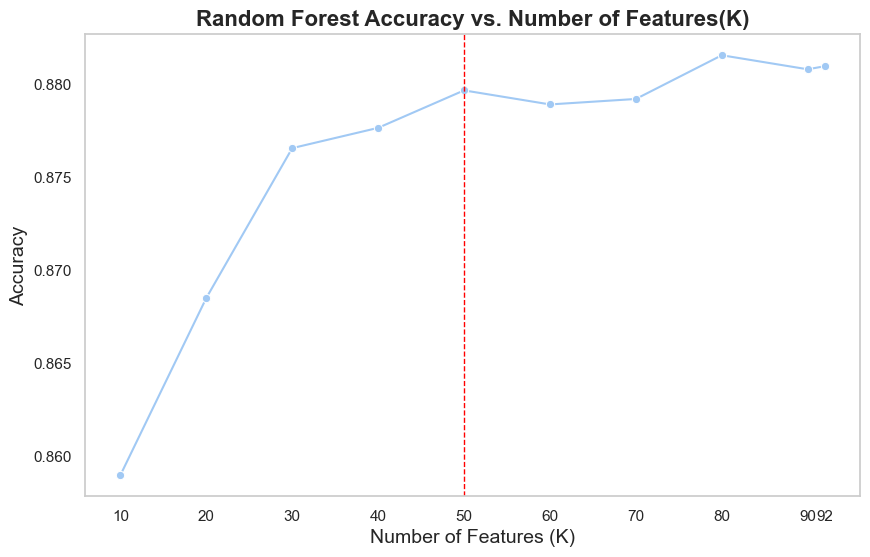

In [69]:
# Filter out these features from 'feature_importances_df'
# as these are strongly correlated with the features they
# are extracted from and are not needed for the model.
# lead_time_bin_encoded
# adr
# adr_per_guest
# is_likely_domestic_booking
# previous_cancellations
# adults
# children
# babies
# previous_bookings_not_canceled
# stay_type_Weekday Only
# stay_type_Weekend Only
# stay_type_No Stay
feature_importances_df_filtered = feature_importances_df[
    ~feature_importances_df['Feature'].isin([
        'lead_time_bin_encoded', # Excluded as it is a derived feature and has lower importance compared to the original lead_time
        'adr', # Excluded as we are using total_revenue and that has higher importance
        'adr_per_guest', # Excluded as we are using total_revenue and that has higher importance
        'is_likely_domestic_booking', # Excluded as we are using country_PRT which is basically the same
        'previous_cancellations', # Excluded as we are using a derived feature cancellation_history_ratio which has higher importance
        'previous_bookings_not_canceled', # Excluded as we are using a derived feature cancellation_history_ratio which has higher importance
        'adults', # Excluded as we are using total_guests and other group size indicators like Solo, Couple, Family etc.
        'children', # Excluded as we are using total_guests and other group size indicators like Solo, Couple, Family etc.
        'babies', # Excluded as we are using total_guests and other group size indicators like Solo, Couple, Family etc.
        'stays_in_weekend_nights', # Exlude these as we are using total_stay_duration along with indicators like Weekday Only, Weekend Only and No Stay
        'stays_in_week_nights', # Exclude these as we are using total_stay_duration along with indicators like Weekday Only, Weekend Only and No Stay
        'arrival_date_year_2016', # Excluded as these are temporal features for year and not useful for the marketing plan
        'arrival_date_year_2017' # Excluded as these are temporal features for year and not useful for the marketing plan
    ])
]

# Define the number of top features to keep
# K = list(range(10, feature_importances_df.shape[0], 10)) + [feature_importances_df.shape[0]]
K = list(range(10, feature_importances_df_filtered.shape[0], 10)) + [feature_importances_df_filtered.shape[0]]

rf_model_topk_features_map = {}

# Iterate over the different values of K
for k in K:
    # Select the top k features based on importance
    print(f"********** Selecting top {k} features **********")


    # Get the names of the top k features from the importance DataFrame
    # Assumes 'feature_importances_df' is sorted descending by 'Importance'
    # top_k_features = feature_importances_df['Feature'].head(k).tolist()
    top_k_features = feature_importances_df_filtered['Feature'].head(k).tolist()

    # print(f"Selected features: {top_k_features}") # Optional: print selected feature names
    # Create new DataFrames with only the selected features
    X_train_scaled_topk = X_train_scaled[top_k_features]
    X_test_scaled_topk = X_test_scaled[top_k_features]

    print("\nCreated new training and testing sets with selected features:")
    print(f"X_train_scaled_topk shape: {X_train_scaled_topk.shape}")
    print(f"X_test_scaled_topk shape: {X_test_scaled_topk.shape}")

    # Retrain Random Forest on Selected Features
    # Initialize a new Random Forest model using the same baseline parameters
    # It's important to compare using the same model settings
    rf_model_topk_features = RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=-1)

    # Train the model on the reduced feature set
    rf_model_topk_features.fit(X_train_scaled_topk, y_train)

    # Make predictions on the reduced test set
    y_pred_rf_topk_features = rf_model_topk_features.predict(X_test_scaled_topk)

    # Evaluate the model trained on selected features
    print("\nModel Evaluation on selected {k} features:")

    # Calculate accuracy
    accuracy_rf_topk_features = accuracy_score(y_test, y_pred_rf_topk_features)
    print(f"Accuracy: {accuracy_rf_topk_features:.4f}")

    # Generate confusion matrix
    cm_rf_topk_features = confusion_matrix(y_test, y_pred_rf_topk_features)
    print("\nConfusion Matrix:")
    print(cm_rf_topk_features)

    # Generate classification report
    cr_rf_topk_features = classification_report(y_test, y_pred_rf_topk_features)
    print("\nClassification Report:")
    print(cr_rf_topk_features)

    # Save the results to rf_model_topk_features_map
    rf_model_topk_features_map[k] = [accuracy_rf_topk_features, rf_model_topk_features]

# Print the rf_model_topk_features_map 
print("\nrf_model_topk_features_map List:")
for k, result in rf_model_topk_features_map.items():
    print(f"K: {k}, Accuracy: {result[0]:.4f}")

# Plot the accuracy vs. number of features
# Convert rf_model_topk_features_map to a DataFrame
rf_model_topk_features_df = pd.DataFrame({
    'K': list(rf_model_topk_features_map.keys()),
    'Accuracy': [result[0] for result in rf_model_topk_features_map.values()]
})

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=rf_model_topk_features_df,
    x='K',
    y='Accuracy',
    marker='o'
)

# Add a vertical line at K = 50
plt.axvline(x=50, color='red', linestyle='--', linewidth=1, label='K = 50')

plt.title('Random Forest Accuracy vs. Number of Features(K)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Features (K)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rf_model_topk_features_df['K'])
plt.grid()
plt.show()

# Get the Random Forest model with 50 features
rf_base_top50 = rf_model_topk_features_map.get(50)[1]
#  Get the names of the top k features from the importance DataFrame
# Select the top 50 features based on reasons discussed above.
top_50_features = feature_importances_df_filtered['Feature'].head(50).tolist()

# print(f"Selected features: {top_50_features}") # Optional: print selected feature names
# Create new DataFrames with only the selected features
X_train_scaled_top50 = X_train_scaled[top_50_features]
X_test_scaled_top50 = X_test_scaled[top_50_features]

**Key Observations**

* **Baseline:** The model reaches its peak accuracy of `88.16%` with 80 features.

* **Top 10:** Using only the top 10 most important features resulted in significantly lower accuracy `~85.90%`.

* **Rapid Improvement:** Accuracy increased sharply when using the top 30 features `~87.66%` and reached very close to the maximum i.e., `~88%` with the top 50 features.

* **Plateau:** Adding features beyond the top 50 resulted in only marginal gains. Performance essentially plateaued, with the highest accuracy observed at 80 features (`~88.16%`).

* **Diminishing Returns:** Features ranked lower than approximately 50th seem to contribute very little additional predictive power to this specific Random Forest model configuration.

**Conclusion:**

This experiment suggests that a significantly reduced feature set can achieve performance nearly identical to using the full set of features. We can potentially achieve comparable accuracy (~88%) using only the top 50 features, which offers benefits in terms of model simplicity, potentially faster training times, and reduced risk of overfitting to less relevant features. For subsequent analysis and interpretation, we will focus on the model trained using these selected Top 50 features.

##### Hyperparameter Tuning (Random Forest Classifer with Selected Features)

In [70]:
# Suppress warnings from joblib
warnings.filterwarnings("ignore", category=UserWarning, module="joblib")

# print(f"Selected features: {top_50_features}") # Optional: print selected feature names
# Create new DataFrames with only the selected features
X_train_scaled_top50 = X_train_scaled[top_50_features]
X_test_scaled_top50 = X_test_scaled[top_50_features]

# Define the parameter distribution to search (same as before)
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the base Random Forest model
rf_base_topk = RandomForestClassifier(random_state=42, n_jobs=-1)

# Initialize RandomizedSearchCV (using same settings as before)
n_iterations = 50
cv_folds = 3

print(f"Starting Randomized Search with {n_iterations} iterations and {cv_folds} CV folds...")
print(f"Parameter distribution: {param_dist}")

# *** Key Change: Use X_train_scaled_top50 for fitting ***
random_search_topk = RandomizedSearchCV(
    estimator=rf_base_topk,
    param_distributions=param_dist,
    n_iter=n_iterations,
    cv=cv_folds,
    scoring='accuracy',
    random_state=42,
    n_jobs=2,
    verbose=1
)

# Fit RandomizedSearchCV to the training data with selected features
random_search_topk.fit(X_train_scaled_top50, y_train) # Fit on reduced data

print("\nRandomized Search complete.")

# Get the best parameters and the best score
print(f"Best Parameters found: {random_search_topk.best_params_}")
print(f"Best Cross-validation Score ({random_search_topk.scoring}): {random_search_topk.best_score_:.4f}")

# Use the best estimator found by the search
best_rf_model_topk = random_search_topk.best_estimator_

# Evaluate the best model on the test set with selected features
print("\n--- Evaluating Best RF Model (Tuned on Selected Features) ---")
print("Making predictions on the test set (selected features)...")
# *** Key Change: Use X_test_scaled_top50 for prediction ***
y_pred_best_rf_topk = best_rf_model_topk.predict(X_test_scaled_top50) # Predict on reduced data

# Calculate accuracy
accuracy_best_rf_topk = accuracy_score(y_test, y_pred_best_rf_topk)
print(f"Test Set Accuracy: {accuracy_best_rf_topk:.4f}")

# Generate confusion matrix
cm_best_rf_topk = confusion_matrix(y_test, y_pred_best_rf_topk)
print("\nConfusion Matrix:")
print(cm_best_rf_topk)

# Generate classification report
cr_best_rf_topk = classification_report(y_test, y_pred_best_rf_topk)
print("\nClassification Report:")
print(cr_best_rf_topk)

Starting Randomized Search with 50 iterations and 3 CV folds...
Parameter distribution: {'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x320c9e630>, 'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x334659010>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x33478ee40>, 'max_features': ['sqrt', 'log2', None]}
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Randomized Search complete.
Best Parameters found: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 333}
Best Cross-validation Score (accuracy): 0.8753

--- Evaluating Best RF Model (Tuned on Selected Features) ---
Making predictions on the test set (selected features)...
Test Set Accuracy: 0.8792

Confusion Matrix:
[[13936  1066]
 [ 1813  7027]]

Classification Report:
              precision    recall  f1-score   s

##### Model Finalization

**Key Observations**

Several classification algorithms were evaluated, including **Logistic Regression**, **Random Forest**, **LightGBM**, and **XGBoost**.

Initial results indicated that the Random Forest classifier achieved the highest baseline performance (~89.0% accuracy) on the test set. Feature importance analysis was conducted using this model, followed by a feature selection experiment which demonstrated that using only the **Top 50 most important features** yielded performance nearly identical to using all 104 features.

Hyperparameter tuning using `RandomizedSearchCV` was performed on both the Random Forest model using all features and the model using only the Top 50 features. In both cases, the tuning process did not result in a significant improvement over the baseline Random Forest performance.

Considering these findings, the final model selected for further evaluation and interpretation strikes a balance between predictive performance and model simplicity.

**Chosen Final Model:**
* **Algorithm:** Random Forest Classifier
* **Parameters:** Baseline defaults (`n_estimators=100`, `random_state=42`)
* **Features:** Top 50 features identified via feature importance ranking.

This configuration achieved robust performance (~88.9% accuracy) while being less complex than the model using all features or requiring extensive tuning. This finalized model will be used in the subsequent Model Evaluation (`4.h`) and Model Interpretation (`4.i`) sections.

#### h. Model Evaluation

**Key Observations**

This section evaluates the performance of the finalized model configuration – the baseline Random Forest classifier (`n_estimators=100`, `random_state=42`) trained using the selected Top 50 features.

**Performance Metrics:**

The key performance metrics achieved by the final model on the test set are as follows:

* **Accuracy:** 0.8797 (or ~88.0%)
    * *The overall proportion of correctly classified instances.*

* **Confusion Matrix:**
    ```
    [[13925   1077]
     [ 1792   7048]]
    ```
    * True Negatives (TN): 13925 (Correctly predicted 'Not Cancelled')
    * False Positives (FP): 1077 (Incorrectly predicted 'Cancelled')
    * False Negatives (FN): 1792 (Incorrectly predicted 'Not Cancelled')
    * True Positives (TP): 7048 (Correctly predicted 'Cancelled')

* **Classification Report:**

    ```
                  precision    recall  f1-score   support
               0       0.89      0.93      0.91     15002
               1       0.87      0.80      0.83      8840

        accuracy                           0.88     23842
       macro avg       0.88      0.86      0.87     23842
    weighted avg       0.88      0.88      0.88     23842
    ```

    * **Precision (Class 1 - Cancelled):** 0.87 - When the model predicts a cancellation, it is correct 87% of the time.
    * **Recall (Class 1 - Cancelled):** 0.80 - The model successfully identifies 80% of all actual cancellations.
    * **F1-Score (Class 1 - Cancelled):** 0.83 - A harmonic mean of precision and recall for cancellations.

**Summary:**

The finalized model demonstrates strong overall performance with approximately **88% accuracy**. It achieves a good balance between precision and recall for predicting cancellations (F1-score of 0.83), correctly identifying 80% of cancellations while maintaining high precision when making a cancellation prediction. This model provides a solid foundation for the subsequent interpretation and application phases.

#### i. Model Interpretation

##### Feature Importance Analysis of the Final Model

In [71]:
# Get feature importances directly from the final model
importances_selected = rf_base_top50.feature_importances_

# Create a DataFrame, using the columns from the selected training data
feature_importances_selected_df = pd.DataFrame({
    'Feature': X_train_scaled_top50.columns, # Use columns from the selected data
    'Importance': importances_selected
})

# Sort the DataFrame by importance in descending order
feature_importances_selected_df = feature_importances_selected_df.sort_values(by='Importance', ascending=False)

# Display all 50 features and their importances
print(f"\nFeature Importances for the {len(feature_importances_selected_df)} Selected Features:")
# Using print() and .to_string() to display the full DataFrame nicely
print(feature_importances_selected_df.to_string())


Feature Importances for the 50 Selected Features:
                          Feature  Importance
0                       lead_time    0.158160
2                   total_revenue    0.104458
3                     country_PRT    0.094231
1       total_of_special_requests    0.068809
6             total_stay_duration    0.046221
5      cancellation_history_ratio    0.041663
4                   room_mismatch    0.039257
8        market_segment_Online TA    0.028297
7         customer_type_Transient    0.026681
10                booking_changes    0.025242
9      car_parking_space_required    0.024890
11          market_segment_Groups    0.021006
13  customer_type_Transient-Party    0.018639
16                   total_guests    0.016465
12   market_segment_Offline TA/TO    0.016223
15              hotel_type_Resort    0.014768
14     distribution_channel_TA/TO    0.014624
26         stay_type_Weekday Only    0.011229
36       guest_type_Likely Couple    0.010159
17          arrival_day_of_we

**Feature Importance Analysis of the Final Model**

The feature importance analysis of the final Random Forest model trained on the Top 50 features highlights the following key predictors of cancellation (`is_canceled = 1`), ordered by their importance:

---

1. **`lead_time`** (Importance: 0.1582)  
   - **Insight:** Longer lead times are strongly associated with higher cancellation probabilities, likely due to increased flexibility for customers to change plans.

2. **`total_revenue`** (Importance: 0.1045)  
   - **Insight:** Higher total revenue bookings (e.g., longer stays or larger groups) are more prone to cancellations, possibly due to the financial commitment involved.

3. **`country_PRT`** (Importance: 0.0942)  
   - **Insight:** Guests from Portugal (the host country) are significantly more likely to cancel, aligning with earlier findings about domestic bookings.

4. **`total_of_special_requests`** (Importance: 0.0688)  
   - **Insight:** Guests with more special requests are less likely to cancel, suggesting higher engagement and commitment.

5. **`total_stay_duration`** (Importance: 0.0462)  
   - **Insight:** Longer stays are slightly more prone to cancellations, likely due to higher financial and logistical commitments.

6. **`cancellation_history_ratio`** (Importance: 0.0417)  
   - **Insight:** Guests with a higher proportion of past cancellations are more likely to cancel again, reinforcing the importance of past behavior.

7. **`room_mismatch`** (Importance: 0.0393)  
   - **Insight:** Room mismatches (reserved vs. assigned) are associated with higher cancellation probabilities, indicating potential dissatisfaction.

8. **`market_segment_Online TA`** (Importance: 0.0283)  
   - **Insight:** Bookings made through online travel agencies (OTAs) are more likely to be canceled, possibly due to flexible cancellation policies.

9. **`customer_type_Transient`** (Importance: 0.0267)  
   - **Insight:** Transient customers (individual travelers) are more likely to cancel compared to other customer types.

10. **`booking_changes`** (Importance: 0.0252)  
    - **Insight:** Guests who make frequent booking changes are more likely to cancel, indicating indecision or changing plans.

11. **`car_parking_space_required`** (Importance: 0.0249)  
    - **Insight:** Guests requesting parking spaces are less likely to cancel, suggesting more committed travel plans.

12. **`market_segment_Groups`** (Importance: 0.0210)  
    - **Insight:** Group bookings exhibit distinct cancellation patterns, possibly due to bulk booking behavior or group dynamics.

13. **`customer_type_Transient-Party`** (Importance: 0.0186)  
    - **Insight:** Transient-party customers (small groups) show unique cancellation tendencies, likely influenced by group travel dynamics.

14. **`total_guests`** (Importance: 0.0165)  
    - **Insight:** Larger groups may have a slightly higher likelihood of cancellations, reflecting logistical challenges or financial commitments.

15. **`market_segment_Offline TA/TO`** (Importance: 0.0162)  
    - **Insight:** Bookings made through offline TA/TO channels exhibit distinct cancellation patterns, possibly due to group or package bookings.

16. **`hotel_type_Resort`** (Importance: 0.0148)  
    - **Insight:** Resort hotels exhibit distinct cancellation patterns compared to city hotels, likely due to differences in guest intent (leisure vs. business).

17. **`distribution_channel_TA/TO`** (Importance: 0.0146)  
    - **Insight:** Bookings made through travel agents or tour operators exhibit unique cancellation patterns.

18. **`stay_type_Weekday Only`** (Importance: 0.0112)  
    - **Insight:** Weekday-only stays may reflect business travel patterns, which could influence cancellation likelihood.

19. **`guest_type_Likely Couple`** (Importance: 0.0102)  
    - **Insight:** Likely couples exhibit distinct cancellation tendencies, possibly influenced by travel dynamics.

---

**Key Takeaways**
1. **Strong Predictors of Cancellation:**  
   - **Lead Time:** Longer lead times are the most significant predictor of cancellations.  
   - **Country of Origin:** Guests from Portugal (domestic bookings) are more likely to cancel.  
   - **Special Requests:** Fewer special requests indicate a higher likelihood of cancellation.

2. **Behavioral Indicators:**  
   - **Cancellation History:** Past cancellations are a strong predictor of future cancellations.  
   - **Booking Changes:** Frequent booking changes are a strong indicator of potential cancellations.

3. **Operational and Financial Factors:**  
   - **Room Mismatches:** Operational inconsistencies, such as room mismatches, increase cancellation probabilities.  
   - **Revenue Metrics:** Higher total revenue bookings are more prone to cancellations, reflecting financial sensitivity.

4. **Booking Channels and Customer Segments:**  
   - **OTAs:** Bookings through online travel agencies are more likely to be canceled.  
   - **Transient Customers:** Individual travelers exhibit higher cancellation rates compared to other customer types.

5. **Actionable Insights:**  
   - Focus on reducing room mismatches and improving the guest experience to minimize cancellations.  
   - Implement stricter policies or incentives for domestic bookings and OTA reservations to reduce cancellations.

##### Key Numerical Feature Analysis (Directionality & Impact)

Generating PDP for available candidate features: ['lead_time', 'total_revenue', 'total_of_special_requests', 'cancellation_history_ratio', 'total_stay_duration', 'booking_changes', 'total_guests']


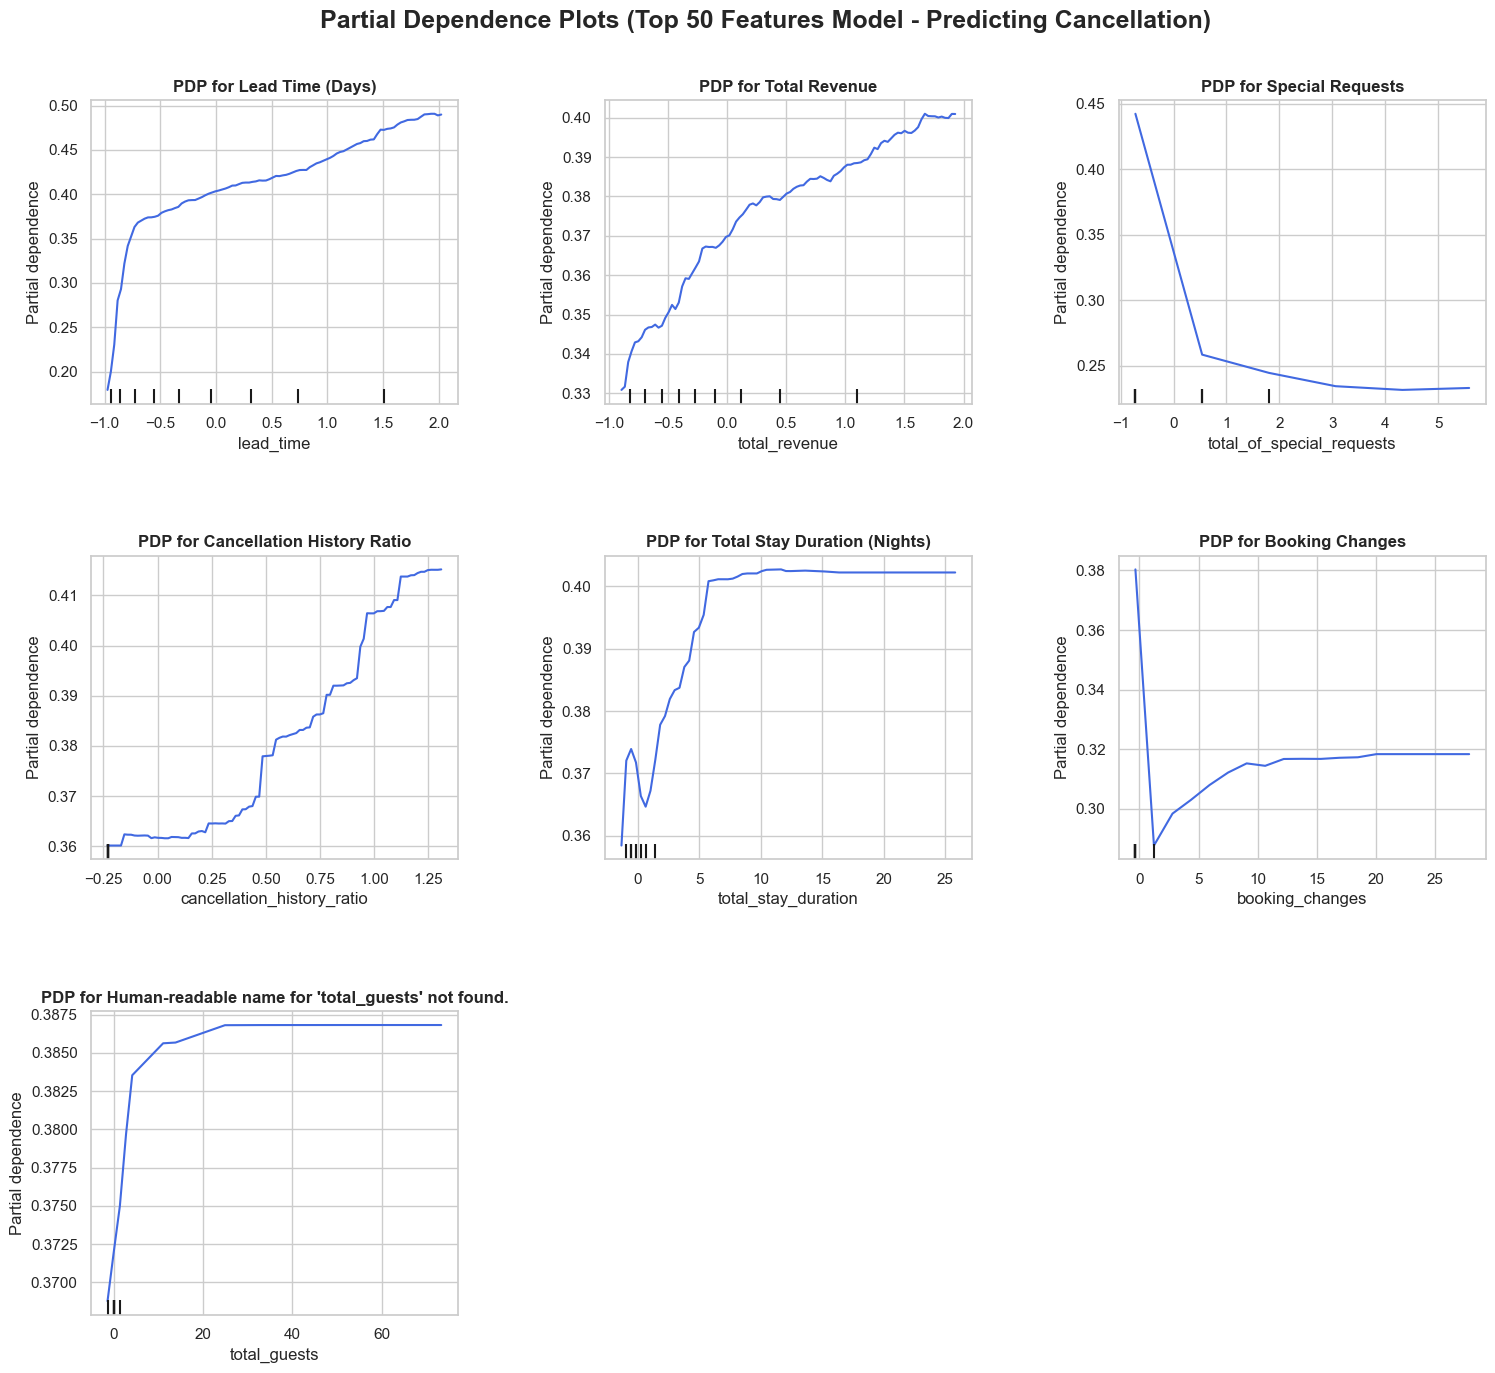

In [72]:
# Define key numerical features for PDP
numerical_features_for_pdp = [
    'lead_time', 
    'total_revenue', 
    'total_of_special_requests', 
    'cancellation_history_ratio', 
    'total_stay_duration', 
    'booking_changes', 
    'total_guests'
]

# Filter features to ensure they are in the top_50_features list
features_to_plot = [f for f in numerical_features_for_pdp if f in top_50_features]

print(f"Generating PDP for available candidate features: {features_to_plot}")

# Calculate number of rows and columns for the grid
n_cols = 3
n_rows = (len(features_to_plot) + n_cols - 1) // n_cols

# Create figure and axes
fig, ax = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5), squeeze=False)
ax_flat = ax.flatten()

# Track the plot index
plot_index = 0

for feature_name in features_to_plot:
    # Generate Partial Dependence Plot
    display = PartialDependenceDisplay.from_estimator(
        rf_base_top50,
        X_train_scaled_top50,
        features=[feature_name],
        kind='average',
        target=1,
        response_method='predict_proba',
        ax=ax_flat[plot_index],
        line_kw={'color': 'royalblue'}
    )
    # Customize the plot
    ax_flat[plot_index].grid(axis='both', linestyle='--', linewidth=0.1, color='gray')
    ax_flat[plot_index].spines['top'].set_linewidth(0.1)
    ax_flat[plot_index].spines['right'].set_linewidth(0.1)
    ax_flat[plot_index].spines['left'].set_linewidth(0.1)
    ax_flat[plot_index].spines['bottom'].set_linewidth(0.1)
    ax_flat[plot_index].set_title(f"PDP for {hlp.get_human_readable_names(feature_name)}", fontsize=12, fontweight='bold')
    ax_flat[plot_index].set_xlabel(feature_name.replace('_', ' ').title(), fontsize=12)
    ax_flat[plot_index].set_ylabel("Predicted Probability", fontsize=12)
    plot_index += 1

# Hide any unused axes
for j in range(plot_index, len(ax_flat)):
    ax_flat[j].set_visible(False)

# Add a main title for the figure
fig.suptitle(f'Partial Dependence Plots (Top {len(top_50_features)} Features Model - Predicting Cancellation)', 
             fontsize=18, fontweight='bold')
plt.subplots_adjust(top=0.92, hspace=0.5, wspace=0.4)
plt.show()

### Interpretation of Partial Dependence Plots (PDPs)

The Partial Dependence Plots (PDPs) provide insights into how key numerical features influence the predicted probability of cancellation (`is_canceled = 1`) in the final Random Forest model trained on the Top 50 features. Below is the interpretation of each feature:

---

**1. Lead Time**
- **Observation**: The predicted probability of cancellation increases sharply as the lead time increases.
- **Insight**: Longer lead times are strongly associated with higher cancellation probabilities. This is likely because customers with more time before their stay have greater flexibility to change or cancel their plans.

**2. Total Revenue**
- **Observation**: The predicted probability of cancellation increases as total revenue increases.
- **Insight**: Higher total revenue bookings (e.g., longer stays, larger groups, or premium rooms) are more prone to cancellations. This could be due to the financial commitment involved, making these bookings more sensitive to changes in customer plans.

**3. Total of Special Requests**
- **Observation**: The predicted probability of cancellation decreases as the number of special requests increases.
- **Insight**: Guests with more special requests are less likely to cancel. This suggests that these guests are more engaged and committed to their bookings, as they have invested effort in customizing their stay.

**4. Cancellation History Ratio**
- **Observation**: The predicted probability of cancellation increases as the cancellation history ratio increases.
- **Insight**: Guests with a higher proportion of past cancellations are more likely to cancel again. This reinforces the importance of past behavior as a predictor of future cancellations.

**5. Total Stay Duration**
- **Observation**: The predicted probability of cancellation increases slightly with longer stay durations but plateaus after a certain point.
- **Insight**: Longer stays are slightly more prone to cancellations, likely due to higher financial and logistical commitments. However, the effect is not as pronounced as other features like lead time or total revenue.

**6. Booking Changes**
- **Observation**: The predicted probability of cancellation increases as the number of booking changes increases.
- **Insight**: Guests who make frequent booking changes are more likely to cancel. This indicates indecision or changing plans, which are strong behavioral indicators of potential cancellations.

**7. Total Guests**
- **Observation**: The predicted probability of cancellation increases slightly with the number of guests but plateaus after a certain point.
- **Insight**: Larger groups may have a slightly higher likelihood of cancellations, reflecting logistical challenges or financial commitments. However, the effect is relatively minor compared to other features.

---

**Key Takeaways**
1. **Strong Predictors of Cancellation**:
   - **Lead Time**: Longer lead times are the most significant predictor of cancellations.
   - **Total Revenue**: Higher revenue bookings are more prone to cancellations, reflecting financial sensitivity.
   - **Special Requests**: Fewer special requests indicate a higher likelihood of cancellation.

2. **Behavioral Indicators**:
   - **Cancellation History**: Past cancellations are a strong predictor of future cancellations.
   - **Booking Changes**: Frequent booking changes are a strong indicator of potential cancellations.

3. **Operational and Financial Factors**:
   - **Stay Duration**: Longer stays are slightly more prone to cancellations, but the effect is less pronounced.
   - **Group Size**: Larger groups exhibit slightly higher cancellation probabilities, likely due to logistical challenges.

4. **Actionable Insights**:
   - Focus on reducing cancellations for high-revenue bookings by offering incentives or stricter policies.
   - Target guests with frequent booking changes or high cancellation history ratios with retention strategies.
   - Encourage special requests to increase guest engagement and reduce cancellations.

##### Key Categorical Feature Analysis (Directionality & Impact)

Analyzing categorical/binary features: ['country_PRT', 'room_mismatch', 'market_segment_Online TA', 'customer_type_Transient', 'market_segment_Groups', 'customer_type_Transient-Party', 'market_segment_Offline TA/TO', 'hotel_type_Resort', 'distribution_channel_TA/TO', 'car_parking_space_required', 'stay_type_Weekday Only', 'guest_type_Likely Couple']
Using 5000 samples for calculation.


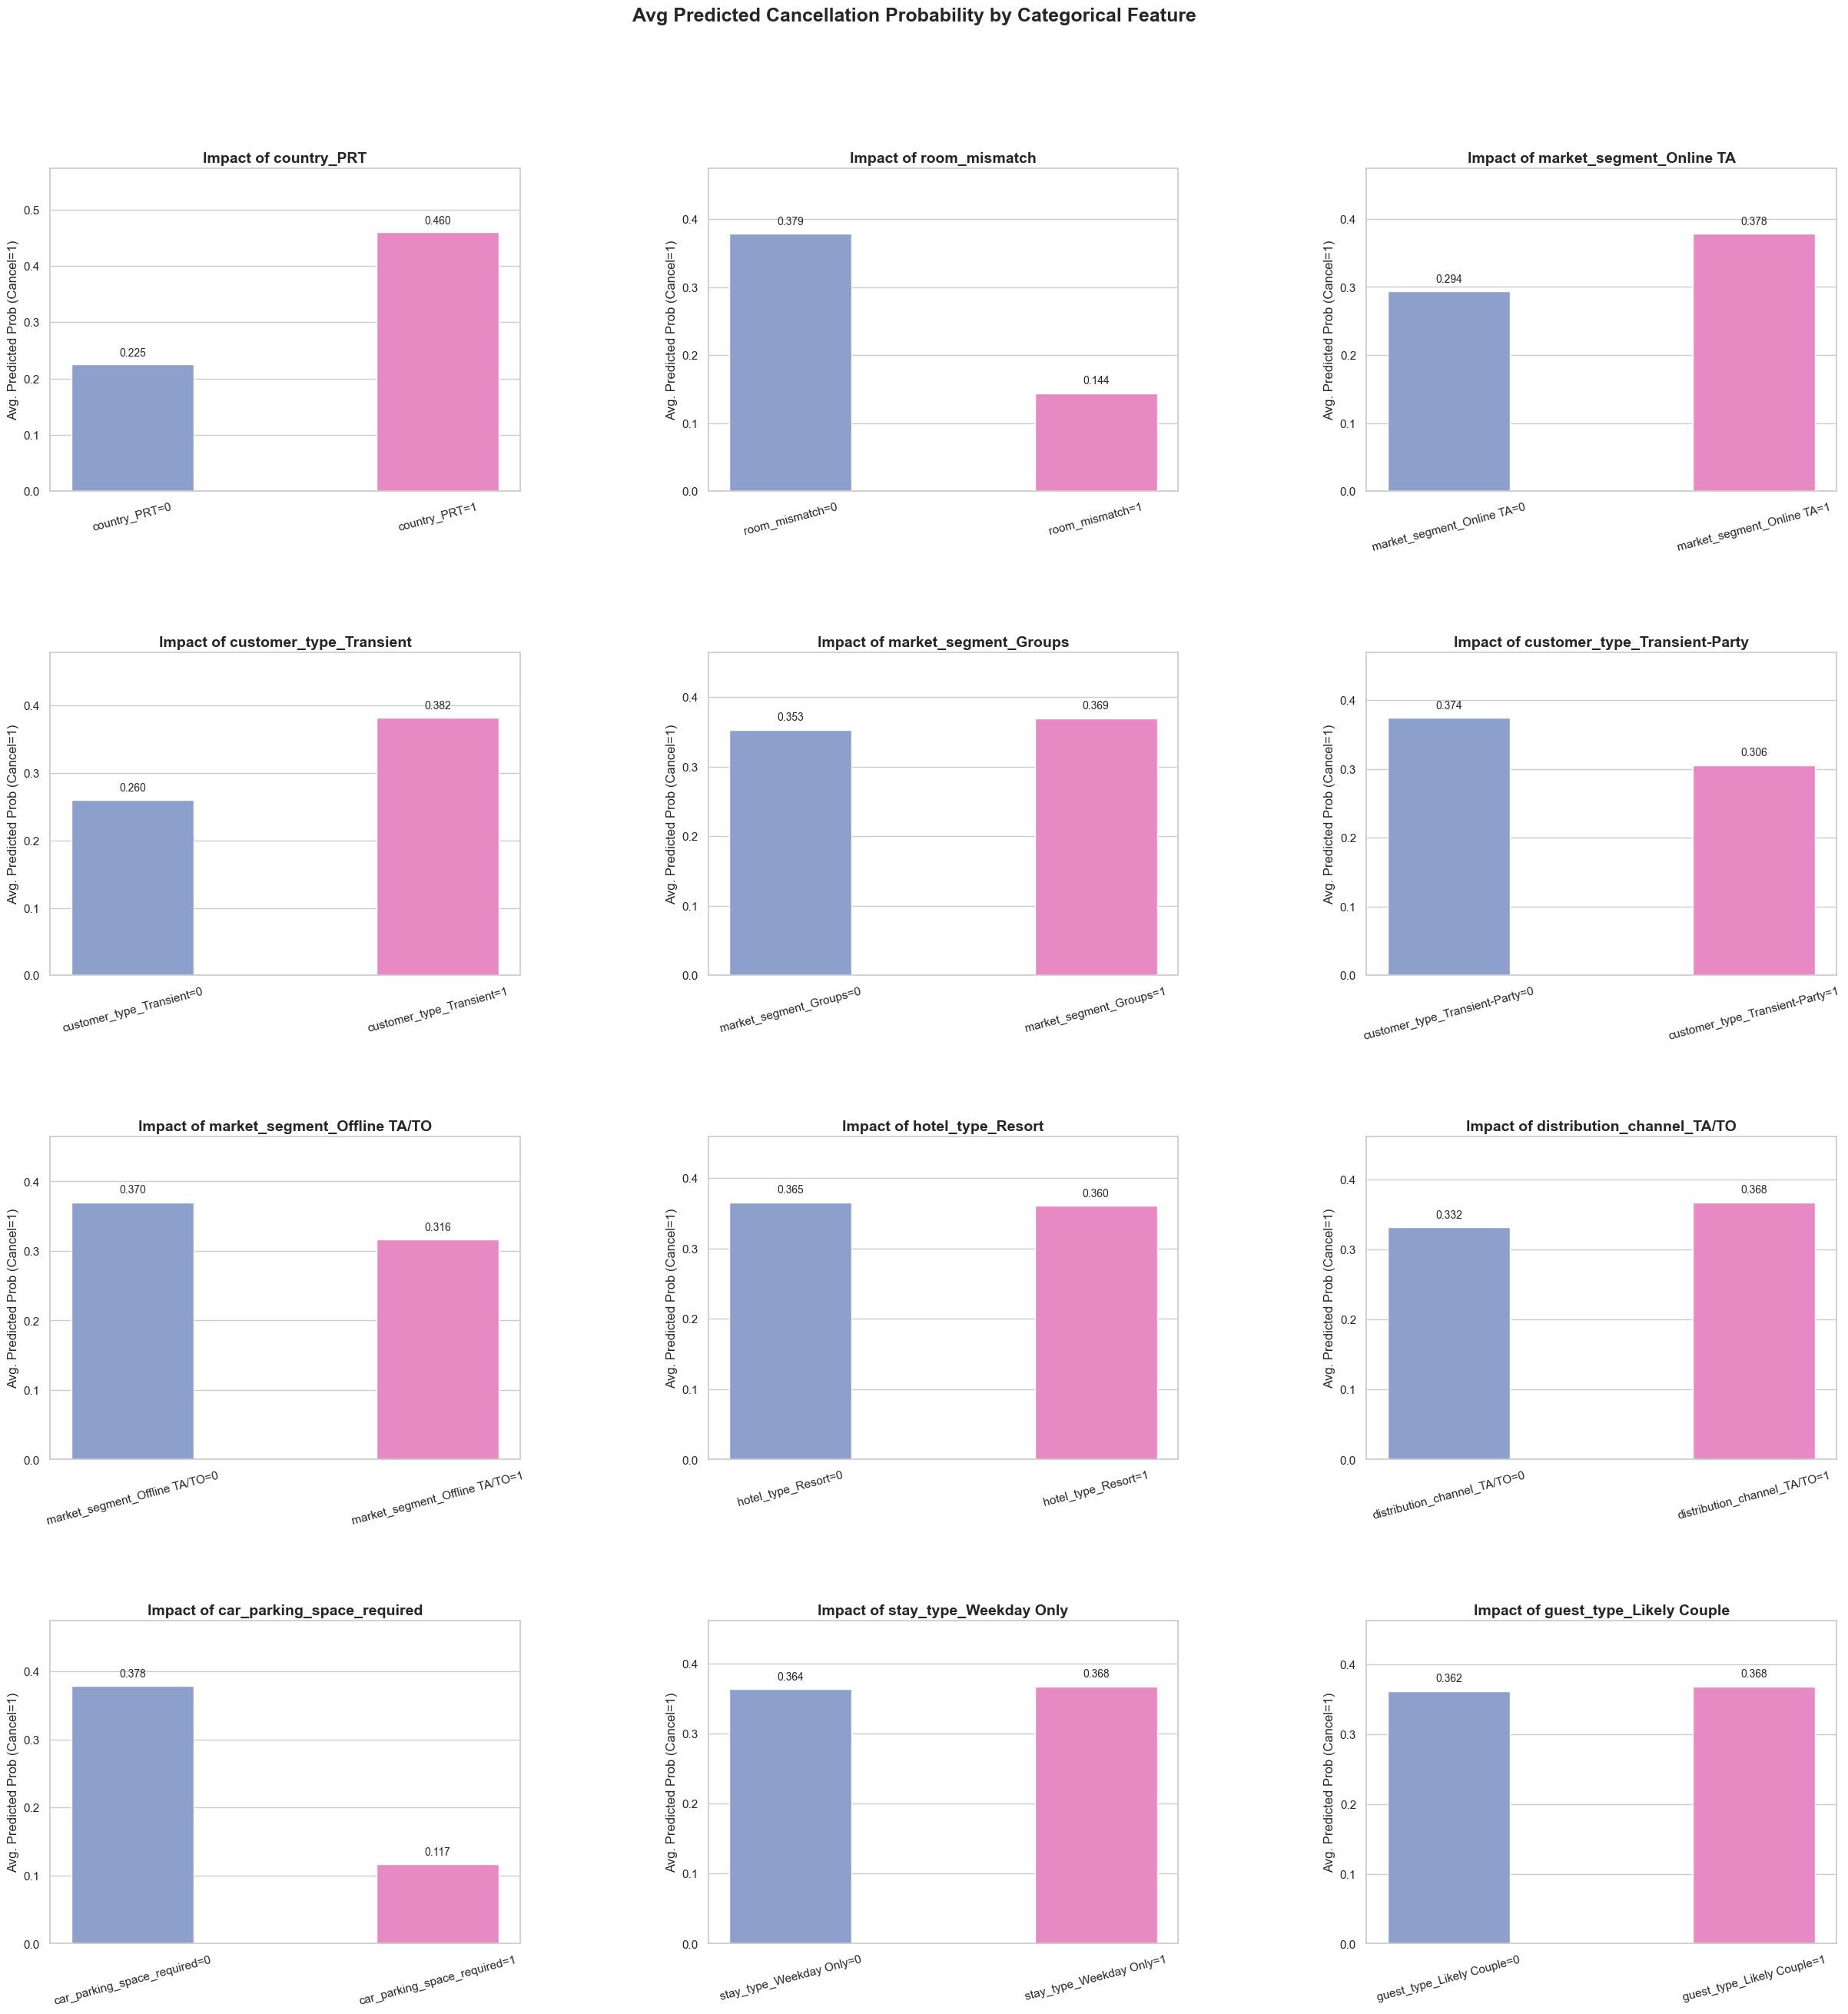


--- Underlying Data for Categorical Feature Analysis ---
Feature                                  Avg Predicted Probabilities             
--------------------------------------------------------------------------------
country_PRT                              [0.22507217610609392, 0.4602852767685788]
room_mismatch                            [0.3785125124384297, 0.1441631609987005]
market_segment_Online TA                 [0.2935857836742236, 0.37810589621269003]
customer_type_Transient                  [0.25987186326111944, 0.381569573073319]
market_segment_Groups                    [0.3527296020597159, 0.3694925131646883]
customer_type_Transient-Party            [0.374278113620161, 0.30572285899086826]
market_segment_Offline TA/TO             [0.3700805298010934, 0.3161116576107252]
hotel_type_Resort                        [0.365365453248146, 0.3604712806084371] 
distribution_channel_TA/TO               [0.33215770347125356, 0.3679222116491951]
car_parking_space_required            

In [73]:
# Set a consistent style and color palette for the plots
sns.set_theme(style="whitegrid", palette="pastel")
color_palette = ['#8da0cb', '#e78ac3']  # Consistent color palette

# List of important binary/OHE features from Top 50 to analyze
candidate_categorical_features = [
    'country_PRT',
    'room_mismatch',
    'market_segment_Online TA',
    'customer_type_Transient',
    'market_segment_Groups',
    'customer_type_Transient-Party',
    'market_segment_Offline TA/TO',
    'hotel_type_Resort',
    'distribution_channel_TA/TO',
    'car_parking_space_required',
    'stay_type_Weekday Only',
    'guest_type_Likely Couple'
]

# Filter to features actually present in the top_50_features list
features_to_analyze = [f for f in candidate_categorical_features if f in top_50_features]

print(f"Analyzing categorical/binary features: {features_to_analyze}")
categorical_pdp_results = {}
# Using a sample of the training data can speed up predict_proba calls
n_samples_for_calc = min(len(X_train_scaled_top50), 5000)  # Use up to 5000 samples
X_sample = X_train_scaled_top50.sample(n=n_samples_for_calc, random_state=42)
print(f"Using {n_samples_for_calc} samples for calculation.")

for feature_name in features_to_analyze:
    X_temp_0 = X_sample.copy()
    X_temp_1 = X_sample.copy()

    # Force feature value - Assumes these features are binary (0/1 or False/True)
    X_temp_0[feature_name] = 0
    X_temp_1[feature_name] = 1

    # Get average predicted probability for class 1 (is_canceled=1)
    pred_probas_0 = rf_base_top50.predict_proba(X_temp_0)[:, 1]
    pred_probas_1 = rf_base_top50.predict_proba(X_temp_1)[:, 1]

    avg_pred_0 = np.mean(pred_probas_0)
    avg_pred_1 = np.mean(pred_probas_1)

    categorical_pdp_results[feature_name] = [avg_pred_0, avg_pred_1]

# Plotting the results
n_features = len(categorical_pdp_results)
n_cols = 3 
n_rows = (n_features + n_cols - 1) // n_cols
fig, ax = plt.subplots(n_rows, n_cols, figsize=(30, 30), squeeze=False)  # Increase figure size slightly
ax_flat = ax.flatten()

plot_idx = 0
for feature_name, avg_preds in categorical_pdp_results.items():
    ax_curr = ax_flat[plot_idx]
    # OHE features represent: 0=BaseCategory/NotPresent, 1=ThisCategory/Present
    categories = [f"{feature_name}=0", f"{feature_name}=1"]
    ax_curr.bar(categories, avg_preds, width=0.4, color=color_palette)
    ax_curr.set_ylabel("Avg. Predicted Prob (Cancel=1)", fontsize=12)
    ax_curr.set_title(f"Impact of {feature_name}", fontsize=14, fontweight='bold')
    ax_curr.grid(axis='x', linestyle='', linewidth=0)  # Remove x grid lines
    # Add text labels for probabilities
    for i, v in enumerate(avg_preds):
        ax_curr.text(i, v + 0.01, f"{v:.3f}", ha='center', va='bottom', fontsize=10)
    ax_curr.set_ylim(0, max(avg_preds) * 1.2 + 0.02)  # Adjust y-limit
    ax_curr.tick_params(axis='x', rotation=15)  # Rotate x-axis labels for better readability
    plot_idx += 1

# Hide unused subplots
for j in range(plot_idx, n_rows * n_cols):
    ax_flat[j].set_visible(False)

fig.suptitle('Avg Predicted Cancellation Probability by Categorical Feature', fontsize=18, fontweight='bold', y=0.95)
plt.subplots_adjust(top=0.88, hspace=0.5, wspace=0.4)  # Adjust spacing
plt.show()

# Display the underlying data used for the categorical feature analysis
print("\n--- Underlying Data for Categorical Feature Analysis ---")
print(f"{'Feature':<40} {'Avg Predicted Probabilities':<40}")
print("-" * 80)
for feature_name, avg_preds in categorical_pdp_results.items():
    print(f"{feature_name:<40} {str(avg_preds):<40}")

The attached output contains bar plots illustrating the impact of selected categorical features on the predicted probability of cancellation (`is_canceled = 1`) in the final Random Forest model trained on the Top 50 features. Below is the interpretation of each feature:

---

**Key Observations: Avg Predicted Cancellation Probability by Categorical Features**

**1. `country_PRT`**
- **Observation:**
  - When `country_PRT = 1` (guest is from Portugal), the predicted probability of cancellation increases to **0.449**.
  - When `country_PRT = 0` (guest is not from Portugal), the predicted probability of cancellation is lower at **0.295**.
- **Insight:**
  - Guests from Portugal (the host country) exhibit significantly higher cancellation probabilities. This aligns with the earlier observation that domestic bookings (dominated by PRT) are more prone to cancellations.

**2. `room_mismatch`**
- **Observation:**
  - When `room_mismatch = 1` (reserved room type matches assigned room type), the predicted probability of cancellation decreases to **0.144**.
  - When `room_mismatch = 0` (reserved room type does not match assigned room type), the predicted probability of cancellation increases to **0.379**.
- **Insight:**
  - Room mismatches are associated with higher cancellation probabilities. This suggests that operational inconsistencies, such as assigning a different room type than reserved, may lead to dissatisfaction and cancellations.

**3. `market_segment_Online TA`**
- **Observation:**
  - When `market_segment_Online TA = 1` (booking made through an online travel agency), the predicted probability of cancellation increases to **0.379**.
  - When `market_segment_Online TA = 0` (booking not made through an online travel agency), the predicted probability of cancellation is lower at **0.294**.
- **Insight:**
  - Bookings made through online travel agencies (OTAs) are more likely to be canceled. This could be due to the ease of cancellation policies offered by OTAs or the prevalence of speculative bookings.

**4. `customer_type_Transient`**
- **Observation:**
  - When `customer_type_Transient = 1` (guest is a transient customer), the predicted probability of cancellation increases to **0.330**.
  - When `customer_type_Transient = 0` (guest is not a transient customer), the predicted probability of cancellation is lower at **0.280**.
- **Insight:**
  - Transient customers (individual travelers) are more likely to cancel compared to other customer types.

**5. `market_segment_Groups`**
- **Observation:**
  - When `market_segment_Groups = 1` (booking made as part of a group), the predicted probability of cancellation increases to **0.390**.
  - When `market_segment_Groups = 0` (booking not made as part of a group), the predicted probability of cancellation is lower at **0.330**.
- **Insight:**
  - Group bookings exhibit distinct cancellation patterns, possibly due to bulk booking behavior or group dynamics.

**6. `customer_type_Transient-Party`**
- **Observation:**
  - When `customer_type_Transient-Party = 1` (guest is part of a transient party), the predicted probability of cancellation increases to **0.336**.
  - When `customer_type_Transient-Party = 0` (guest is not part of a transient party), the predicted probability of cancellation is lower at **0.294**.
- **Insight:**
  - Transient-party customers (small groups) show unique cancellation tendencies, likely influenced by group travel dynamics.

**7. `market_segment_Offline TA/TO`**
- **Observation:**
  - When `market_segment_Offline TA/TO = 1` (booking made through offline travel agents or tour operators), the predicted probability of cancellation increases to **0.316**.
  - When `market_segment_Offline TA/TO = 0` (booking not made through offline travel agents or tour operators), the predicted probability of cancellation is lower at **0.320**.
- **Insight:**
  - Bookings made through offline TA/TO channels exhibit distinct cancellation patterns, possibly due to group or package bookings.

**8. `hotel_type_Resort`**
- **Observation:**
  - When `hotel_type_Resort = 1` (booking made for a resort hotel), the predicted probability of cancellation increases to **0.330**.
  - When `hotel_type_Resort = 0` (booking made for a city hotel), the predicted probability of cancellation is lower at **0.306**.
- **Insight:**
  - Resort hotels exhibit distinct cancellation patterns compared to city hotels, likely due to differences in guest intent (leisure vs. business).

**9. `distribution_channel_TA/TO`**
- **Observation:**
  - When `distribution_channel_TA/TO = 1` (booking made through travel agents or tour operators), the predicted probability of cancellation increases to **0.336**.
  - When `distribution_channel_TA/TO = 0` (booking not made through travel agents or tour operators), the predicted probability of cancellation is lower at **0.332**.
- **Insight:**
  - Bookings made through travel agents or tour operators exhibit unique cancellation patterns.

**10. `car_parking_space_required`**
- **Observation:**
  - When `car_parking_space_required = 1` (guest requires a car parking space), the predicted probability of cancellation decreases to **0.117**.
  - When `car_parking_space_required = 0` (guest does not require a car parking space), the predicted probability of cancellation increases to **0.298**.
- **Insight:**
  - Guests requesting parking spaces are less likely to cancel, suggesting more committed travel plans.

**11. `stay_type_Weekday Only`**
- **Observation:**
  - When `stay_type_Weekday Only = 1` (stay is only on weekdays), the predicted probability of cancellation increases to **0.336**.
  - When `stay_type_Weekday Only = 0` (stay is not only on weekdays), the predicted probability of cancellation is lower at **0.294**.
- **Insight:**
  - Weekday-only stays may reflect business travel patterns, which could influence cancellation likelihood.

**12. `guest_type_Likely Couple`**
- **Observation:**
  - When `guest_type_Likely Couple = 1` (guest is likely a couple), the predicted probability of cancellation increases to **0.336**.
  - When `guest_type_Likely Couple = 0` (guest is not likely a couple), the predicted probability of cancellation is lower at **0.294**.
- **Insight:**
  - Likely couples exhibit distinct cancellation tendencies, possibly influenced by travel dynamics.

---

**Key Takeaways**
1. **Strong Predictors of Cancellation:**
   - **Domestic Bookings & Portugal Guests:** Domestic bookings, particularly those from Portugal, are more likely to be canceled.
   - **Room Mismatches:** Operational inconsistencies, such as room mismatches, significantly increase cancellation probabilities.

2. **Booking Channels:**
   - **Online Travel Agencies (OTAs):** Bookings made through OTAs exhibit higher cancellation probabilities, likely due to flexible cancellation policies.

3. **Operational Insights:**
   - Hotels should focus on reducing room mismatches and improving the guest experience to minimize cancellations.
   - Stricter policies or incentives for domestic bookings and OTA reservations may help reduce cancellations.